# Executive Summary

This project takes a deep dive into data about Airbnb listings to determine critical drivers of the performance of rental properties within London. We study the prices, the occupancy rate, the characteristics of the properties, and the satisfaction of guests to derive actionable insights for real estate investors to maximize ROI.

Key Findings:

Pricing and Demand: Listings below £5,000 receive more reviews and bookings, indicating higher demand for this price bracket.

Features of Property: Number of bedrooms and bathrooms shows positive relation with price; cleanliness and communication are highly vital features concerning guest satisfaction.

Availability and Occupancy: Listings, which are more available, can be rented at low prices and are more engaging, too, which reflects year-round demand.

Room Type: Entire homes and apartments have shown higher demand and review activity than private or shared rooms.

Recommendations:

Adjust the rent price by taking into consideration the market demand, property features, and competitor analysis, with the £5,000 price range in mind.
Prioritize property features that ensure cleanliness, responsive communication, and amenities to delight your guests and attract bookings.
Ensure enough availability, especially for properties priced under £5,000, to cater for year-round demand and ensure top-of-the-class occupancy rates.
Consider offering entire homes or apartments since this can capture higher market demand and increased potential rental income.

The insights derived from the data analysis provide a basis for strategic decision-making in the London Airbnb market. By leveraging these findings, real estate investors can optimize pricing, property features, and availability to attract bookings, enhance guest satisfaction, and ultimately maximize returns on investment.

# Rationale

The most important takeaway for an investor would be the possibility of ROI maximization by leveraging data insights on Airbnb performance. We analyze key factors of pricing, occupancy rates, property features, and guest satisfaction scores to provide actionable recommendations to optimize rental income.

For real estate investors, this means:

Identifying properties with the highest earning potential based on location, amenities, and market trends.
Setting prices competitively to ensure the highest occupancy while ensuring profitability.
Improve guest satisfaction scores to command higher rates and ensure repeat bookings for better long-term returns.
By using this model, an investor can make informed decisions for minimizing risk and achieving high returns on investment compared with traditional methods of letting. This data-driven approach ensures that each dollar invested is optimized for the highest profitability.

# Who are you builiding this model for?

- New real estate investors who want to purchase property in London and list it on Airbnb.

In [121]:
!pip install scikit-learn

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

# Analyze Raw Data Without any change

- Only change price Dtype

In [123]:
airbnb_df = pd.read_csv("Listings.csv")

In [124]:
airbnb_df.shape

(96182, 75)

In [125]:
airbnb_df.head(3)

id                         listing_url     scrape_id last_scraped  \
0  13913.0  https://www.airbnb.com/rooms/13913  2.024090e+13       9/6/24   
1  15400.0  https://www.airbnb.com/rooms/15400  2.024090e+13       9/7/24   
2  17402.0  https://www.airbnb.com/rooms/17402  2.024090e+13       9/7/24   

        source                                 name  \
0  city scrape  Holiday London DB Room Let-on going   
1  city scrape  Bright Chelsea  Apartment. Chelsea!   
2  city scrape   Fab 3-Bed/2 Bath & Wifi: Trendy W1   

                                         description  \
0  My bright double bedroom with a large window h...   
1  Lots of windows and light.  St Luke's Gardens ...   
2  You'll have a great time in this beautiful, cl...   

                               neighborhood_overview  \
0  Finsbury Park is a friendly melting pot commun...   
1                                     It is Chelsea.   
2  Fitzrovia is a very desirable trendy, arty and...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/miso/Hosting-...    54730  ...   
1  https://a0.muscache.com/pictures/428392/462d26...    60302  ...   
2  https://a0.muscache.com/pictures/39d5309d-fba7...    67564  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.84                   4.72                4.72   
1                        4.84                   4.93                4.75   
2                        4.72                   4.89                4.61   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              3   
1     NaN                f                              1   
2     NaN                f                              6   

  calculated_host_listings_count_entire_homes  \
0                                           2   
1                                           1   
2                                           6   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.26  
1                                           0              0.54  
2                                           0              0.34  

[3 rows x 75 columns]

In [126]:
airbnb_df.tail(3)

id                                       listing_url  \
96179  1.238320e+18  https://www.airbnb.com/rooms/1238324698677810011   
96180  1.238330e+18  https://www.airbnb.com/rooms/1238325041613488062   
96181  1.238340e+18  https://www.airbnb.com/rooms/1238336470629154019   

          scrape_id last_scraped       source  \
96179  2.024090e+13       9/7/24  city scrape   
96180  2.024090e+13       9/6/24  city scrape   
96181  2.024090e+13       9/6/24  city scrape   

                                  name  \
96179   Livestay Comfortable 2-Bedroom   
96180  3 bed house 2 mins to the River   
96181       East London 2 bedroom flat   

                                             description  \
96179  You'll have a great time at this comfortable p...   
96180  Your family will be very close to the Town cen...   
96181  Forget your worries in this spacious and seren...   

      neighborhood_overview  \
96179                   NaN   
96180                   NaN   
96181                   NaN   

                                             picture_url    host_id  ...  \
96179  https://a0.muscache.com/pictures/miso/Hosting-...  169339652  ...   
96180  https://a0.muscache.com/pictures/miso/Hosting-...    8303756  ...   
96181  https://a0.muscache.com/pictures/miso/Hosting-...  500903590  ...   

      review_scores_communication review_scores_location review_scores_value  \
96179                         NaN                    NaN                 NaN   
96180                         NaN                    NaN                 NaN   
96181                         NaN                    NaN                 NaN   

      license instant_bookable calculated_host_listings_count  \
96179     NaN                t                              7   
96180     NaN                f                              1   
96181     NaN                t                             14   

      calculated_host_listings_count_entire_homes  \
96179                                           7   
96180                                           1   
96181                                          14   

      calculated_host_listings_count_private_rooms  \
96179                                            0   
96180                                            0   
96181                                            0   

      calculated_host_listings_count_shared_rooms reviews_per_month  
96179                                           0               NaN  
96180                                           0               NaN  
96181                                           0               NaN  

[3 rows x 75 columns]

In [127]:
airbnb_df.shape

(96182, 75)

In [128]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96182 entries, 0 to 96181
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96182 non-null  float64
 1   listing_url                                   96182 non-null  object 
 2   scrape_id                                     96182 non-null  float64
 3   last_scraped                                  96182 non-null  object 
 4   source                                        96182 non-null  object 
 5   name                                          96182 non-null  object 
 6   description                                   92763 non-null  object 
 7   neighborhood_overview                         45661 non-null  object 
 8   picture_url                                   96171 non-null  object 
 9   host_id                                       96182 non-null 

In [129]:
airbnb_df = airbnb_df.drop(columns=['neighbourhood_group_cleansed','calendar_updated', 'license'], errors='ignore')

In [130]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96182 entries, 0 to 96181
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96182 non-null  float64
 1   listing_url                                   96182 non-null  object 
 2   scrape_id                                     96182 non-null  float64
 3   last_scraped                                  96182 non-null  object 
 4   source                                        96182 non-null  object 
 5   name                                          96182 non-null  object 
 6   description                                   92763 non-null  object 
 7   neighborhood_overview                         45661 non-null  object 
 8   picture_url                                   96171 non-null  object 
 9   host_id                                       96182 non-null 

In [131]:
airbnb_df['room_type'] = airbnb_df['room_type'].astype('category')
airbnb_df['neighbourhood_cleansed'] = airbnb_df['neighbourhood_cleansed'].astype('category')
airbnb_df['property_type'] = airbnb_df['property_type'].astype('category')
airbnb_df['first_review'] = airbnb_df['first_review'].astype('category')
airbnb_df['calendar_last_scraped']= airbnb_df['calendar_last_scraped'].astype('category')
airbnb_df['has_availability'] = airbnb_df['has_availability'].astype('category')
airbnb_df['amenities'] = airbnb_df['amenities'].astype('category')
airbnb_df['bathrooms_text'] = airbnb_df['bathrooms_text'].astype('category')
airbnb_df['neighbourhood'] = airbnb_df['neighbourhood'].astype('category')
airbnb_df['host_identity_verified'] = airbnb_df['host_identity_verified'].astype('category')
airbnb_df['host_has_profile_pic'] = airbnb_df['host_has_profile_pic'].astype('category')
airbnb_df['host_verifications'] = airbnb_df['host_verifications'].astype('category')
airbnb_df['host_total_listings_count'] = airbnb_df['host_total_listings_count'].astype('category')
airbnb_df['host_listings_count'] = airbnb_df['host_listings_count'].astype('category')
airbnb_df['host_neighbourhood'] = airbnb_df['host_neighbourhood'].astype('category')
airbnb_df['host_picture_url'] = airbnb_df['host_picture_url'].astype('category')
airbnb_df['host_thumbnail_url'] = airbnb_df['host_thumbnail_url'].astype('category')
airbnb_df['host_since'] = airbnb_df['host_since'].astype('category')
airbnb_df['host_response_rate'] = airbnb_df['host_response_rate'].astype('category')
airbnb_df['host_response_time'] = airbnb_df['host_response_time'].astype('category')
airbnb_df['host_acceptance_rate'] = airbnb_df['host_acceptance_rate'].astype('category')
airbnb_df['host_url'] = airbnb_df['host_url'].astype('category')
airbnb_df['host_about'] = airbnb_df['host_about'].astype('category')
airbnb_df['host_is_superhost'] = airbnb_df['host_is_superhost'].astype('category')
airbnb_df['host_location'] = airbnb_df['host_location'].astype('category')
airbnb_df['host_name'] = airbnb_df['host_name'].astype('category')
airbnb_df['host_response_rate'] = airbnb_df['host_response_rate'].astype('category')
airbnb_df['listing_url'] = airbnb_df['listing_url'].astype('category')
airbnb_df['scrape_id'] = airbnb_df['scrape_id'].astype('category')
airbnb_df['last_scraped'] = airbnb_df['last_scraped'].astype('category')
airbnb_df['name'] = airbnb_df['name'].astype('category')
airbnb_df['source'] = airbnb_df['source'].astype('category')
airbnb_df['neighborhood_overview'] = airbnb_df['neighborhood_overview'].astype('category')
airbnb_df['description'] = airbnb_df['description'].astype('category')
airbnb_df['picture_url'] = airbnb_df['picture_url'].astype('category')
airbnb_df['instant_bookable'] = airbnb_df['instant_bookable'].astype('category')
airbnb_df['last_review'] = airbnb_df['last_review'].astype('category')


In [132]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96182 entries, 0 to 96181
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            96182 non-null  float64 
 1   listing_url                                   96182 non-null  category
 2   scrape_id                                     96182 non-null  category
 3   last_scraped                                  96182 non-null  category
 4   source                                        96182 non-null  category
 5   name                                          96182 non-null  category
 6   description                                   92763 non-null  category
 7   neighborhood_overview                         45661 non-null  category
 8   picture_url                                   96171 non-null  category
 9   host_id                                       9618

In [133]:
display(airbnb_df['price'])

0         59.0
1        120.0
2        493.0
3        190.0
4        140.0
         ...  
96177    243.0
96178    140.0
96179    103.0
96180    140.0
96181    129.0
Name: price, Length: 96182, dtype: float64

In [134]:
airbnb_df['price'].isnull().sum()

32977

- **We have to find the mean of price column and apply the mean to the NULL values**

In [135]:
airbnb_df.describe()

id       host_id      latitude     longitude  accommodates  \
count  9.618200e+04  9.618200e+04  96182.000000  96182.000000  96182.000000   
mean   5.371480e+17  1.869985e+08     51.509667     -0.126658      3.271142   
std    5.058736e+17  1.932939e+08      0.048991      0.100895      2.038371   
min    1.391300e+04  2.594000e+03     51.295937     -0.497800      1.000000   
25%    2.687465e+07  2.481902e+07     51.483451     -0.189170      2.000000   
50%    6.748945e+17  9.823806e+07     51.513759     -0.126064      2.000000   
75%    1.033250e+18  3.357794e+08     51.539403     -0.067120      4.000000   
max    1.239120e+18  6.502659e+08     51.681642      0.295731     16.000000   

          bathrooms      bedrooms          beds         price  minimum_nights  \
count  63145.000000  83530.000000  63041.000000  63205.000000    96182.000000   
mean       1.359561      1.600000      1.891309    197.150225        5.438315   
std        0.714272      1.101507      1.406843    839.625190       23.053614   
min        0.000000      0.000000      0.000000      1.000000        1.000000   
25%        1.000000      1.000000      1.000000     76.000000        1.000000   
50%        1.000000      1.000000      1.000000    130.000000        2.000000   
75%        1.500000      2.000000      2.000000    211.000000        4.000000   
max       26.000000     50.000000     50.000000  80000.000000     1125.000000   

       ...  review_scores_cleanliness  review_scores_checkin  \
count  ...               71639.000000           71599.000000   
mean   ...                   4.651557               4.792374   
std    ...                   0.501018               0.416305   
min    ...                   0.000000               0.000000   
25%    ...                   4.500000               4.750000   
50%    ...                   4.800000               4.930000   
75%    ...                   5.000000               5.000000   
max    ...                   5.000000               5.000000   

       review_scores_communication  review_scores_location  \
count                 71625.000000            71598.000000   
mean                      4.816200                4.730947   
std                       0.408739                0.393965   
min                       0.000000                0.000000   
25%                       4.800000                4.640000   
50%                       4.970000                4.840000   
75%                       5.000000                5.000000   
max                       5.000000                5.000000   

       review_scores_value  calculated_host_listings_count  \
count         71599.000000                    96182.000000   
mean              4.618815                       15.478738   
std               0.494693                       50.108297   
min               0.000000                        1.000000   
25%               4.500000                        1.000000   
50%               4.750000                        2.000000   
75%               4.950000                        7.000000   
max               5.000000                      438.000000   

       calculated_host_listings_count_entire_homes  \
count                                 96182.000000   
mean                                     13.349494   
std                                      49.274694   
min                                       0.000000   
25%                                       0.000000   
50%                                       1.000000   
75%                                       4.000000   
max                                     438.000000   

       calculated_host_listings_count_private_rooms  \
count                                  96182.000000   
mean                                       1.995904   
std                                        7.652508   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%     

In [136]:
airbnb_df.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               24533
Length: 72, dtype: int64

In [137]:
numerical_df = airbnb_df.select_dtypes(include=np.number)

In [138]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96182 entries, 0 to 96181
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96182 non-null  float64
 1   host_id                                       96182 non-null  int64  
 2   latitude                                      96182 non-null  float64
 3   longitude                                     96182 non-null  float64
 4   accommodates                                  96182 non-null  int64  
 5   bathrooms                                     63145 non-null  float64
 6   bedrooms                                      83530 non-null  float64
 7   beds                                          63041 non-null  float64
 8   price                                         63205 non-null  float64
 9   minimum_nights                                96182 non-null 

In [139]:
numerical_df = numerical_df.drop(columns=['neighbourhood_group_cleansed', 'license', 'calendar_updated'], errors='ignore')

In [140]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96182 entries, 0 to 96181
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96182 non-null  float64
 1   host_id                                       96182 non-null  int64  
 2   latitude                                      96182 non-null  float64
 3   longitude                                     96182 non-null  float64
 4   accommodates                                  96182 non-null  int64  
 5   bathrooms                                     63145 non-null  float64
 6   bedrooms                                      83530 non-null  float64
 7   beds                                          63041 non-null  float64
 8   price                                         63205 non-null  float64
 9   minimum_nights                                96182 non-null 

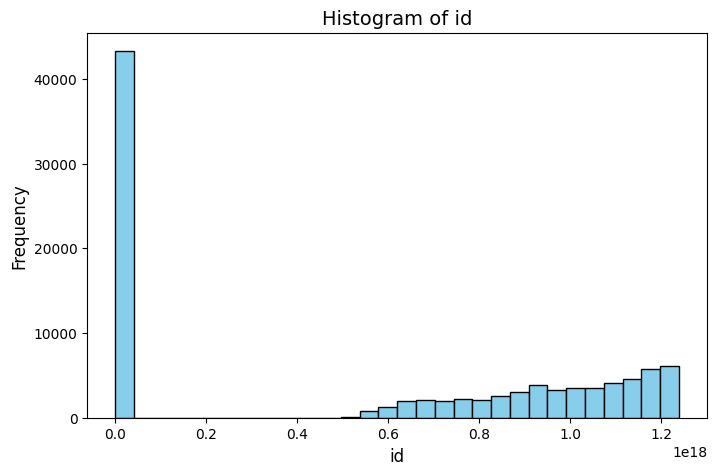

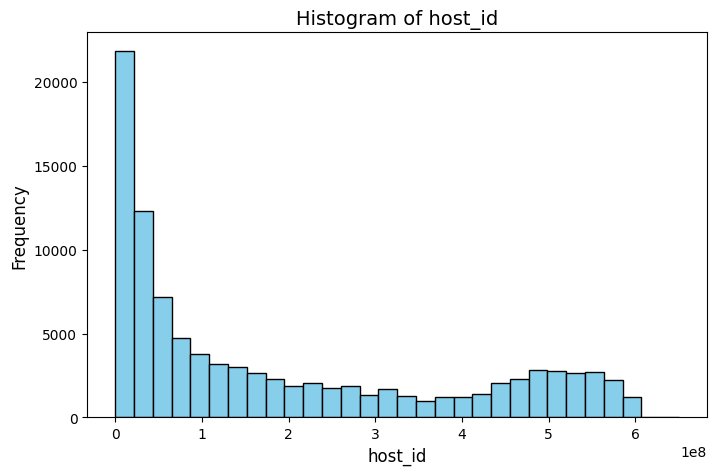

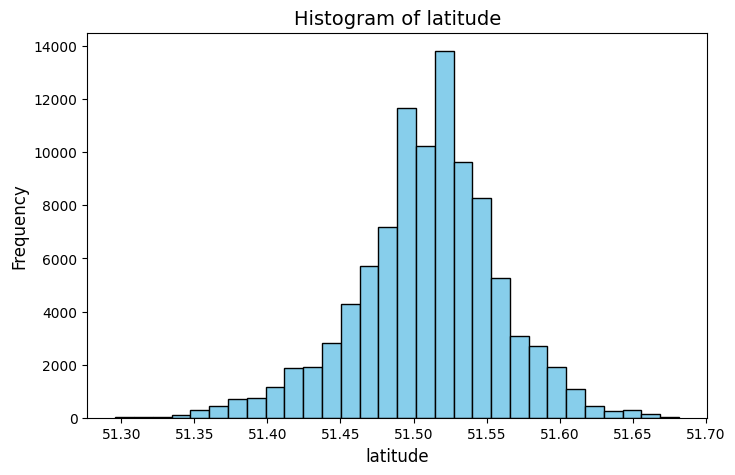

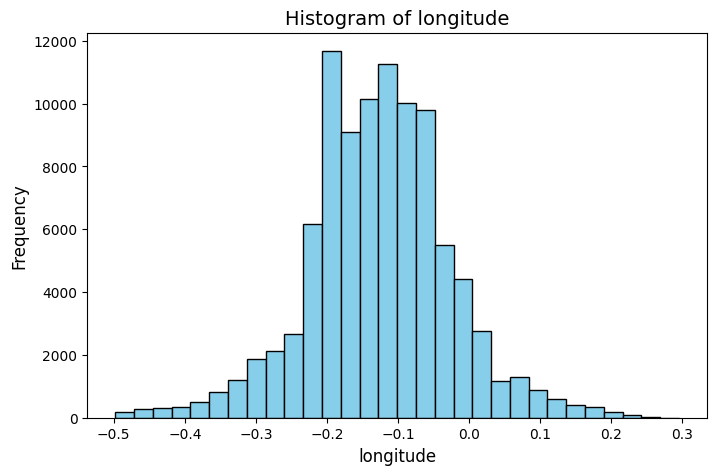

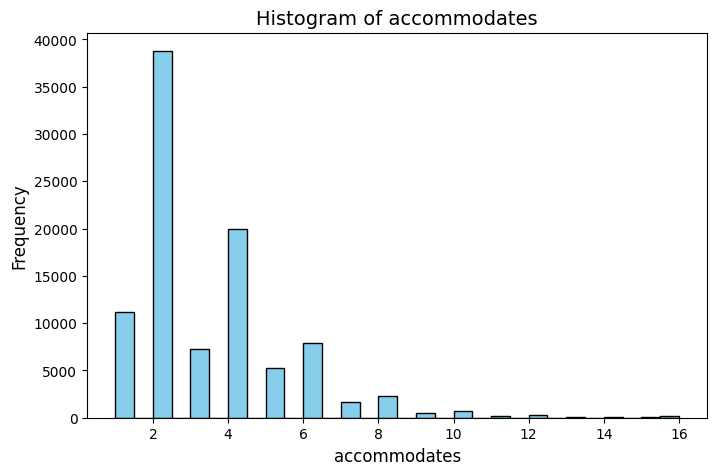

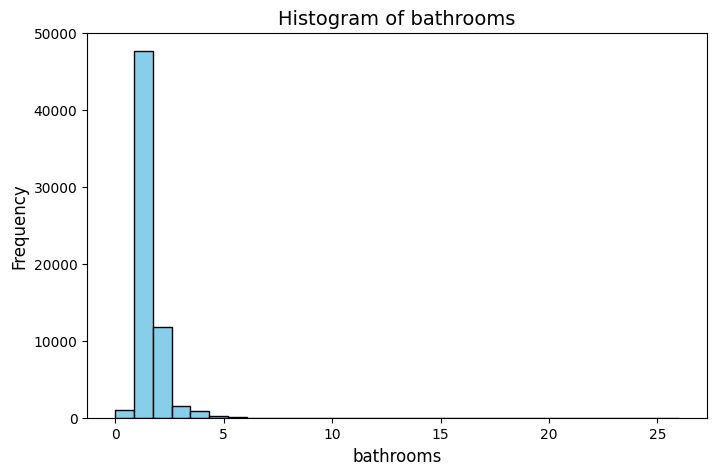

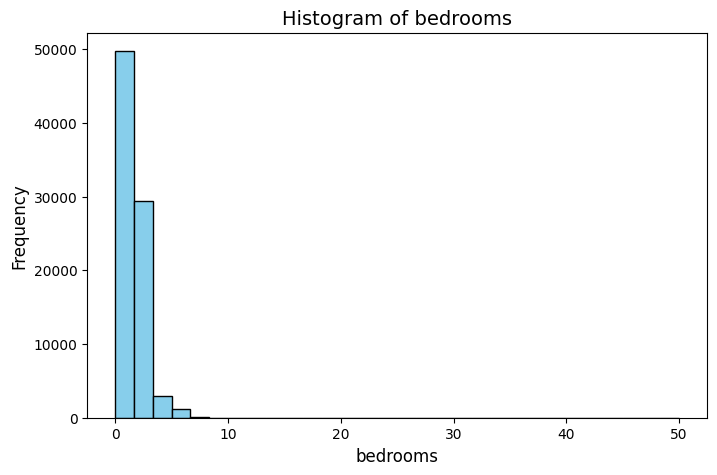

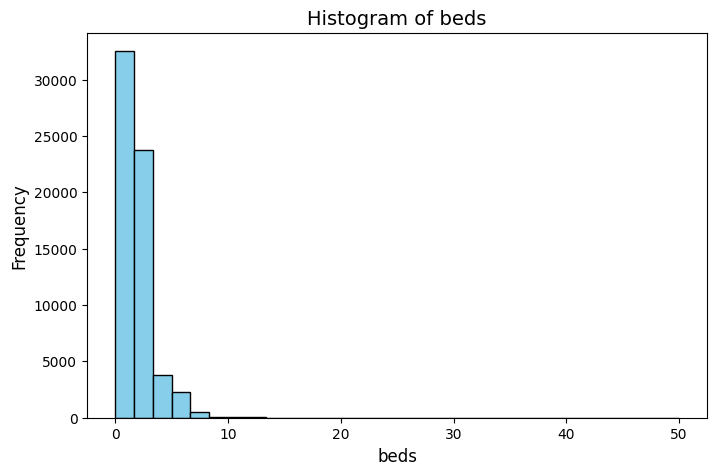

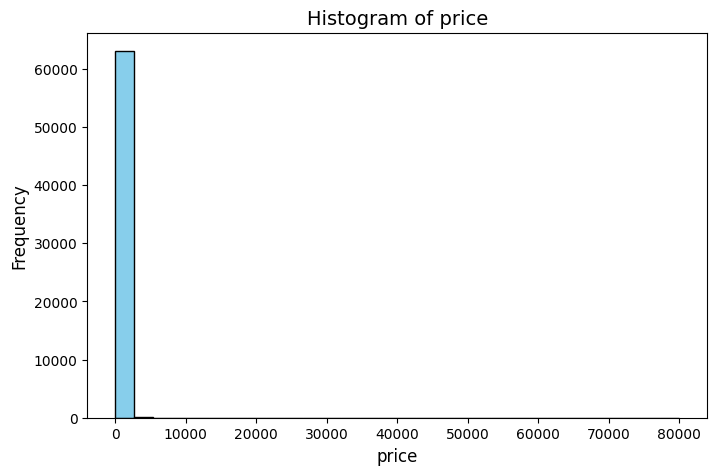

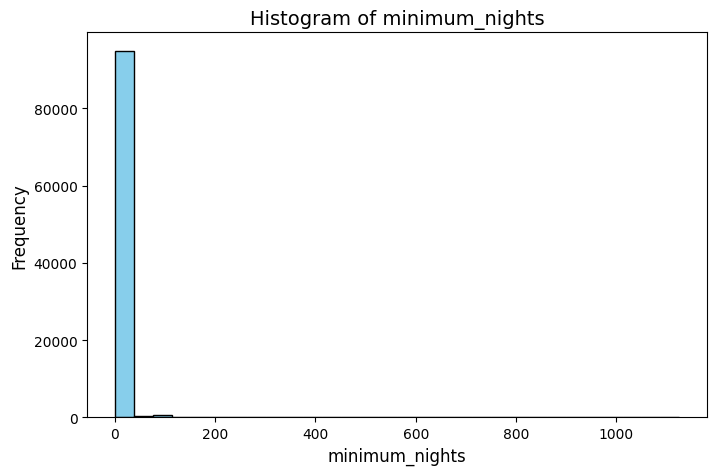

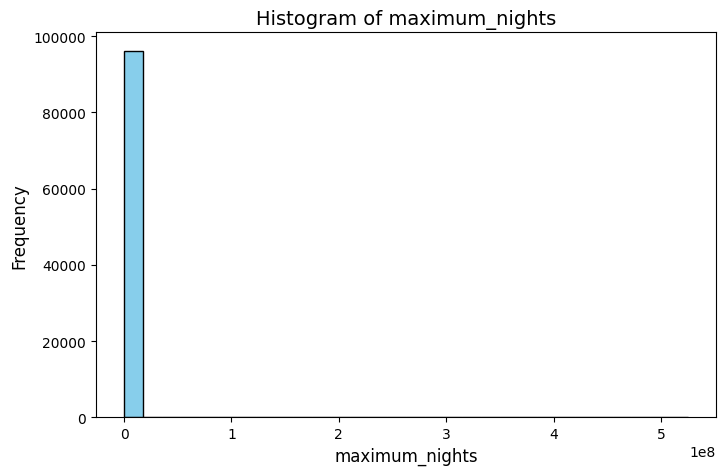

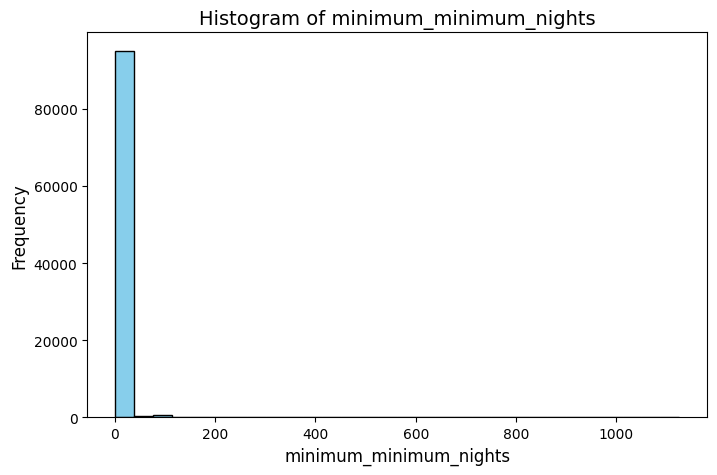

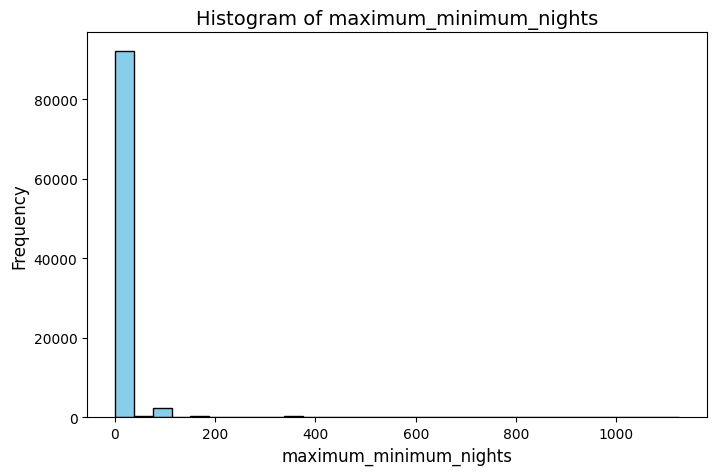

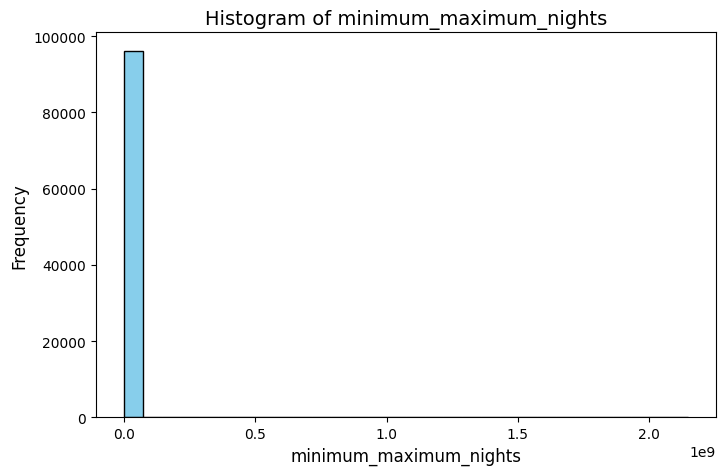

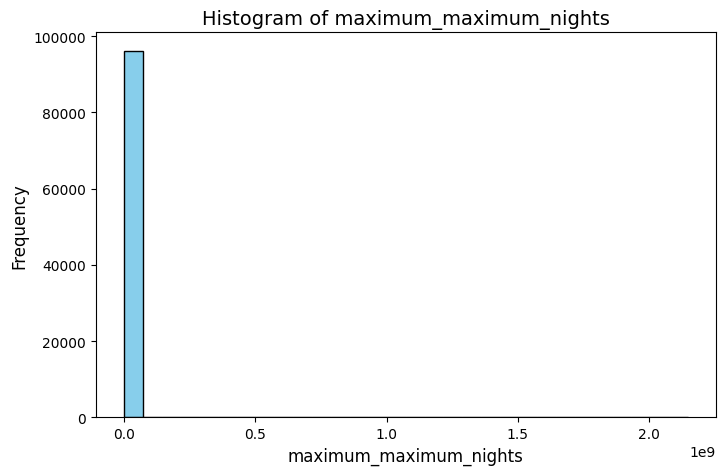

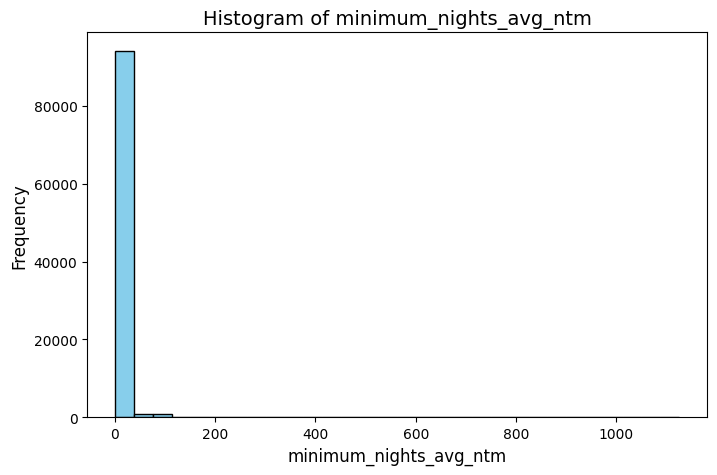

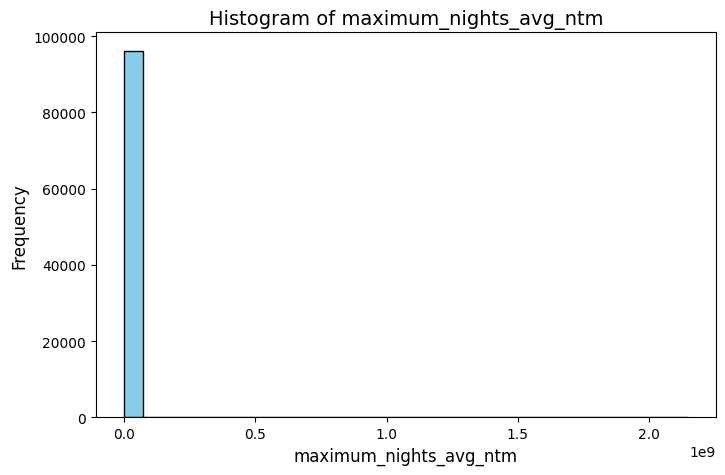

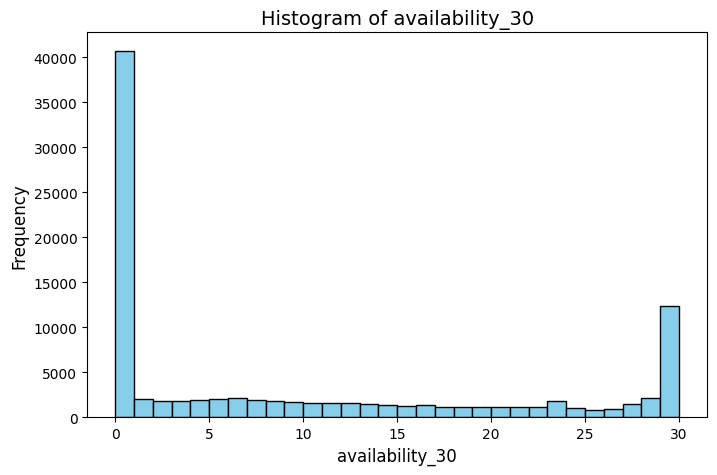

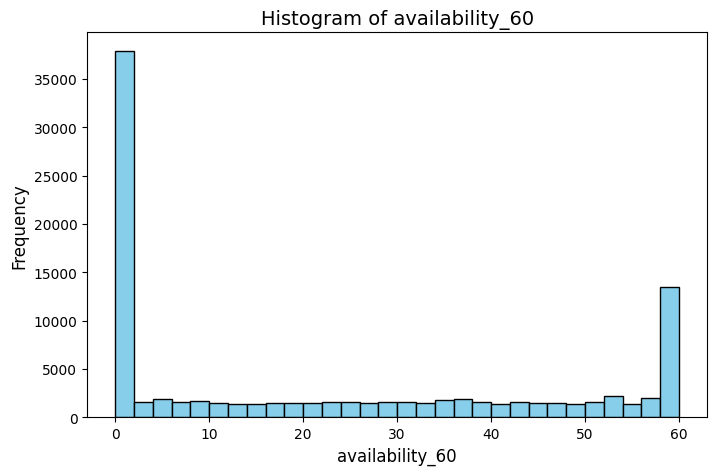

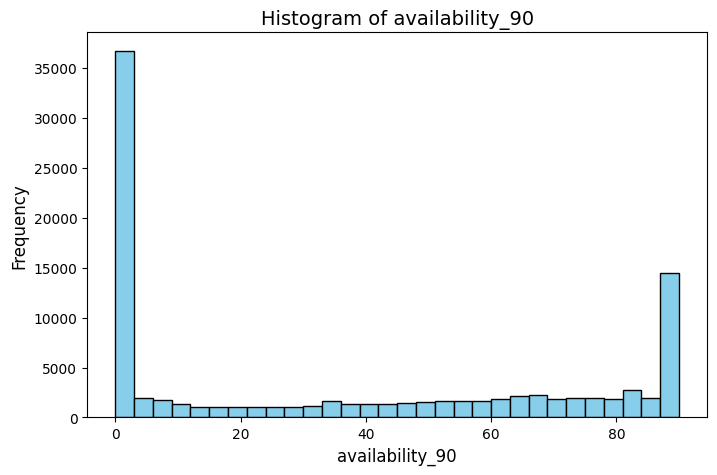

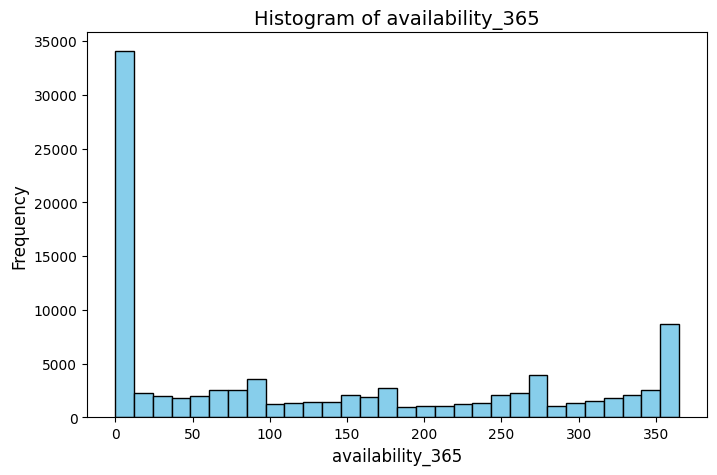

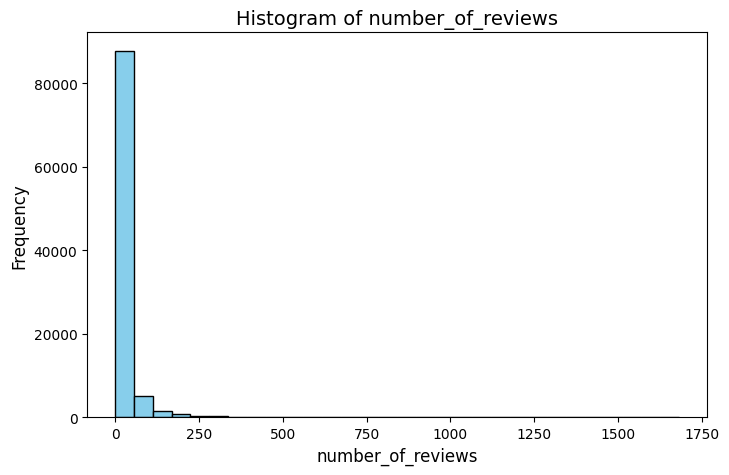

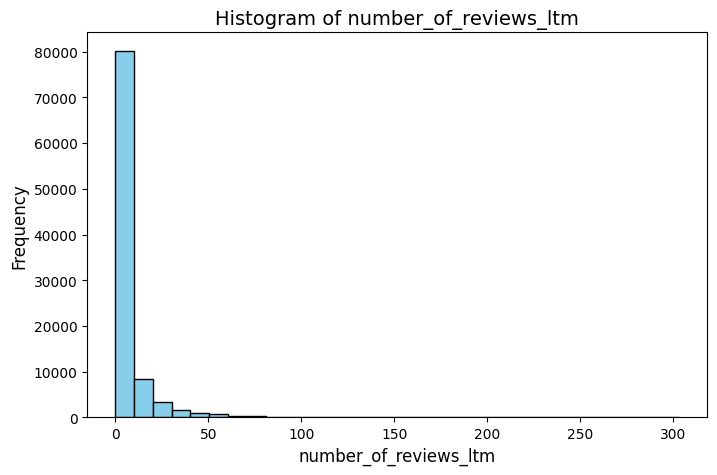

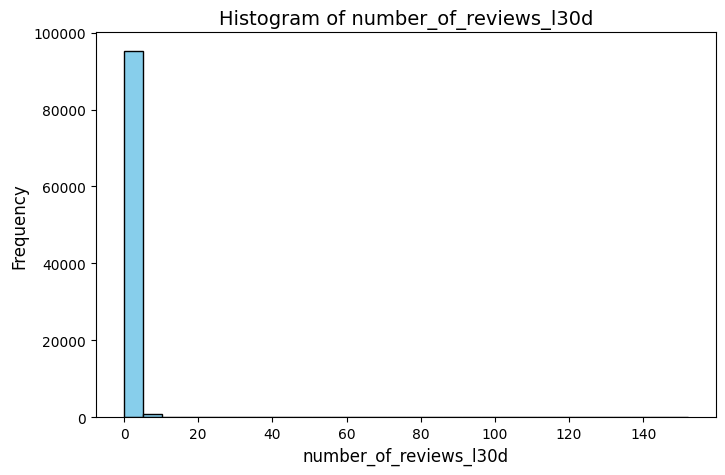

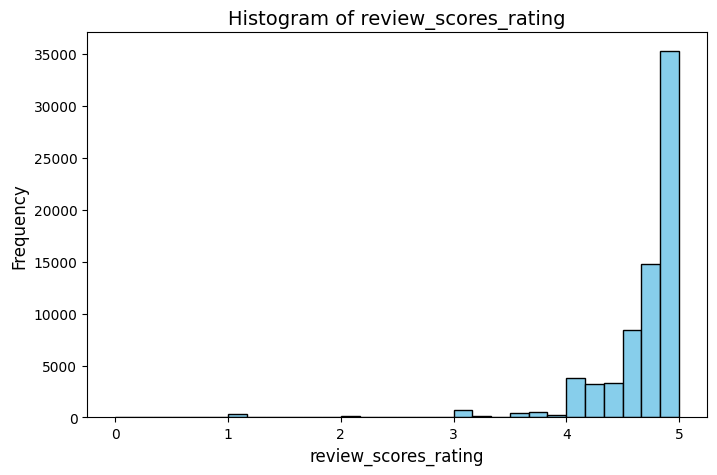

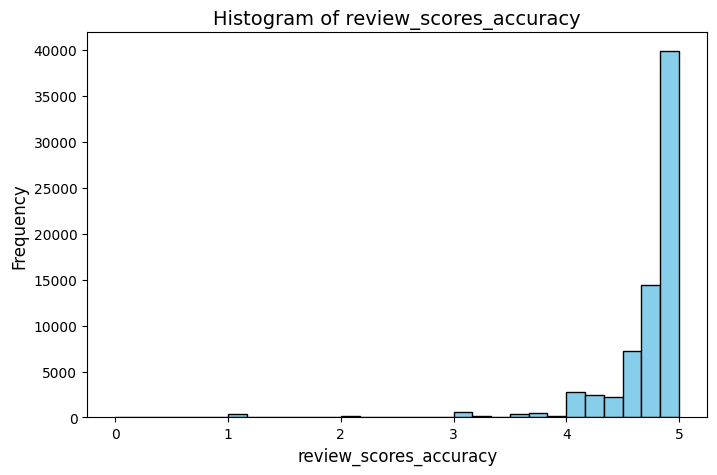

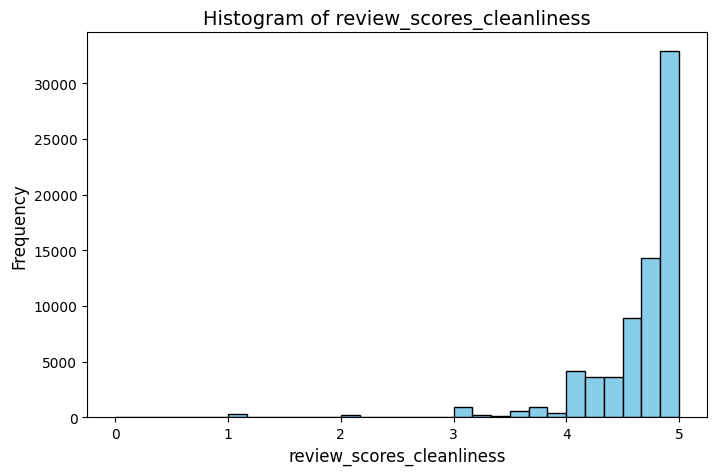

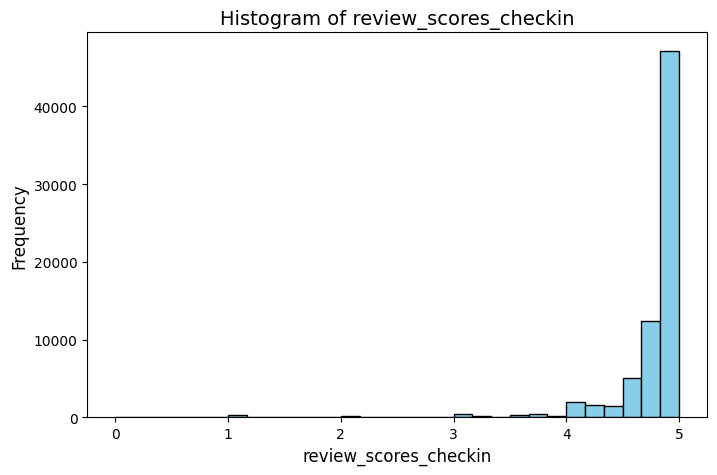

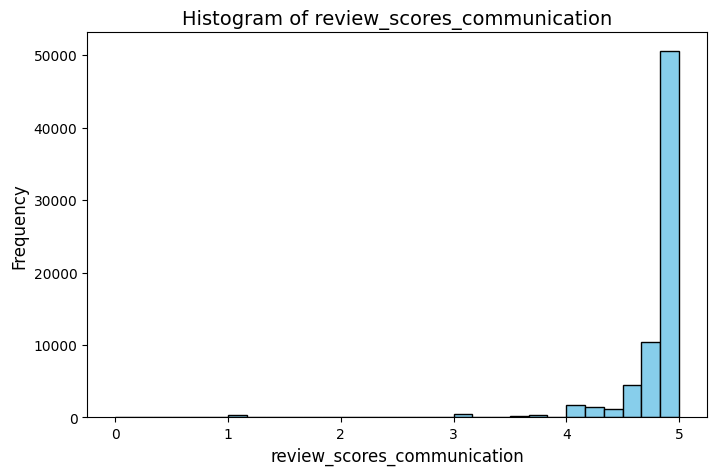

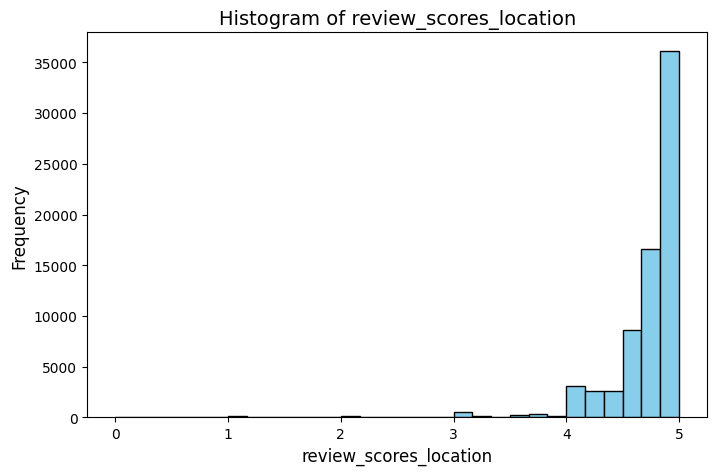

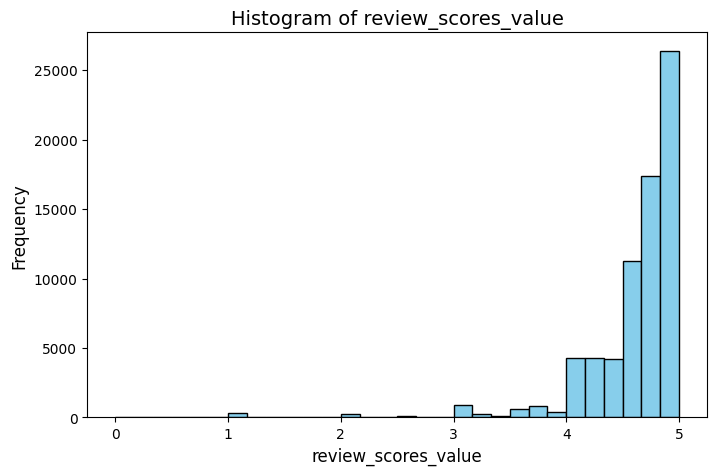

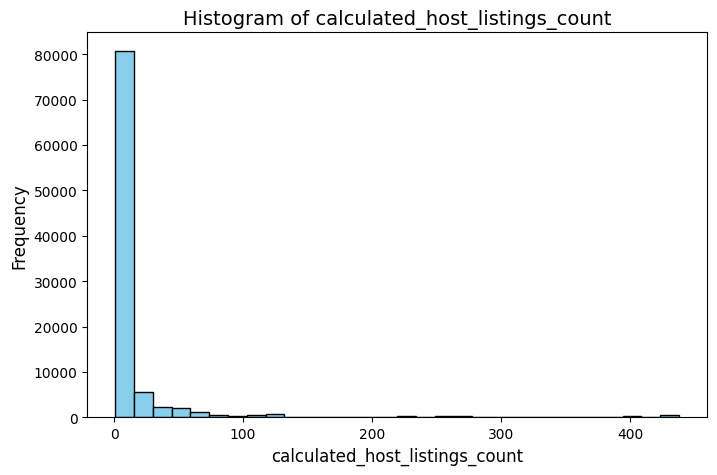

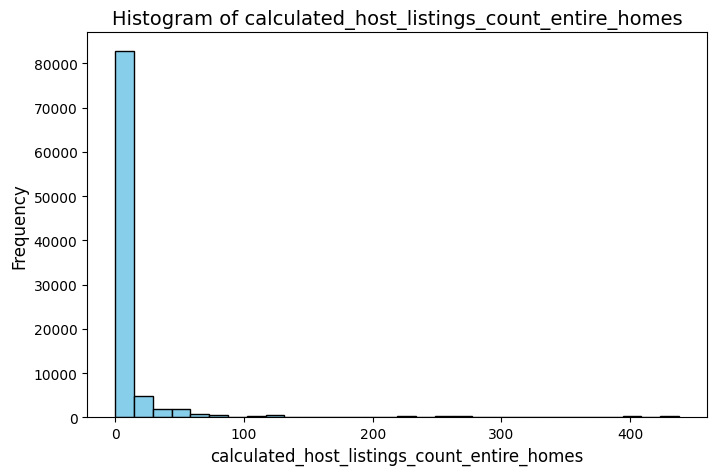

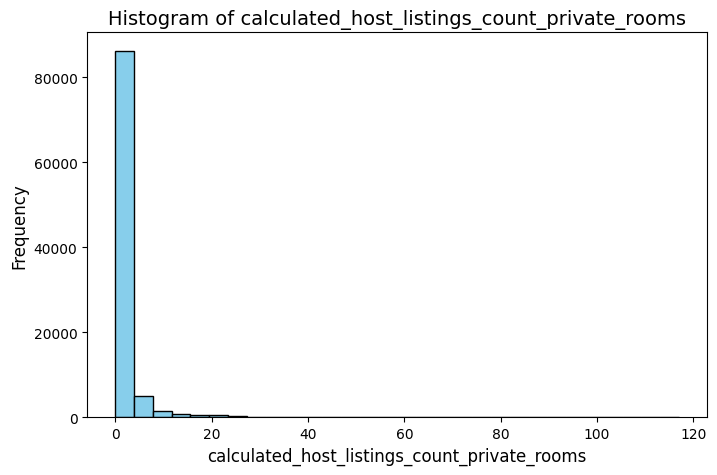

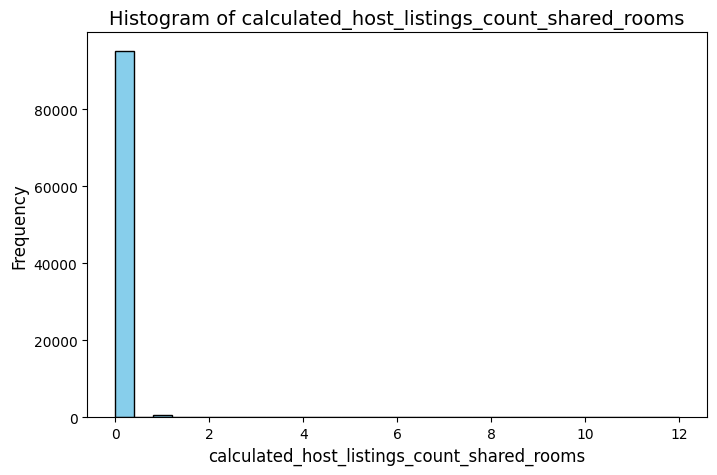

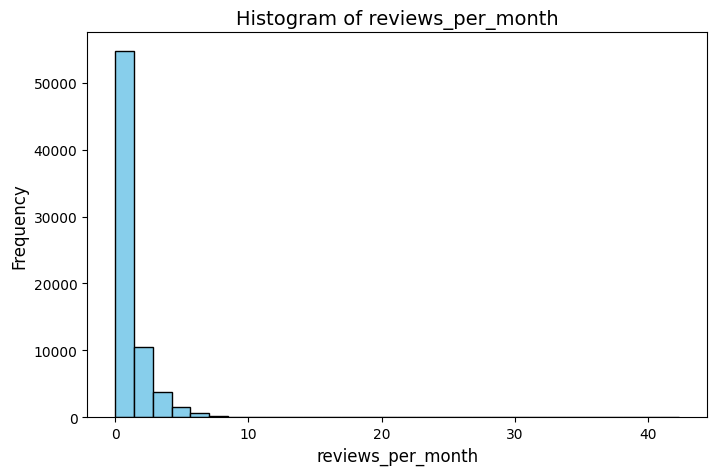

In [141]:
# Select numeric columns
numeric_columns = airbnb_df.select_dtypes(include=['number']).columns

# Create histograms for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    airbnb_df[column].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(False)
    plt.show()

# Explain the distribution for each one of the histograms

Histogram of ID, scrape_id, host_id:
- We can't analyze the histogram because it is wrong, numbers don't give any sort of value.

Histogram of host_listings_count:
- Highly Right Skewed Distribution, most hosts have a small number of listings, with the majority concentrated near 0.
- Small amount of hosts manage a big number of listings, as seen in the long tail to the right.

Histogram of host_total_listings_count:
- Highly Right Skewed Distribution, most hosts have a small number of listings, with the majority concentrated near 0.
- Small amount of hosts manage hundreds or thousands of listings, as seen in the long tail to the right.

Histogram of neighbourhood_group_cleansed:
- Flat Distribution, shows no variability (data points).
- The column contains only one unique value or entirely empty.


Histogram of latitude:
- Normal distribution, the values follow the bell-shaped curve; most properties are concentrated around a central range.
- The peak occurs near 51.50, indicating this latitude corresponds to the dnesest property locations (central london).

Histogram of longitude:
- Normal Distribution, the values follow the same bell shaped curve as latitude, indicating most properties are clustered around a central range.
- The peak occurs near -0.1, which correspond to the central areas in London.

Histogram of accomodates:
- Right Skewed Distribution, the majority of listings accomodate 1-4 people, with a sharp decline in frequency for higher accomodation capacities.
- Most listings are designed to accomodate 2 people, indicating a focus on small groups/couples.


Histogram of bathrooms:
- Right Skewed Distribution, majority of properties have 1-2 bathrooms.
- Most listing have 1 bathroom, reflecting small sized accomodations.

Histogram of bedrooms:
- Right Skewed Distribution, the majority of properties have 1-3 bedrooms, with frequencies dropping for properties with more bedrooms.
- Most listings have 1 bedroom, reflecting small sized accomodations.

Histogram of beds:
- Right Skewed Distribution, most properties have 1-2 beds, with frequencies dropping as the number of beds increases.
- This reflects the majority of listings have 1 bed, aligning with small accomodations.

Histogram of price:
- Highly Right Skewed Distribution, most listings have prices concentrated at the lower end, with few extremely high priced listings, creating a long tail.
- The majority of listings are priced within relatively low range, reflecting they have affordable prices accomodations.

Histogram of minimum_nights:
- Right Skewed Distribution, the majority of listings have a minimum night requirement of 1-2 nights, with very few extended minimum stays.
- The long tail represents a small number of listings with higher minimum nights requirements.

Histogram of maximum_nights:
- Right Skewed Distribution, most listings have relatively low maximum night limits but as seen in histogram, there are extreme outliers with very high maximum stays.
- This represents properties that allow indefinite or long-term stays.

Histogram of minimum_minimum_nights:
- Right Skewed Distribution, data is concentrated around very low minimum requirements, usually 1 night, which is common in short-term rentals.
- The tail represents few properties with unusually high minimum requirements even at their lowest, possibly due to stricter rental policies.

Histogram of maximum_minimum_nights:
- Right Skewed Distribution, most listings have their upper minimum thresholds set at a low value.
- The long tail represents some properties with higher maximum minimum night requirements, potentially offering to renters looking for longer durations.

Histogram of minimum_maximum_nights:
- Right Skewed Distribution, the majority of listings start with low maximum night limits.
- A few listings with much higher limits, representing flexibility for long-term stays in specific cases.

Histogram of maximum_maximum_nights:
- Right Skewed Distribution, most listings cap their maximum nights at lower values, consistent with short-term rental policies.
- Extreme outliers appear, representing some properties allow stays up to several years. This indicates there are some cases of corporate housing or semi-permanent residences.

Histogram of minimum_nights_avg_ntm:
- Right Skewed Distribution, listings mostly have low average minimum nights, around 1-2 nights.
- A small portion has higher averages, likely driven by policies requiring a few nights stay for specific types of rental (holiday homes/ seasonal properties).

Histogram of maximum_nights_avg_ntm:
- Right Skewed Distribution, the majority of listings have a very low average maximum night limits. This indicates that most properties are optimized for short-term rentals with defined maximum stay limits.
- The extreme right tail represents listings with high average maximum night values.

Histogram of calendar updated:
- Uniform Distribution, contaings a signle or small range of unique values, no visible variation in the histogram.


Histogram of availability_30:
- Bimodal Distribution, with 2 significant peaks at the extremes.
- Many listings are either not available or fully available in the last 30 days, indicating a polarizing trend in booking activity.

Histogram of availability_60:
- Similar Bimodal Distribution, as availability_30 with peaks at 0 and 60 days.
- Listings tend to either be unavailable or fully open for bookings over a longer 60 day stay.

Histogram of availability_90:
- Bimodal Distribution, with major peaks at 0 and 90 days.
- The trend persists for a 90 day period, representing that availability is consistent across time frames.

Histogram of availability_365:
- Multimodal Distribution, with prominent peaks at 0 and 365 days, and smaller peaks at intermediate values.
- Some listings are perpetually unavailable or fully available for the entire year while others have more intermediate booking trends

Histogram of number_of_reviews:
- Positively Skewed Distribution, most listings have few reviews, with a small number showing significant higher counts.
- Most properties have very few reviews, this represents that a large portion of listings may be new or not actively reviewed.
- A small portion of listings have a high number of reviews, indicating they are well- established and popular

Histogram of number_of_reviews_ltm:
- Highly Right Skewed Distribution, has the majority of values near 0.
- Most listings had very few or no reviews in the last year, with a small subset receiving up to 300 reviews.

Histogram of number_of_reviews_l30d:
- Right Skewed Distribution, dominated by listings with 0 or few reviews.
- This indicates recent review activity is limited.

Histogram of review_scores_rating:
- Strongly left skewed Distribution, most scores concentrated near the maximum value.
- This shows a general trend of high customer satisfaction, with the majority of properties achieving near-perfect scores.
- Poorly rated listings are rare

Histogram of review_scores_accuracy:
- Left Skewed Distribution, with most of the values clustered near 5. Scores below are uncommon.
- This indicates that hosts generally meet expectations regarding accuracy in property descriptions.

Histogram of review_scores_cleanliness:
- Left Skewed Distribution, most scores near 5, few listings fall below 4.
- Cleanliness standards are generally high. Most of the listings receive excellent feedbak on it.

Histogram of review_scores_checkin:
- Left Skewed Distribution, majority of scores near 5, porr ratings are rare.
- Majority of guests rates the checkin positively.

Histogram of review_scores_communication:
- Left Skewed Distribution, majority of the values clustered at the maximum score of 5, very few listing fall below this score, they are sparsely distributed between 1 and 4.
- Communication between hosts and guestsis generally rated as excellent, low scores are rare indicationg only insolated cases of poor communication.

Histogram of review_scores_location:
- Left Skewed Distribution, most scores near 5, although a wider spread compared to other review metrics.
- Locations are generally well-rated, theres a slight higher variation in this category, most likely due to subjective preferences regarding neighborhood or accessibility.

Histogram of review_scores_value:
- Left Skewed Distribution, with scores near 5, more variation compared to cleanliness and accuracy metrics.
- This could indicate most guests feel they are receiving good value for the money payed, but also slight variation indicating mixed perceptions of pricing fairness

Histogram of license:
- Flat Distribution, likely shows no variation, implying the field might be either missing or have identical values for all records.
- We think this field may require additional investigation to determine if it's actually relevant or not.

Histogram of calculated_hosts_listing_count:
- Heavily Right Skewed Distrbution, the majority of hosts have a low number of listings with a few having significantly higher counts.

Histogram of calculated_hosts_listing_count_entire_homes:
- Right Skewed Distribution, similar to the previous histogram.
- Most hosts have a low count of entire home listings, with a small group hosting a larger number.

Histogram of calculated_hosts_listing_count_private_rooms:
- Right Skewed Distribution, slightly more concentrated at very low counts.
- Most hosts offer few private rooms, and very few offer many.

Histogram of calculated_hosts_listing_count_shared_rooms:
- Right Skewed Distribution, concentrated at the lowest values (0, -1)
- Shared room offerings are uncommon, with very few listings having more than a couple.

Histogram of reviews_per_month:
- Right Skewed Distribution, most listings have very few reviews per month, with only a few having high volume.
- This indicates varying levels of listing popularity.

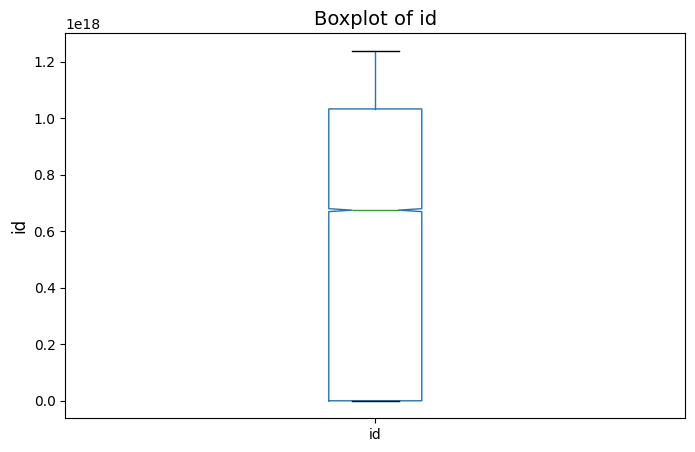

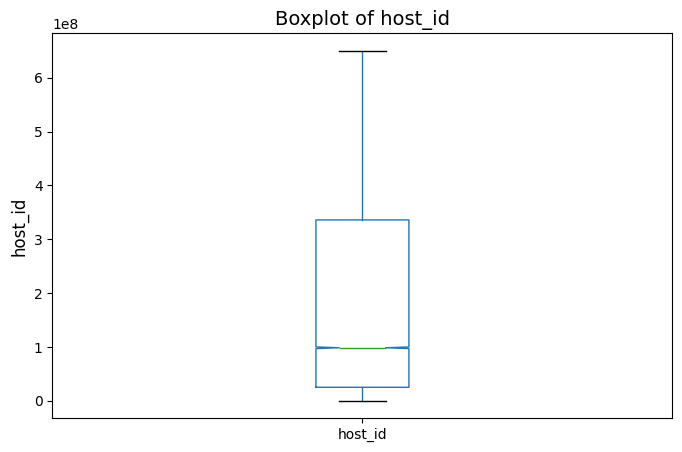

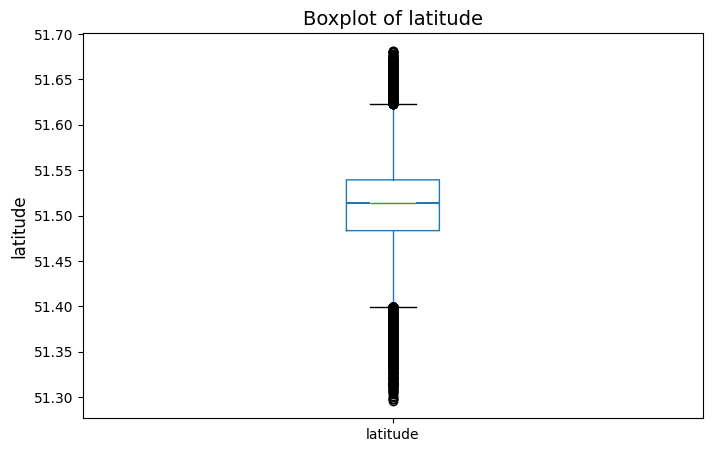

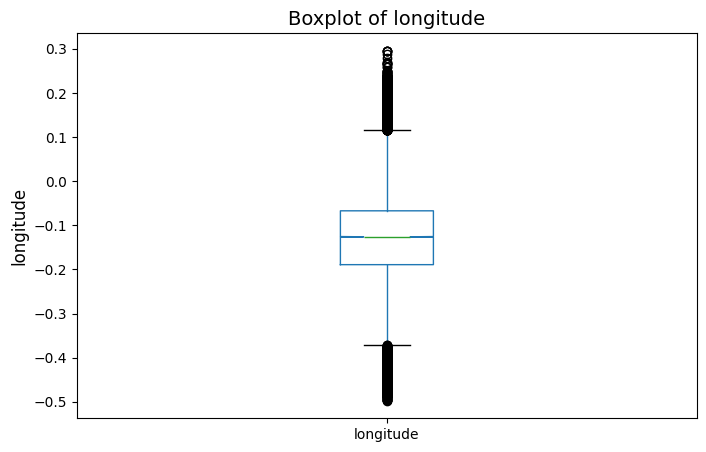

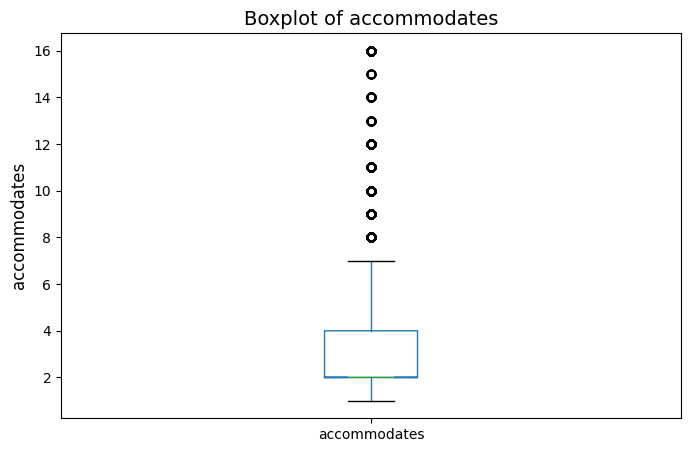

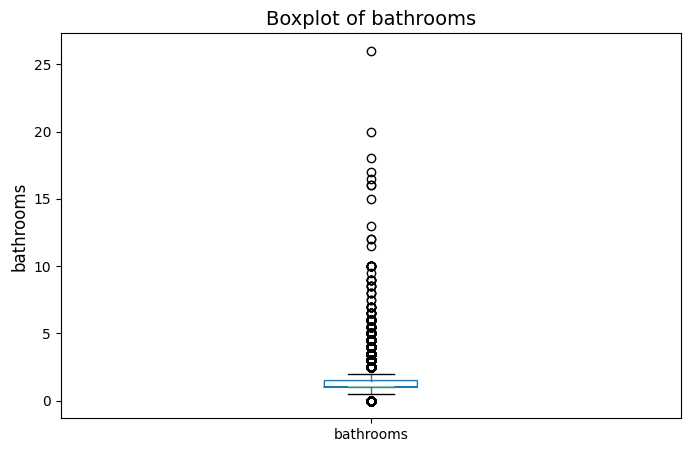

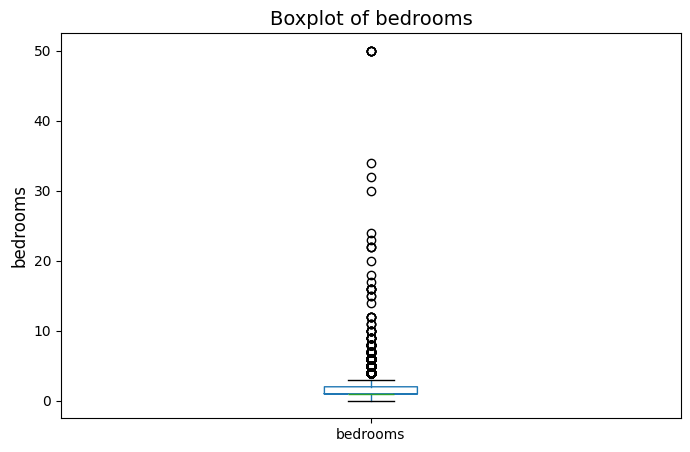

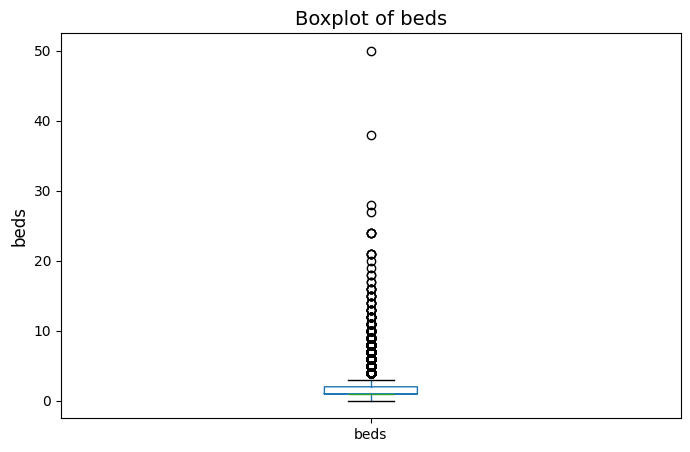

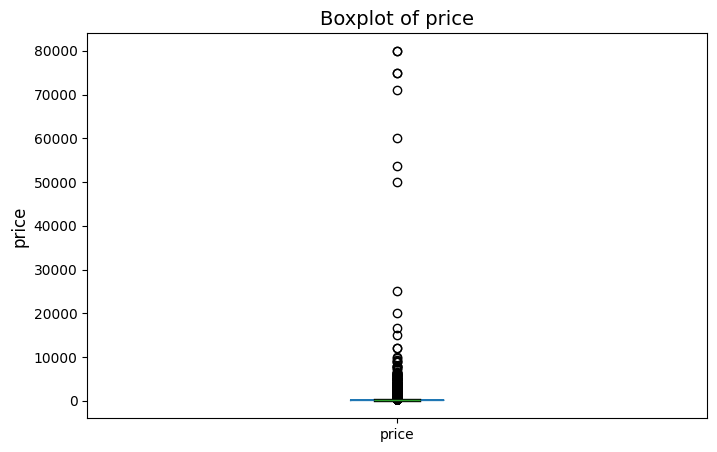

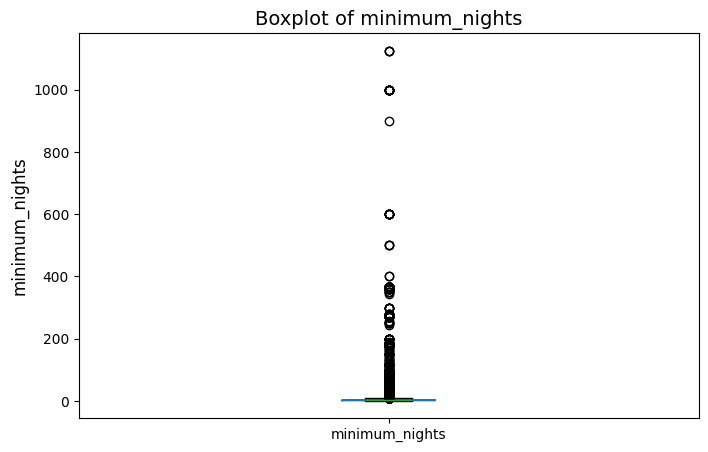

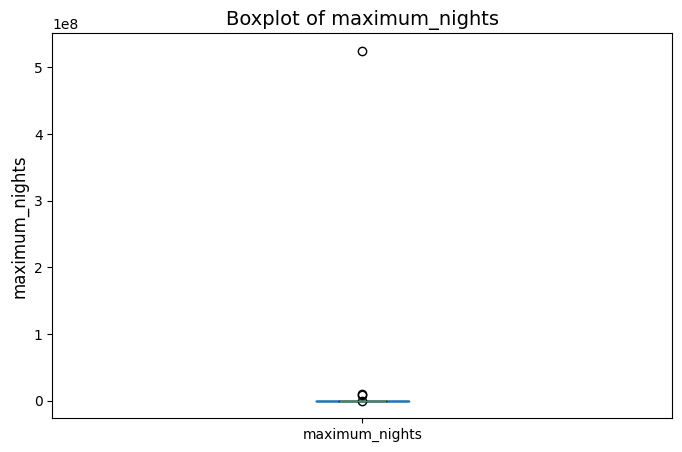

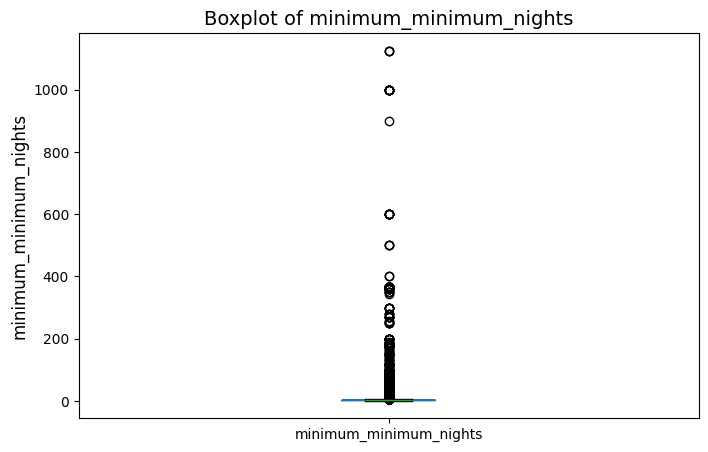

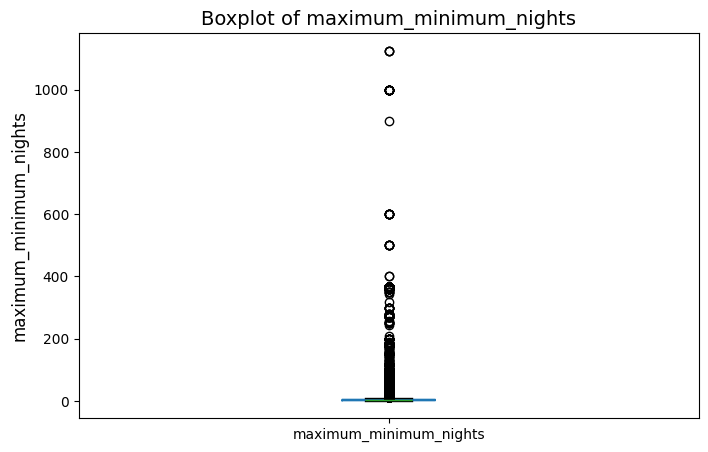

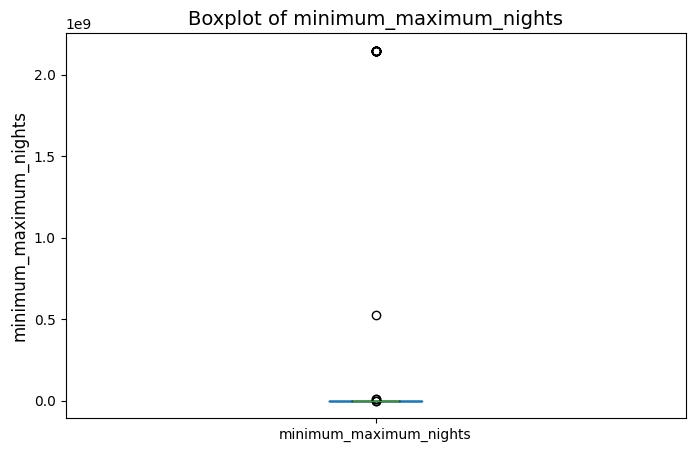

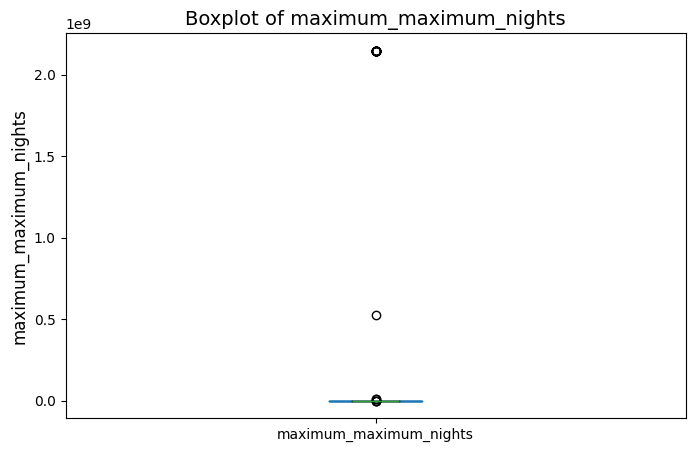

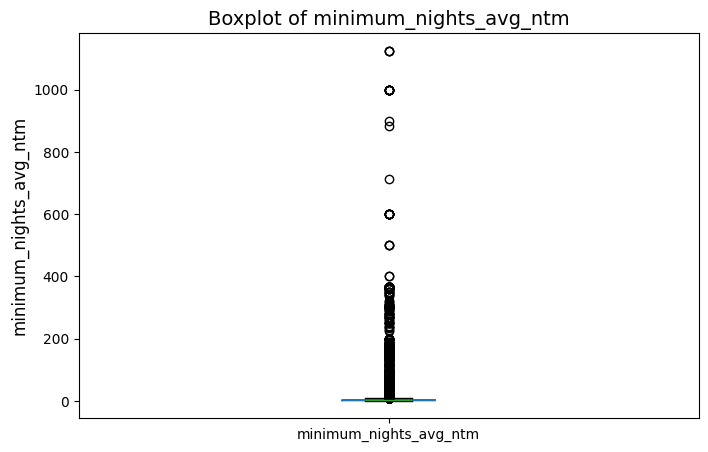

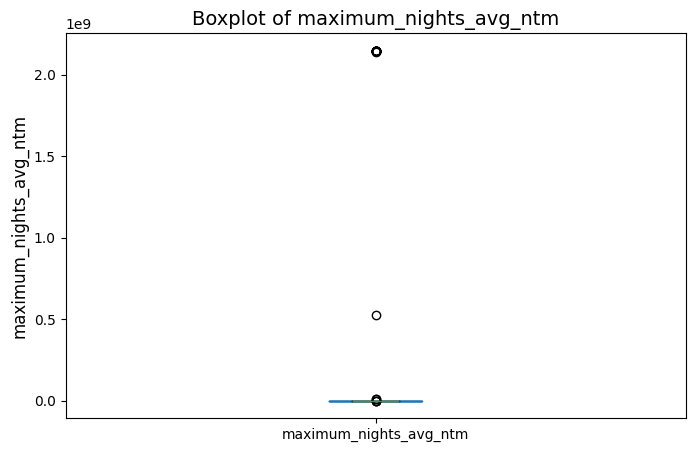

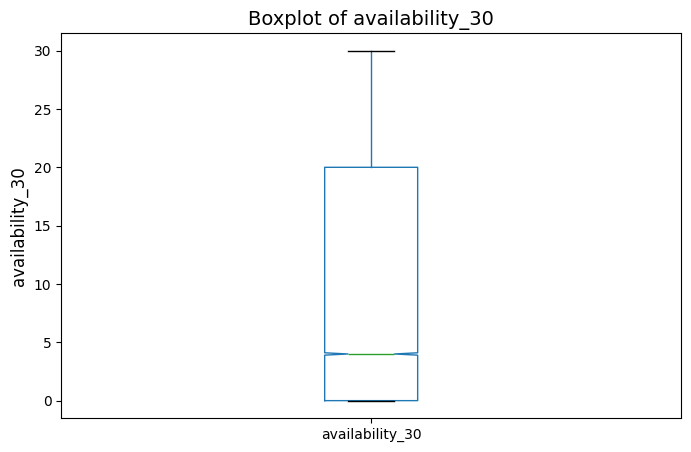

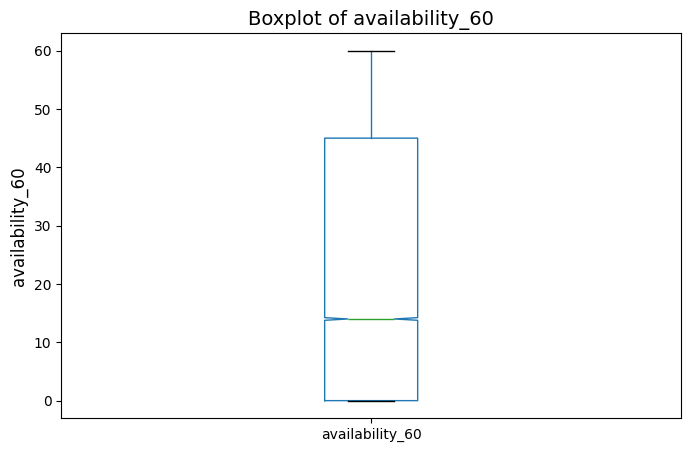

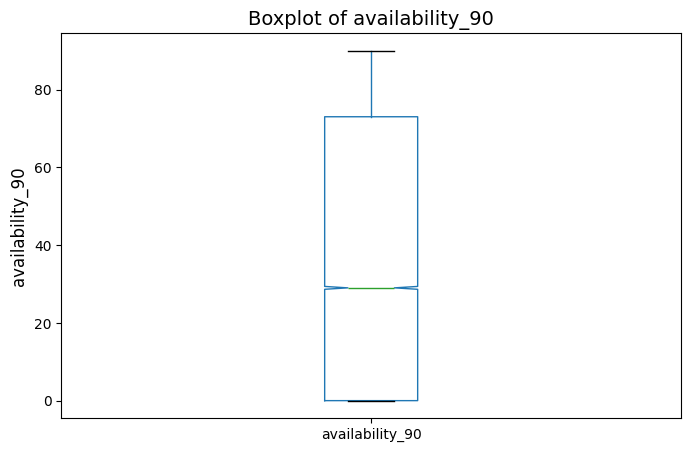

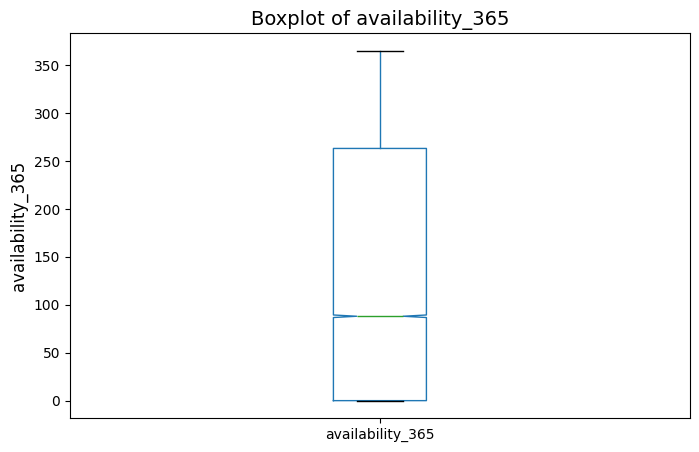

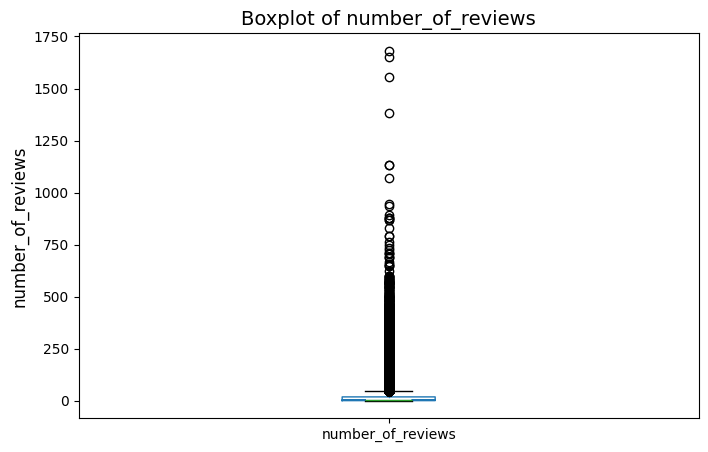

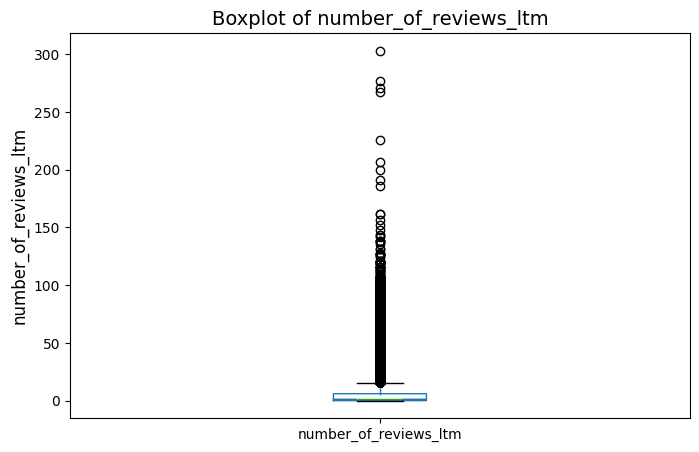

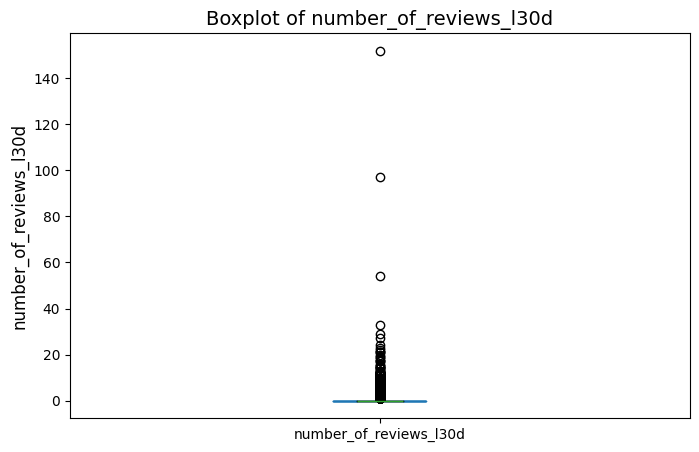

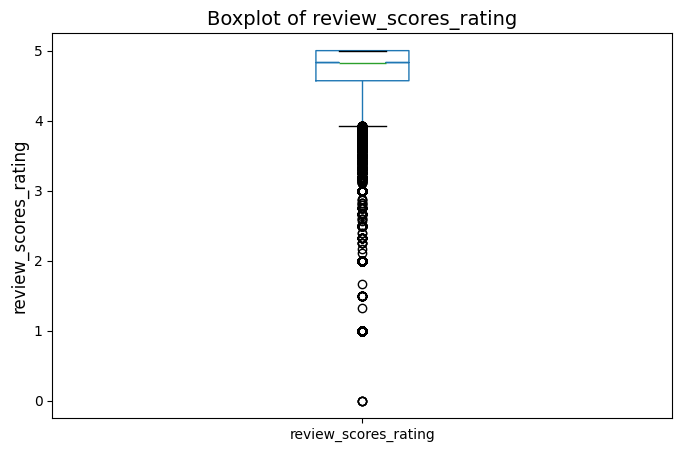

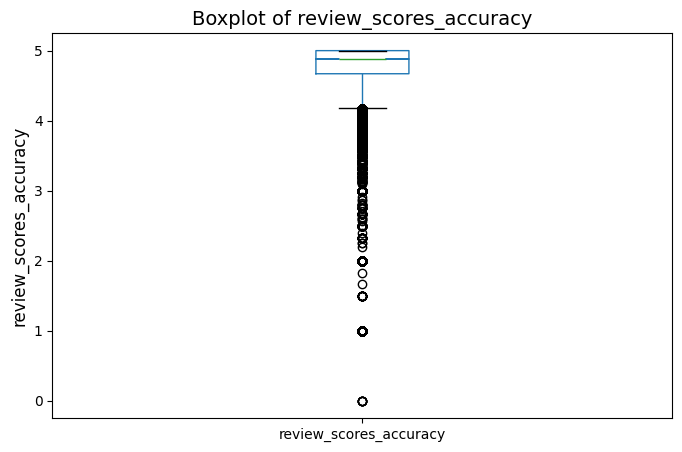

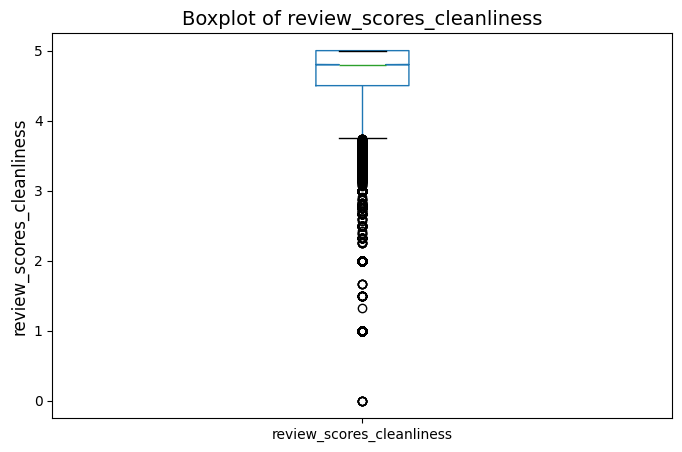

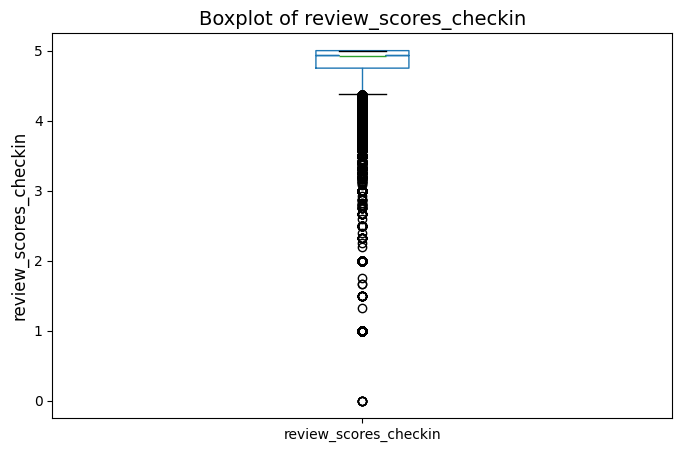

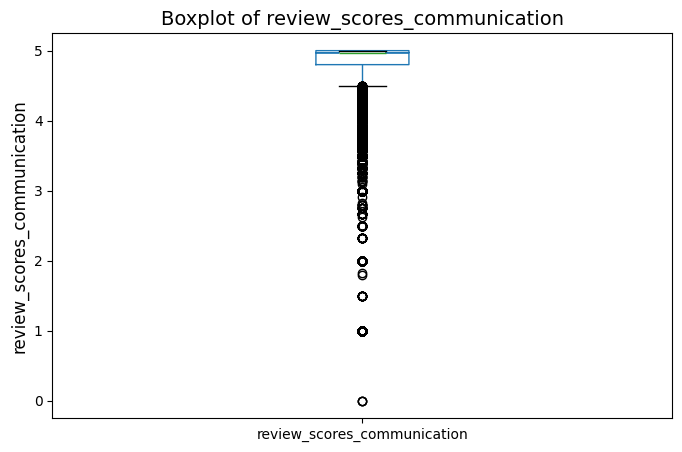

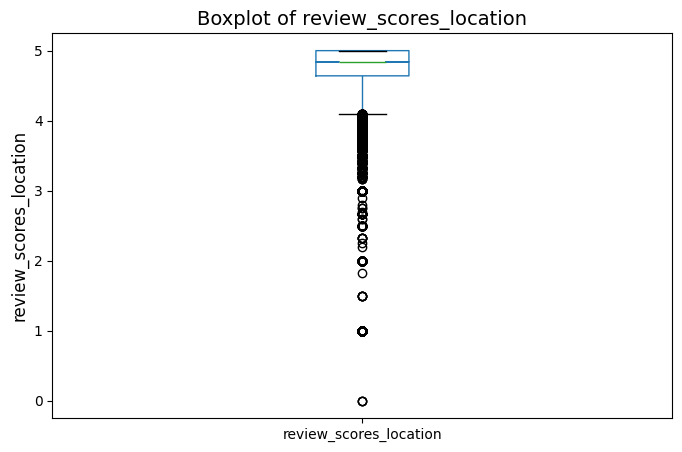

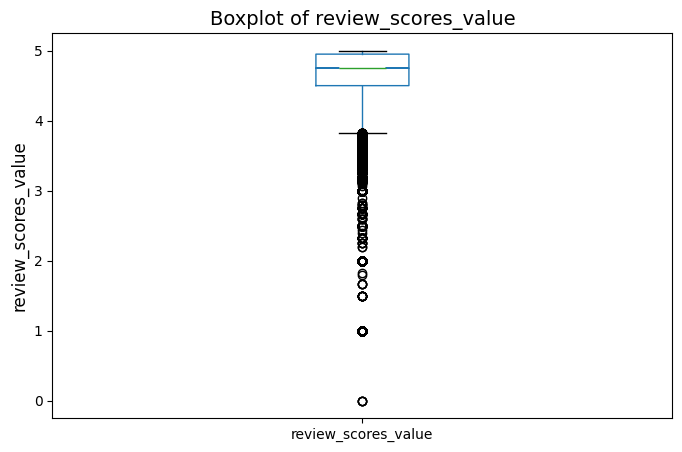

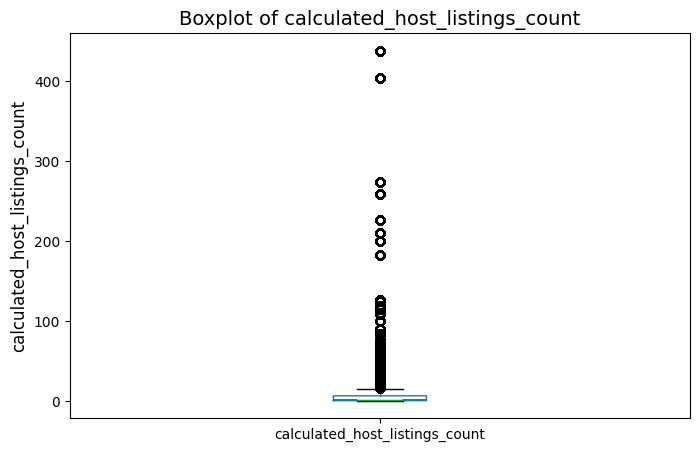

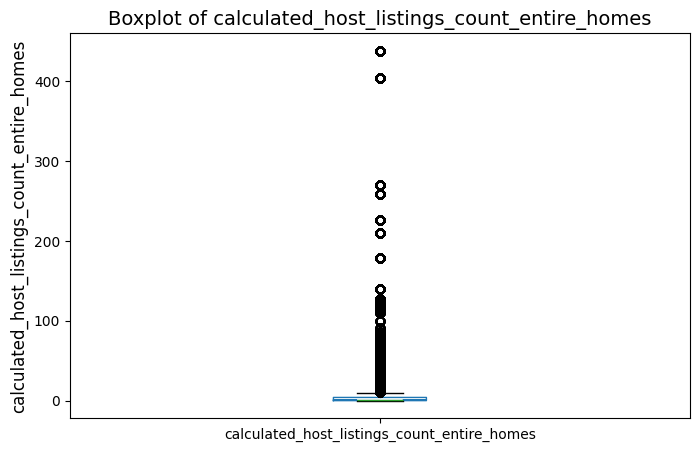

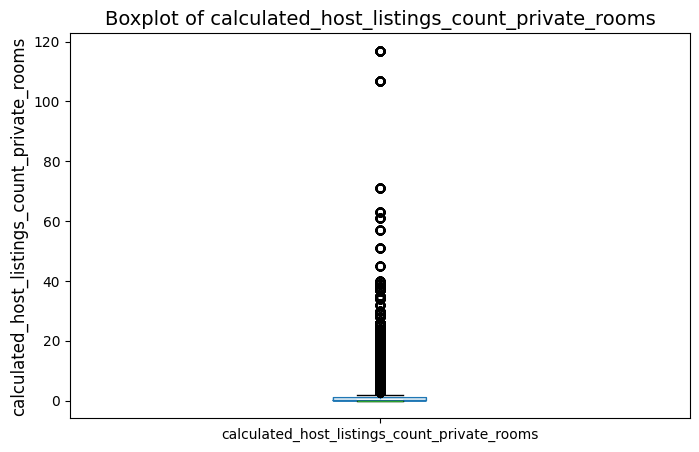

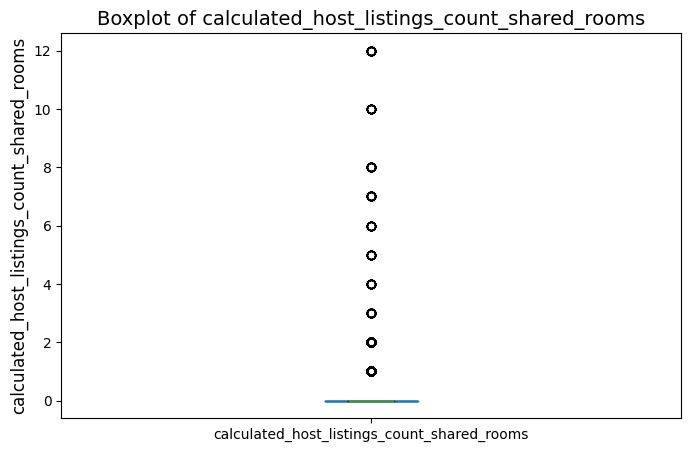

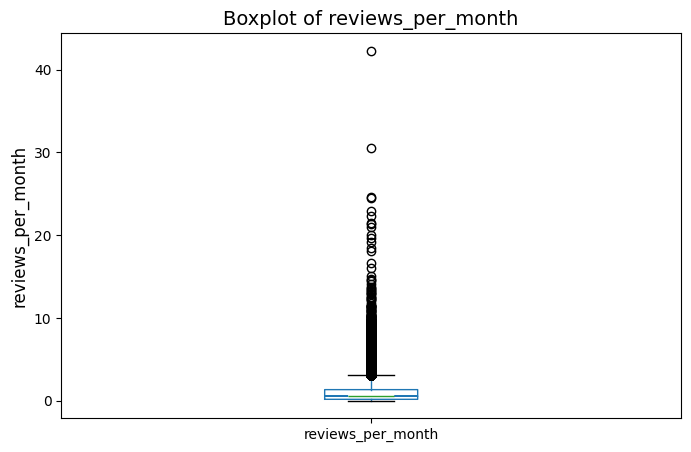

In [142]:
# Select numeric columns
numeric_columns = airbnb_df.select_dtypes(include=['number']).columns

# Create boxplots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    airbnb_df.boxplot(column=column, grid=False, notch=True)
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.ylabel(column, fontsize=12)
    plt.show()

# Explanations of boxplots

- For this explanations we decided to focus on the most important boxplots for our specific target which is price.

Boxplot of price:
- As we can see, the price distribution is highly skewed with multiple outliers on the end.
- The average of prices are close to 0, indicating most prices are concentrated at lower levels.
- Outliers goes as higher as 80,000 showing extremely high-price listings.
- This represents the majority of listings are affordable.
- A small number of expensive listings significantly inflate the overall range, which might distort the average price.

Boxplot of Bedrooms:
- The number of bedrooms shows a similar pattern: most values are clustered near zero, and there are outliers with significantly higher bedroom counts.
- The majority of properties have a small number of bedrooms, as seen by the small size of the IQR.
- There are extreme outliers, such as properties with 30 to 50 bedrooms, which are unrealistic for typical residential listings.

Boxplot of Reviews per Month:
- Most values for reviews per month are close to zero, meaning most listings receive very few or no reviews.
- The IQR is narrow, again showing that the majority fall in a small range of values.
- There are outliers with up to 40+ reviews per month, indicating a small subset of listings that are significantly more popular or frequently rented.

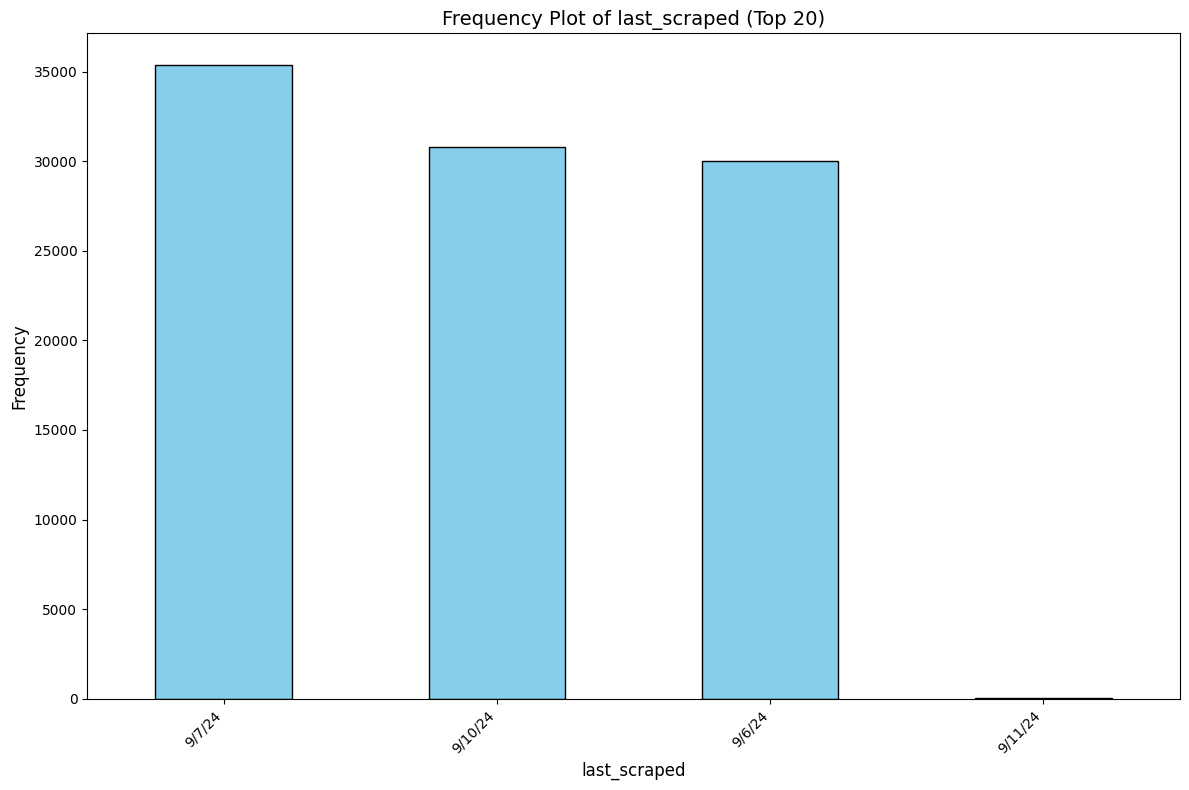

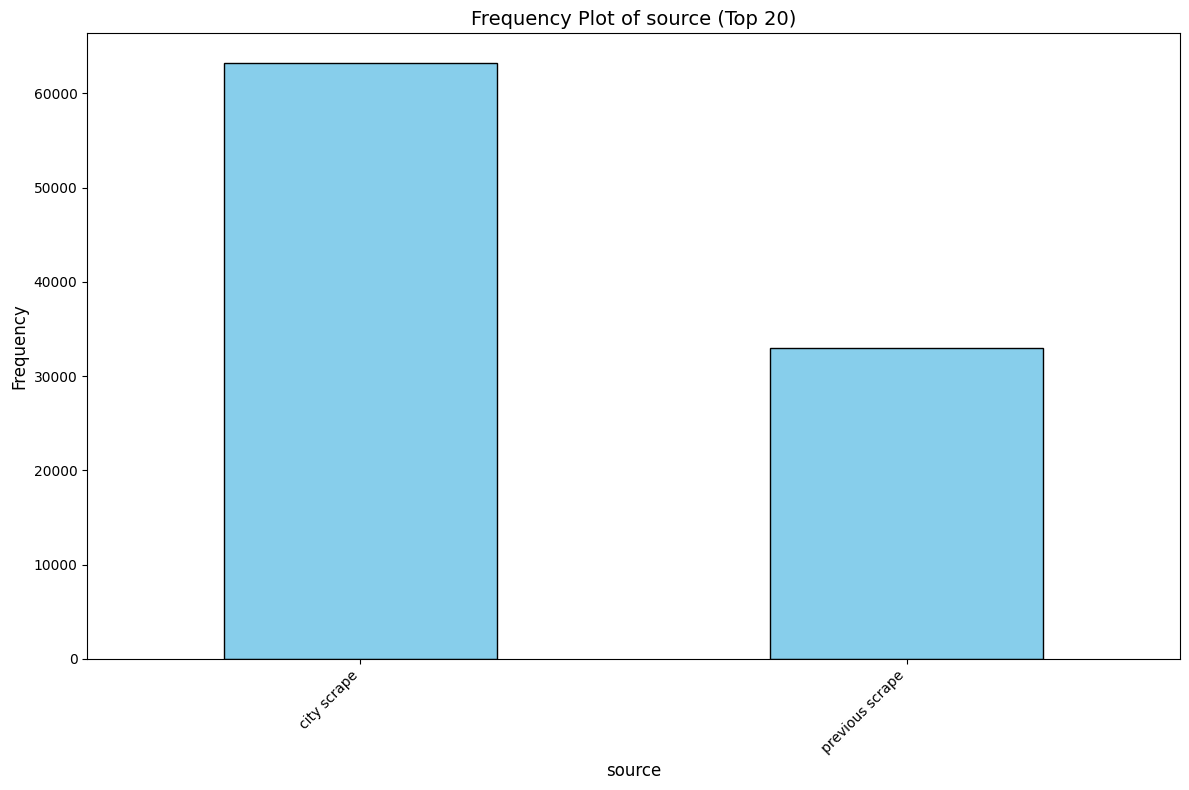

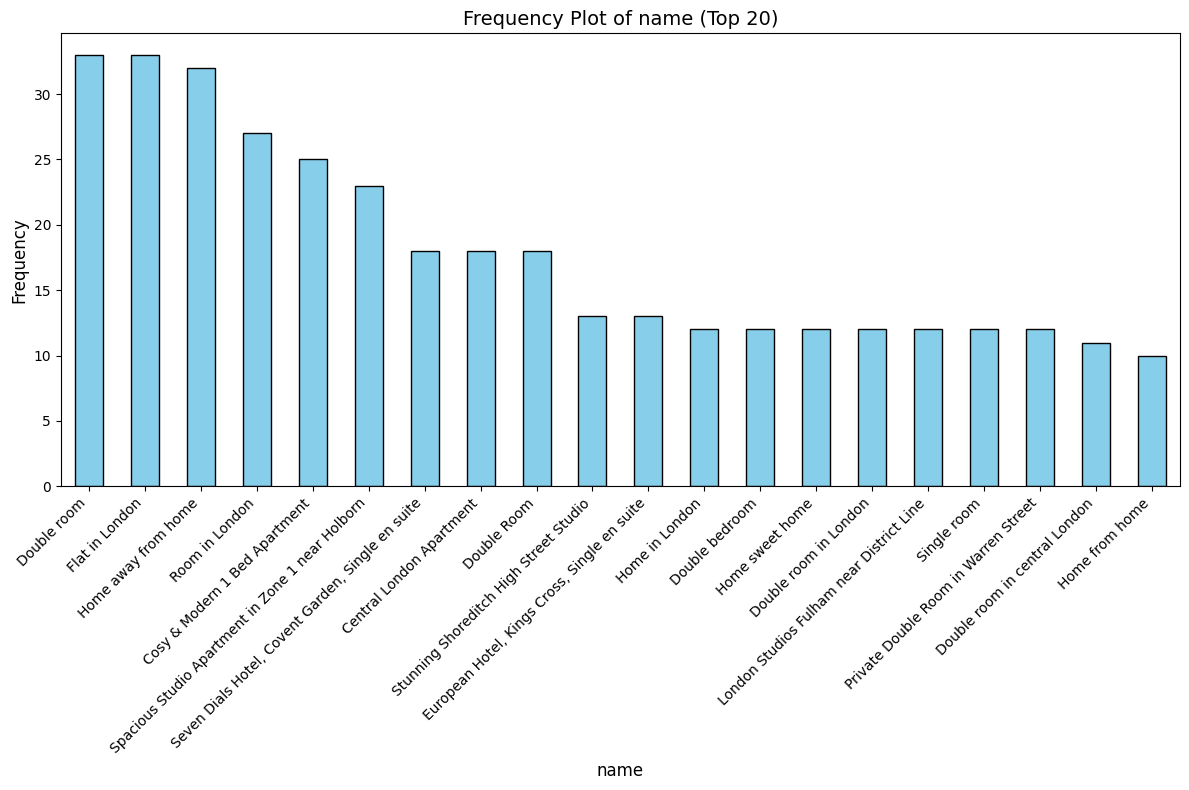

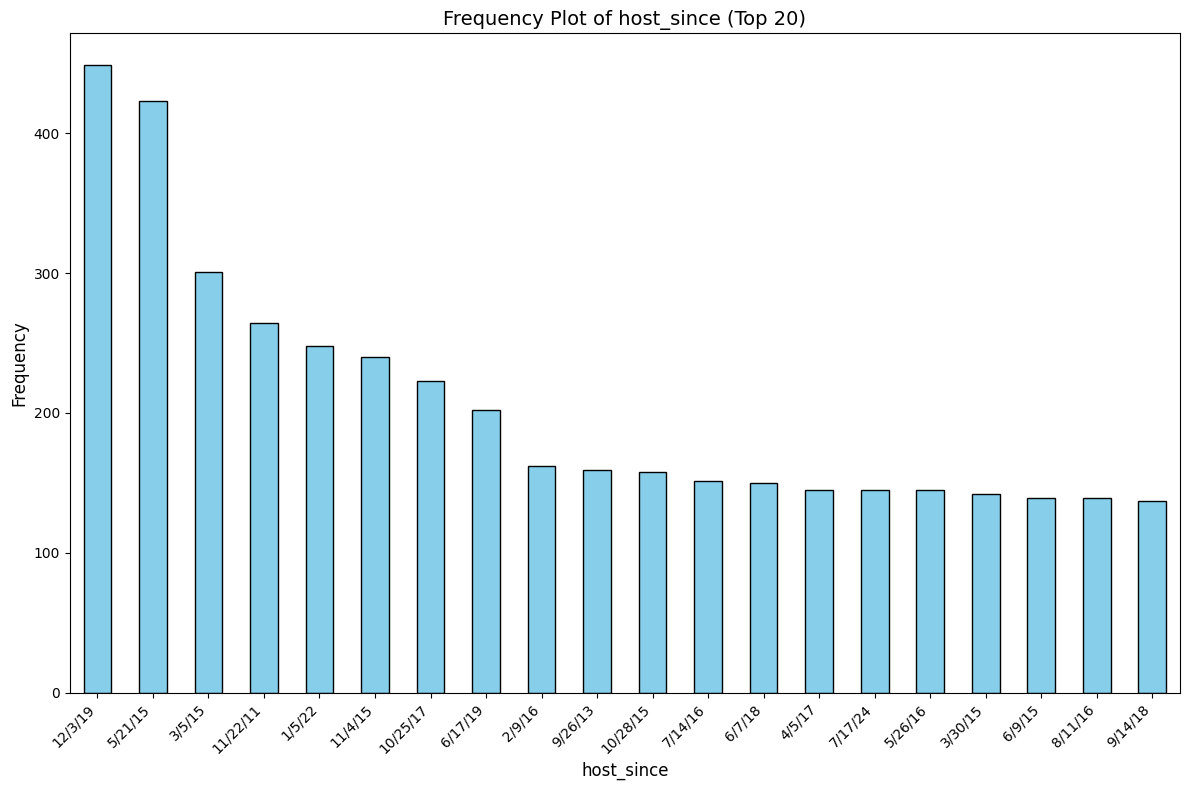

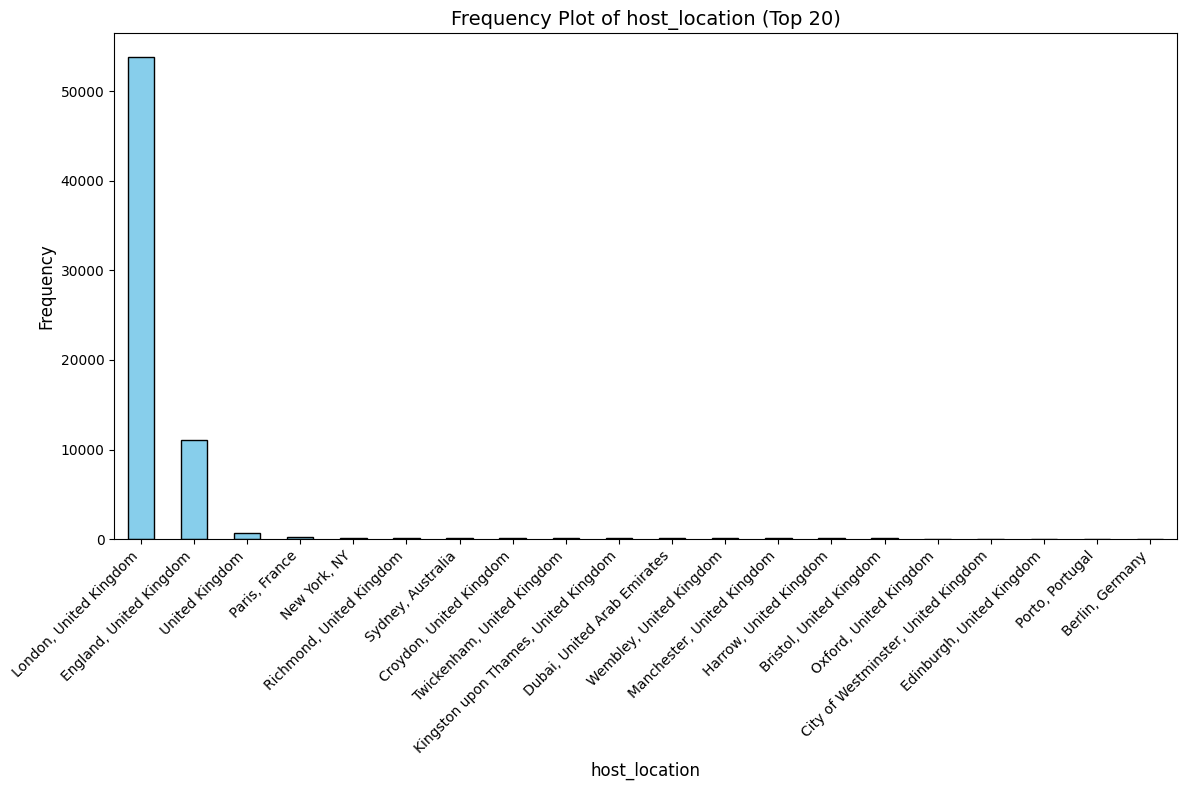

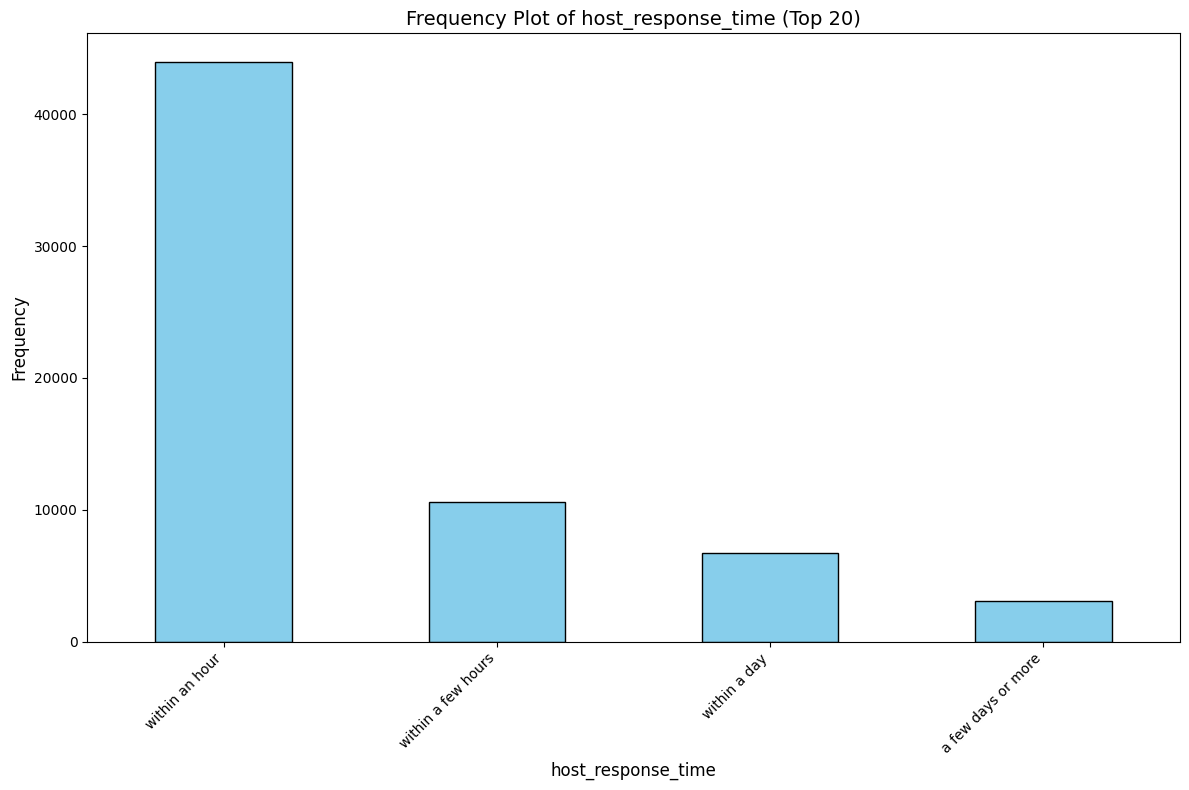

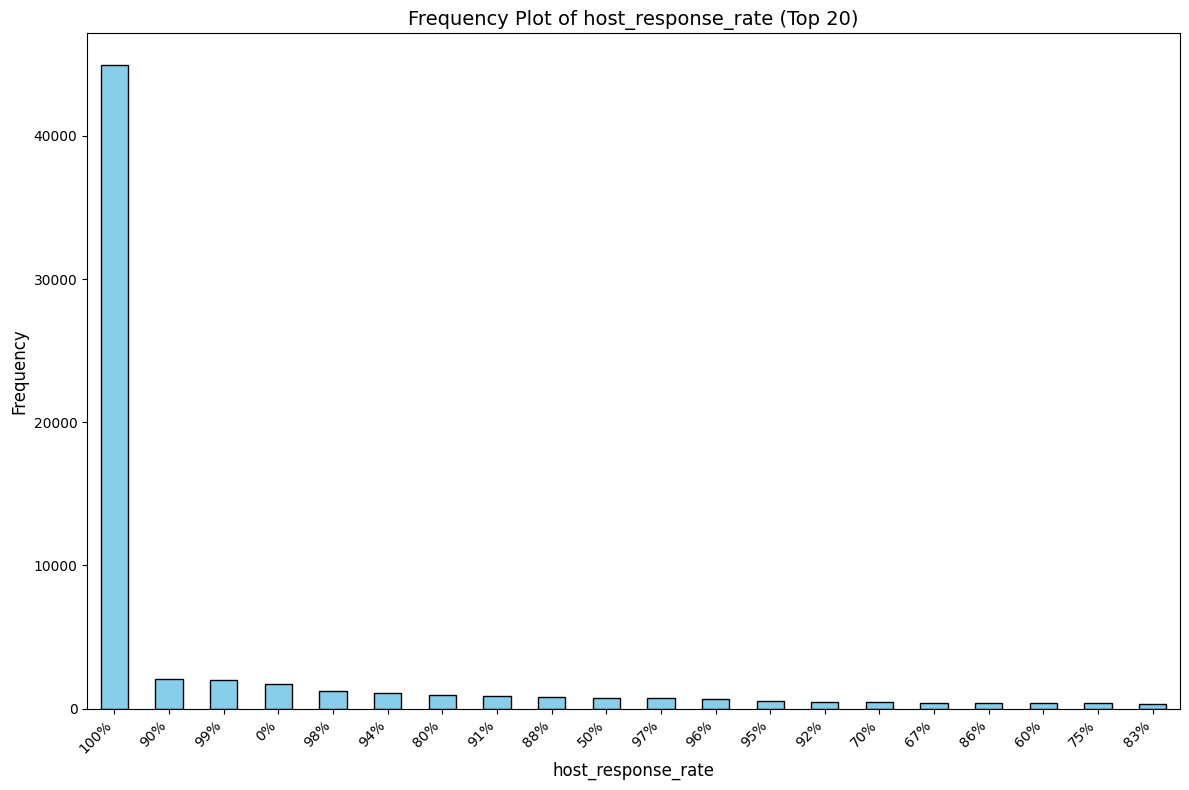

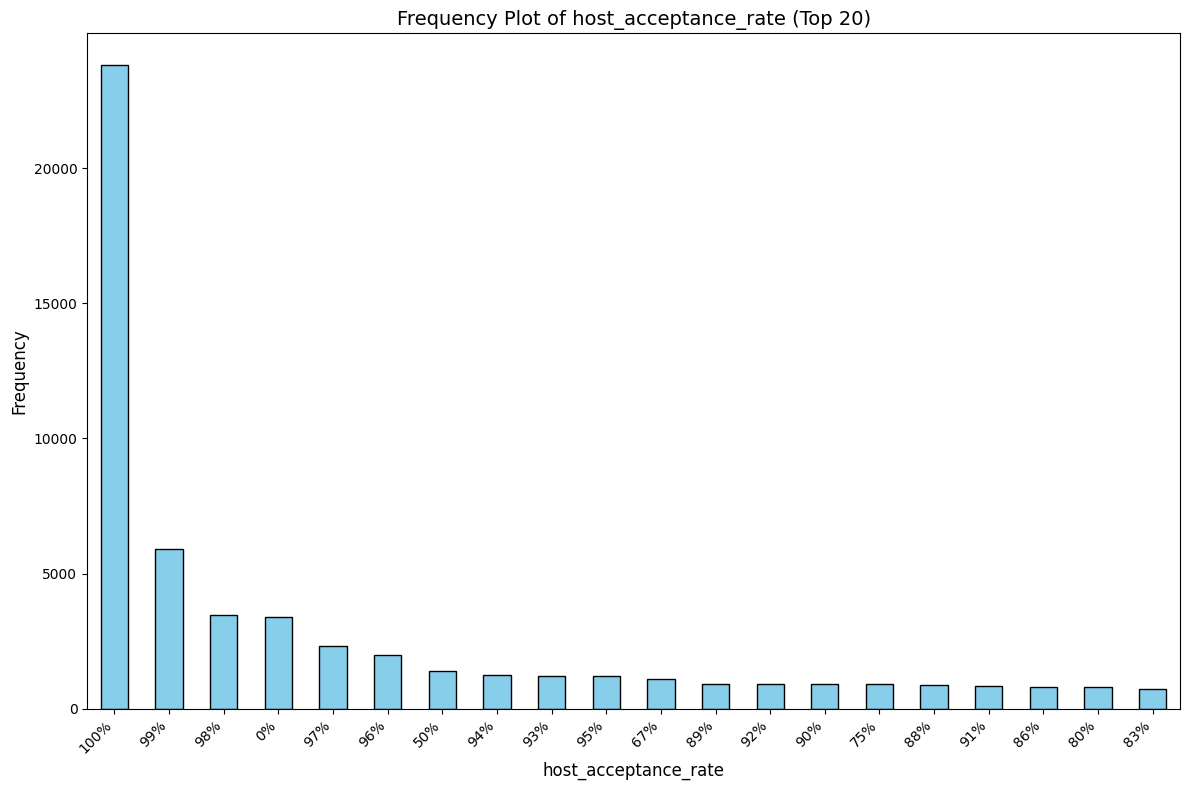

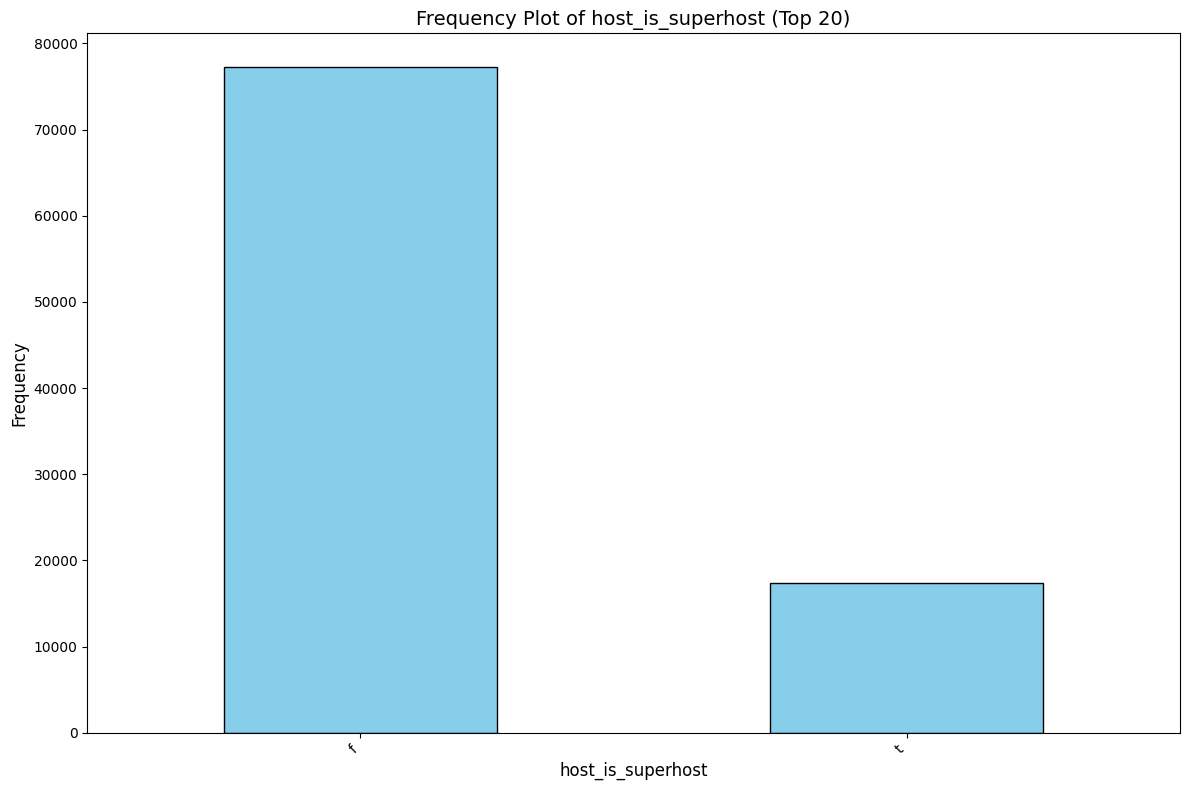

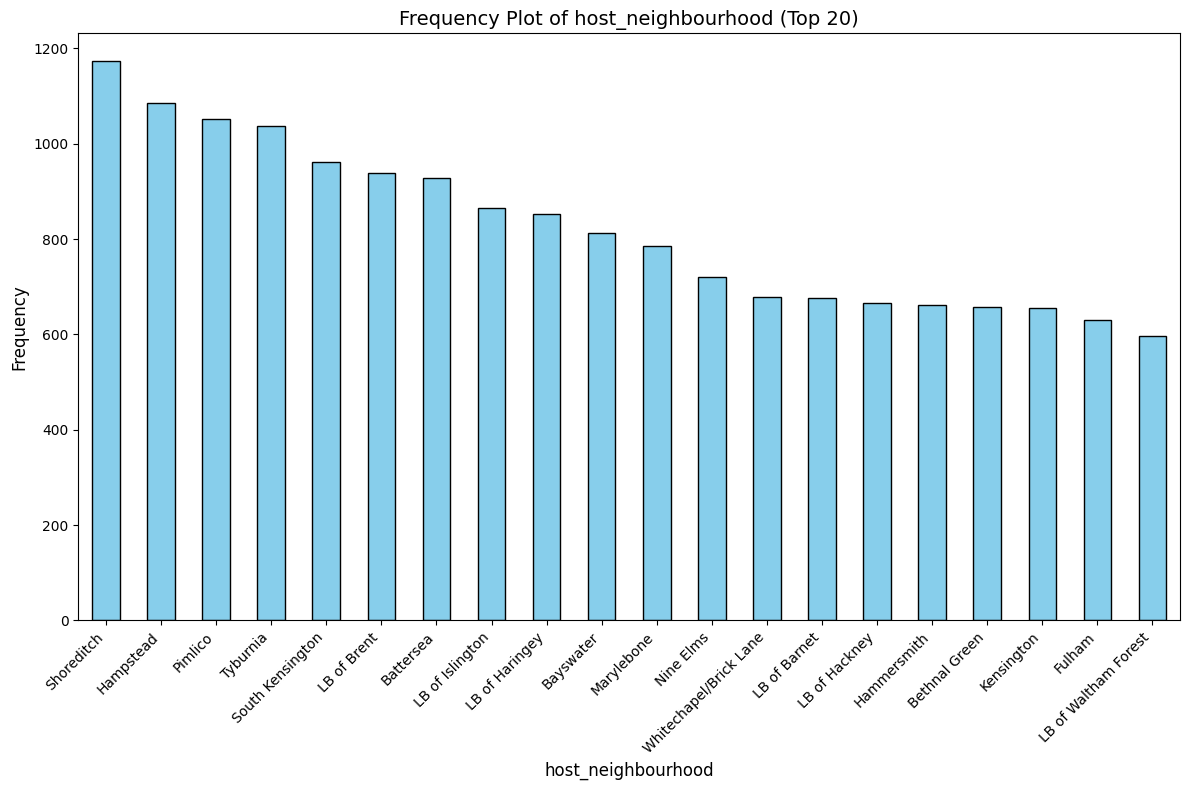

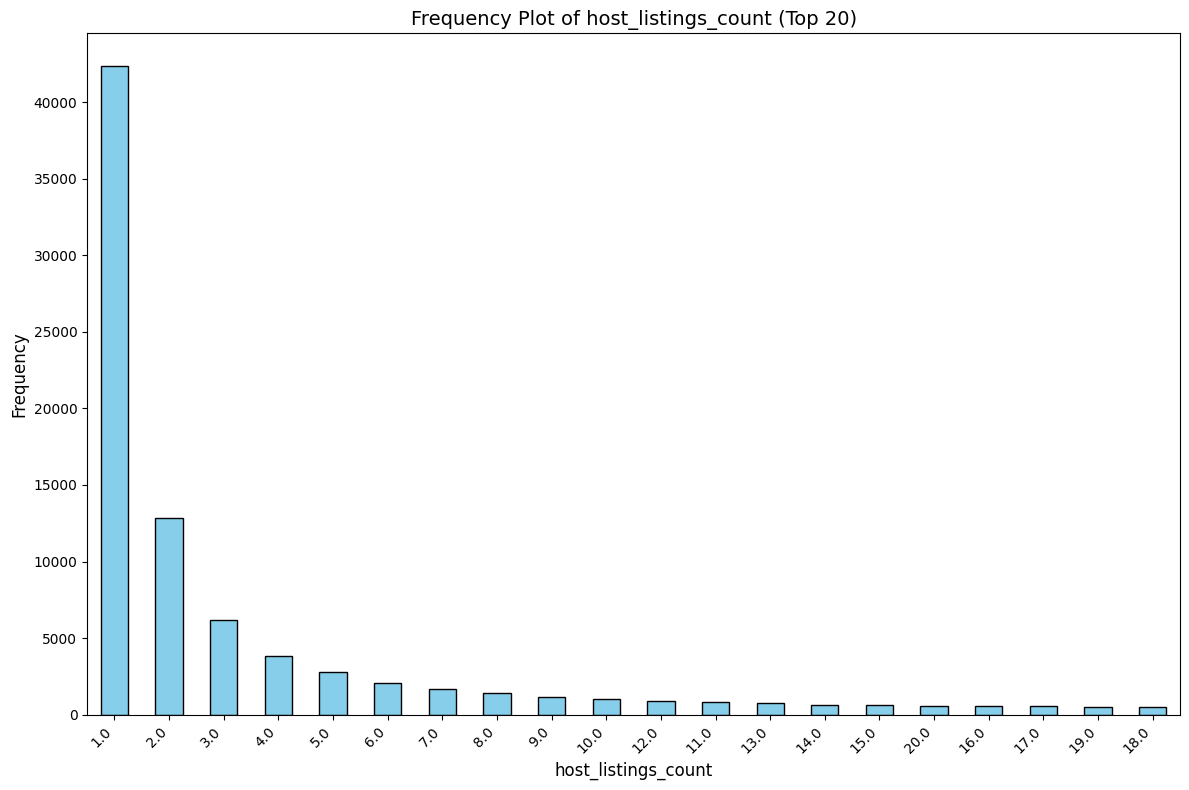

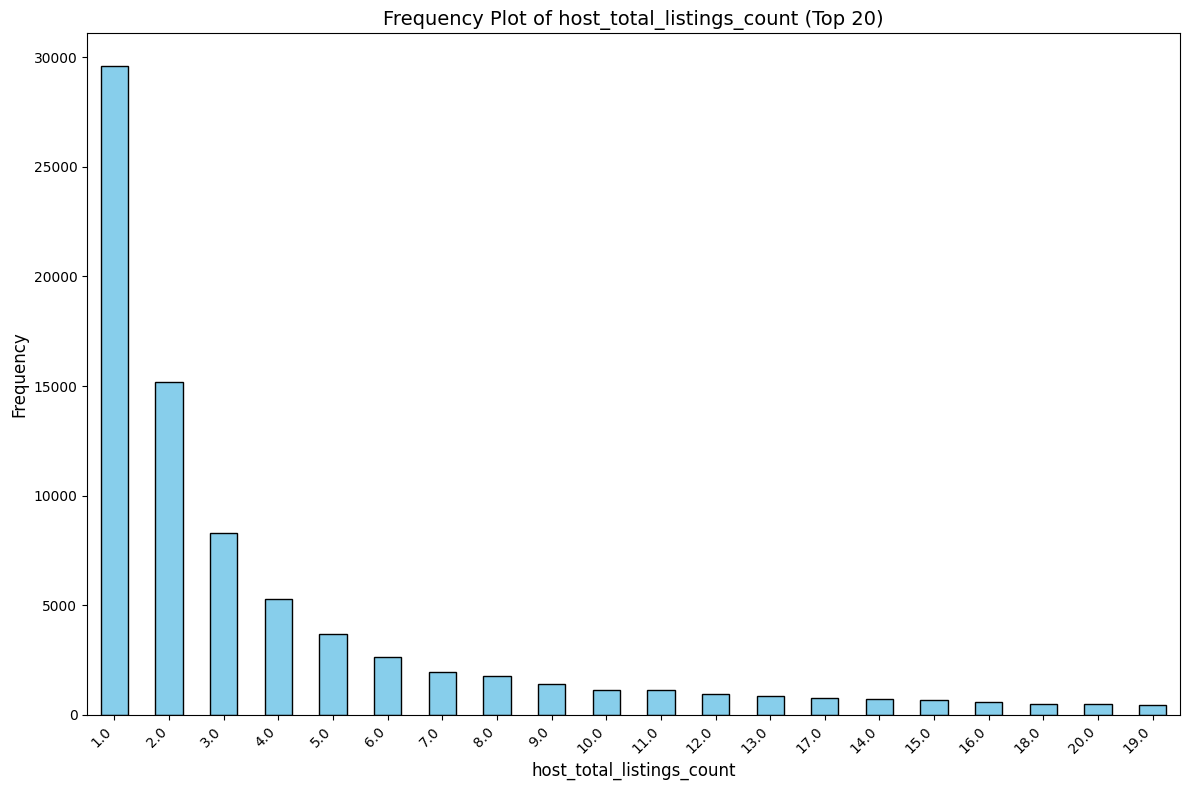

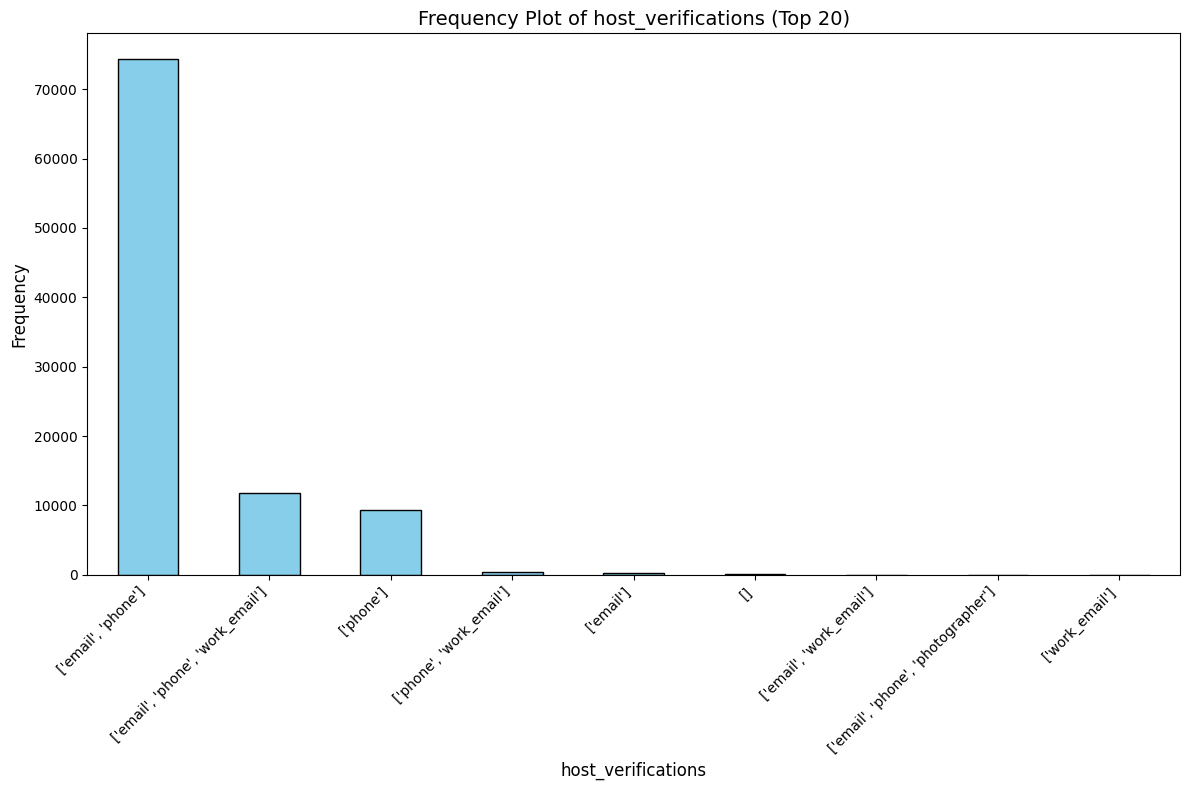

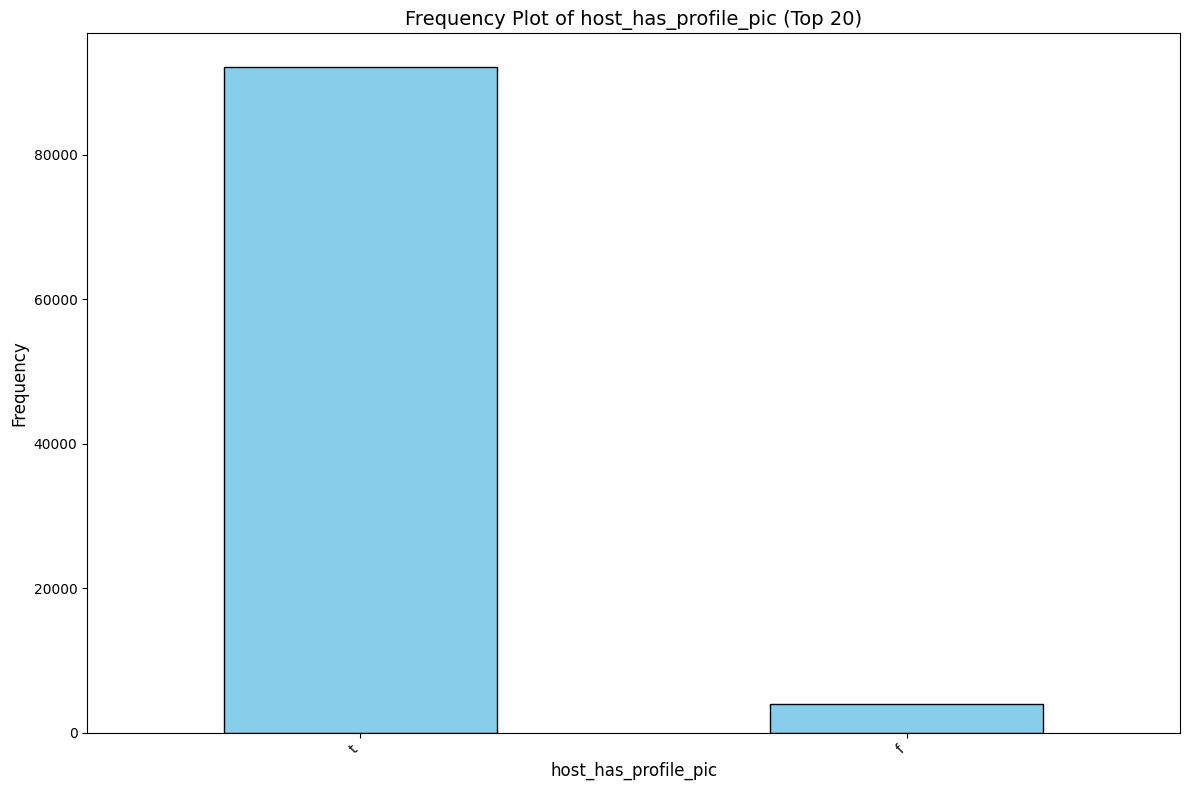

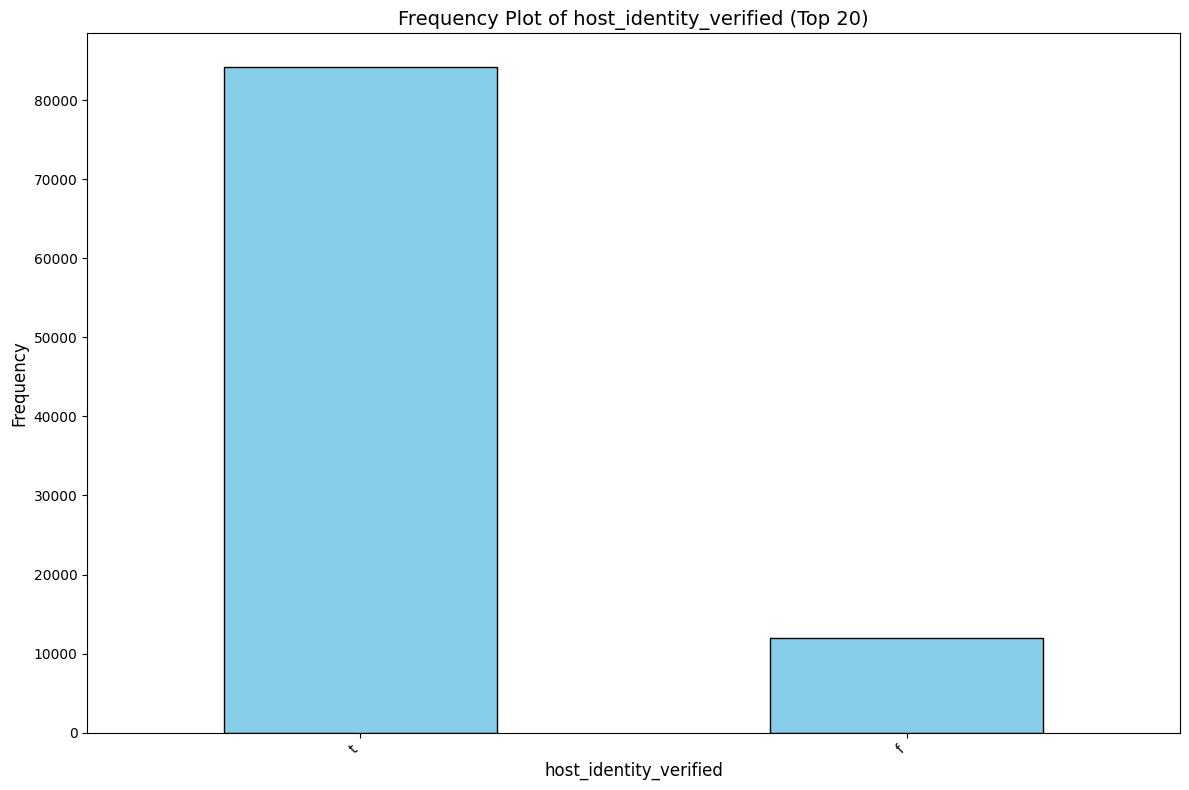

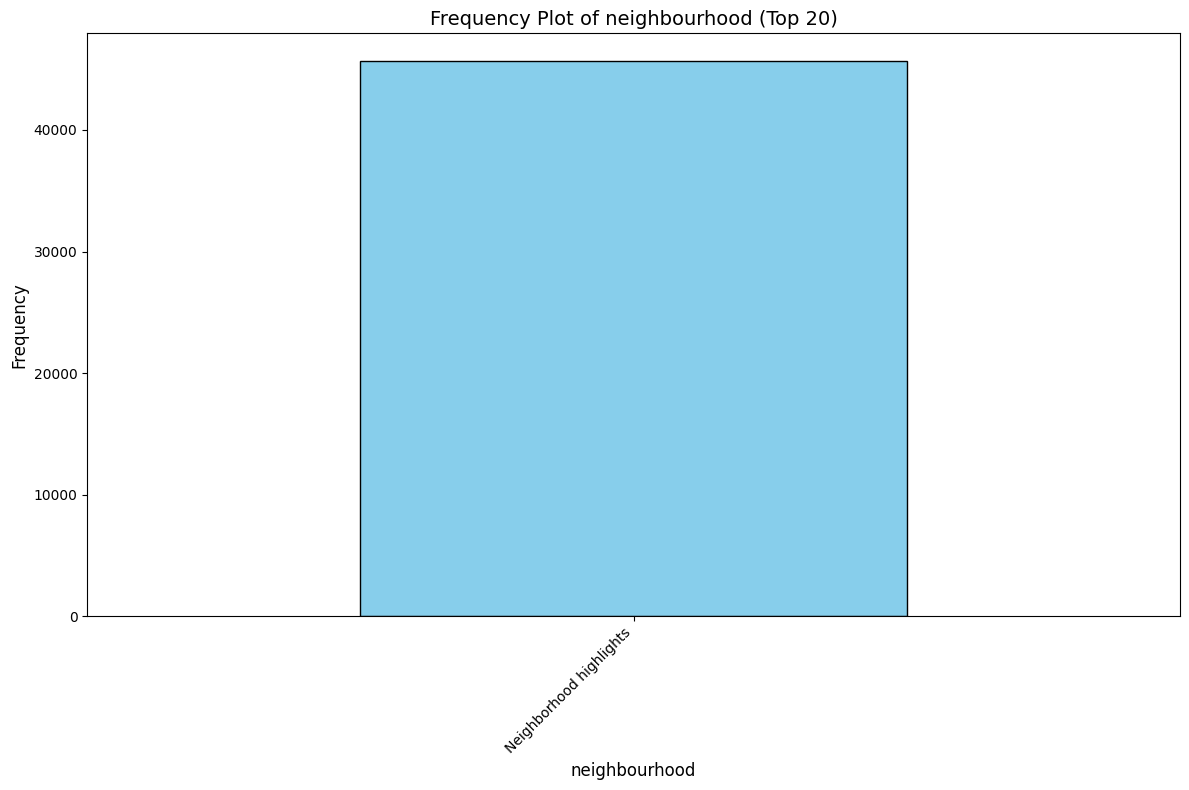

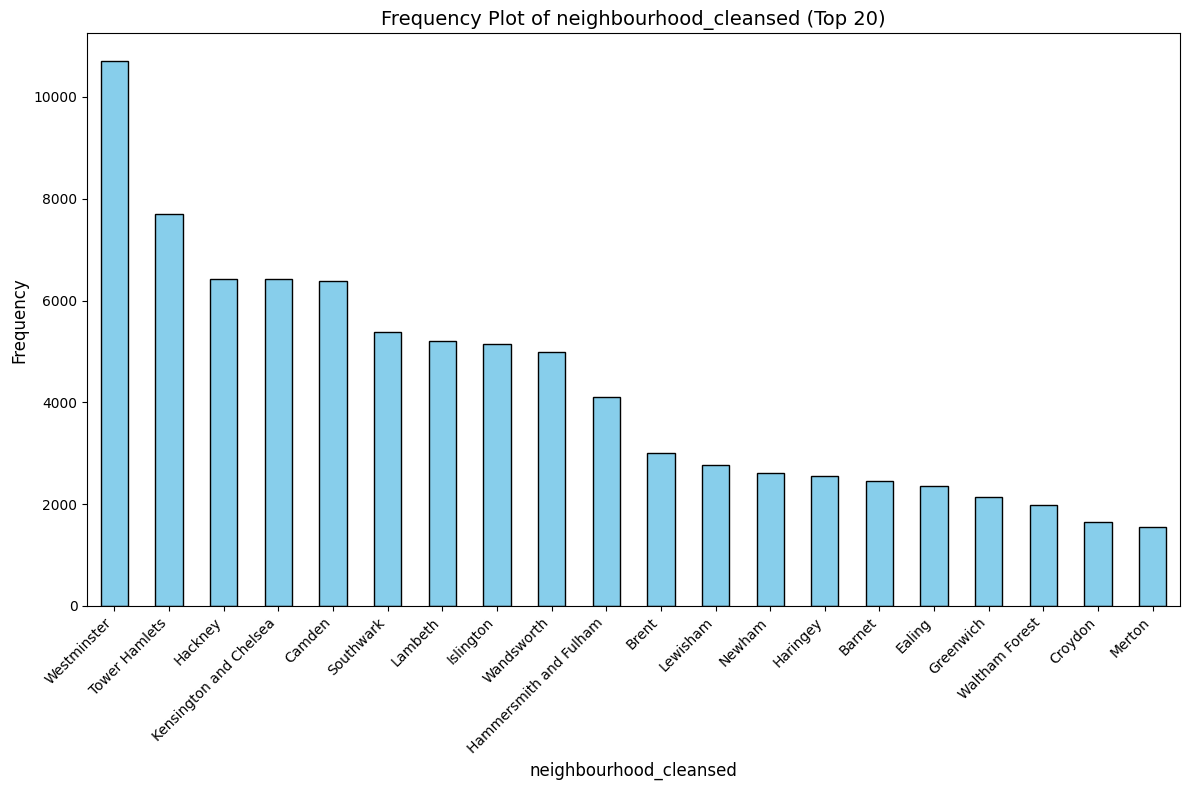

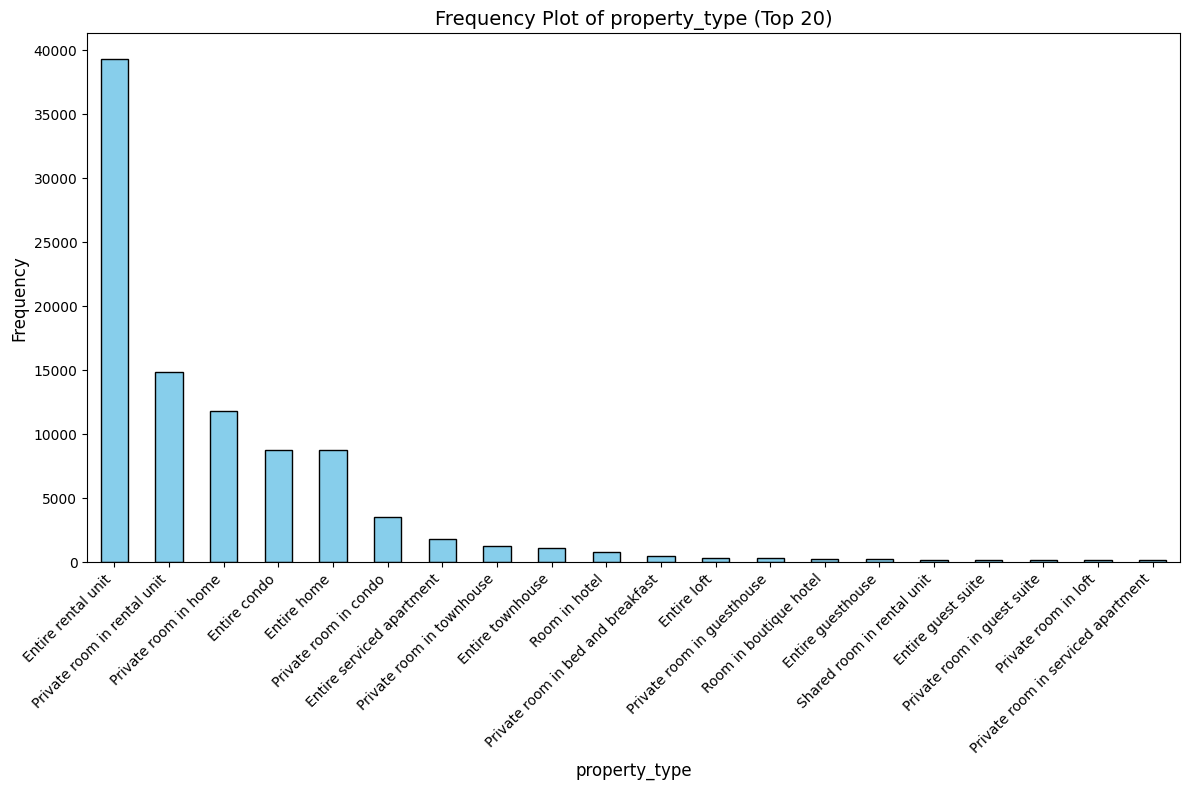

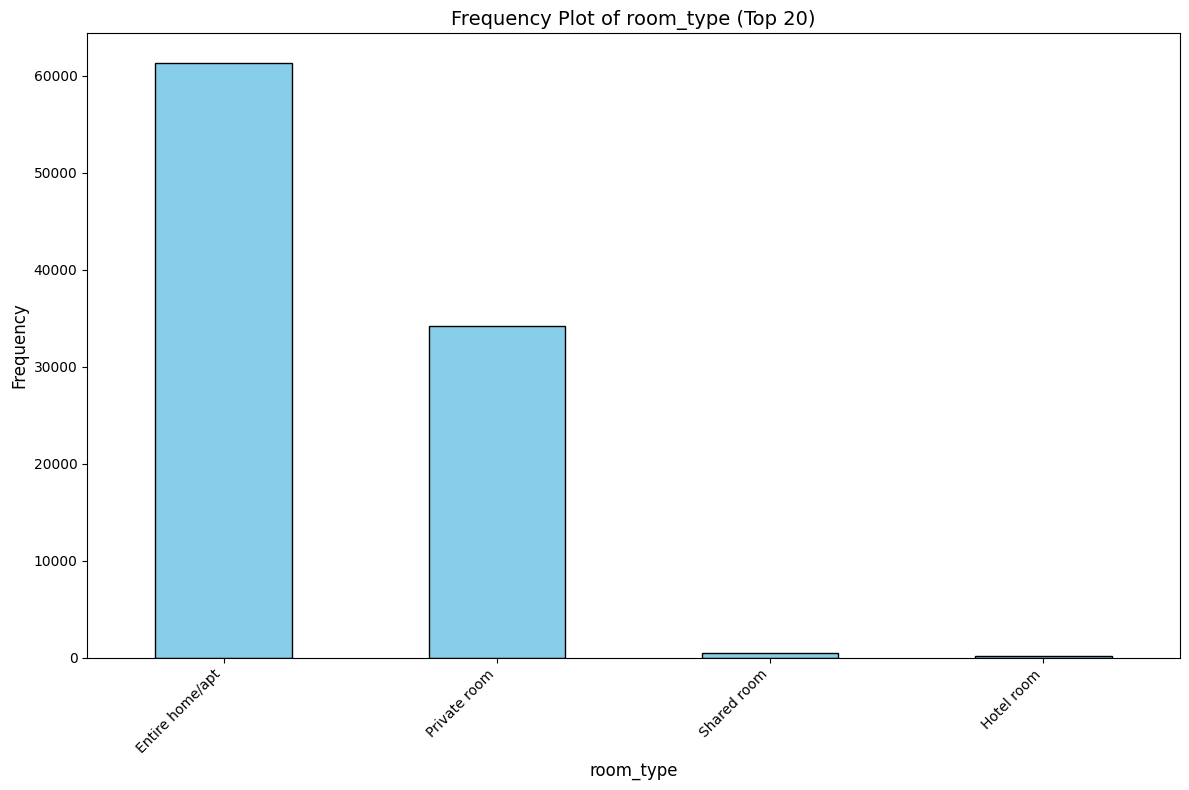

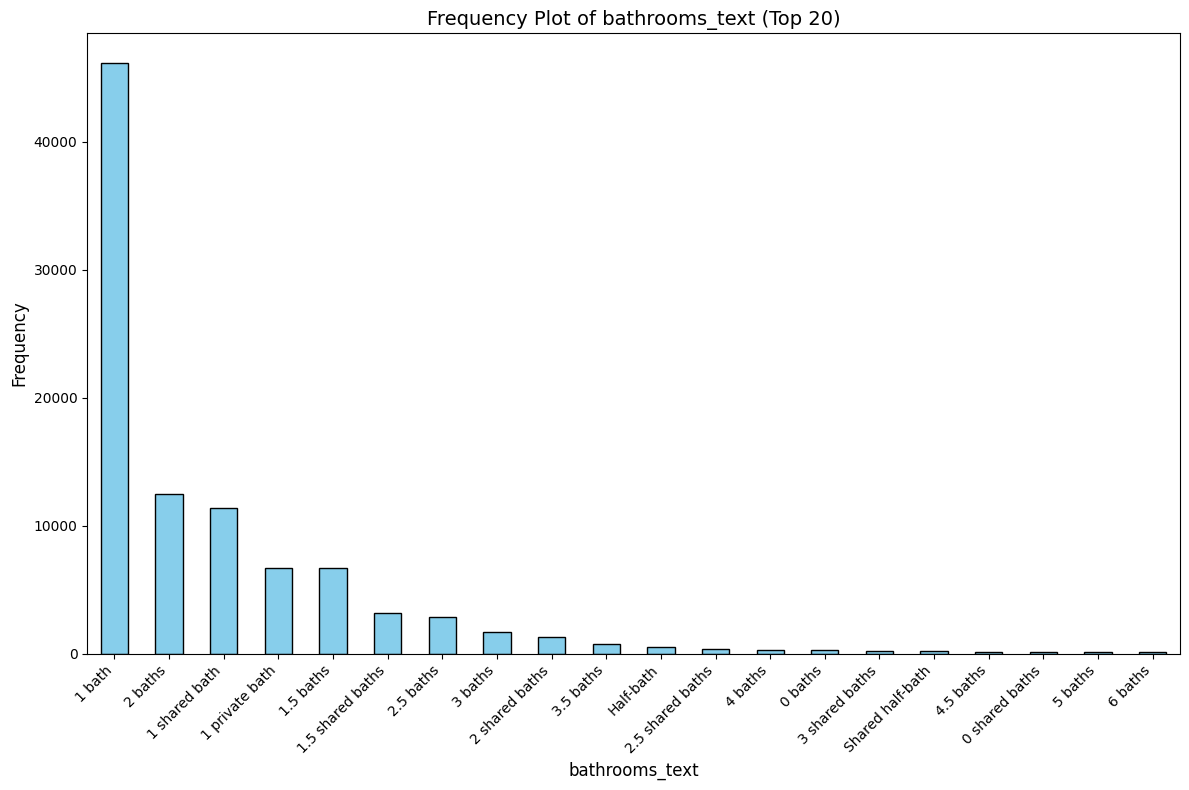

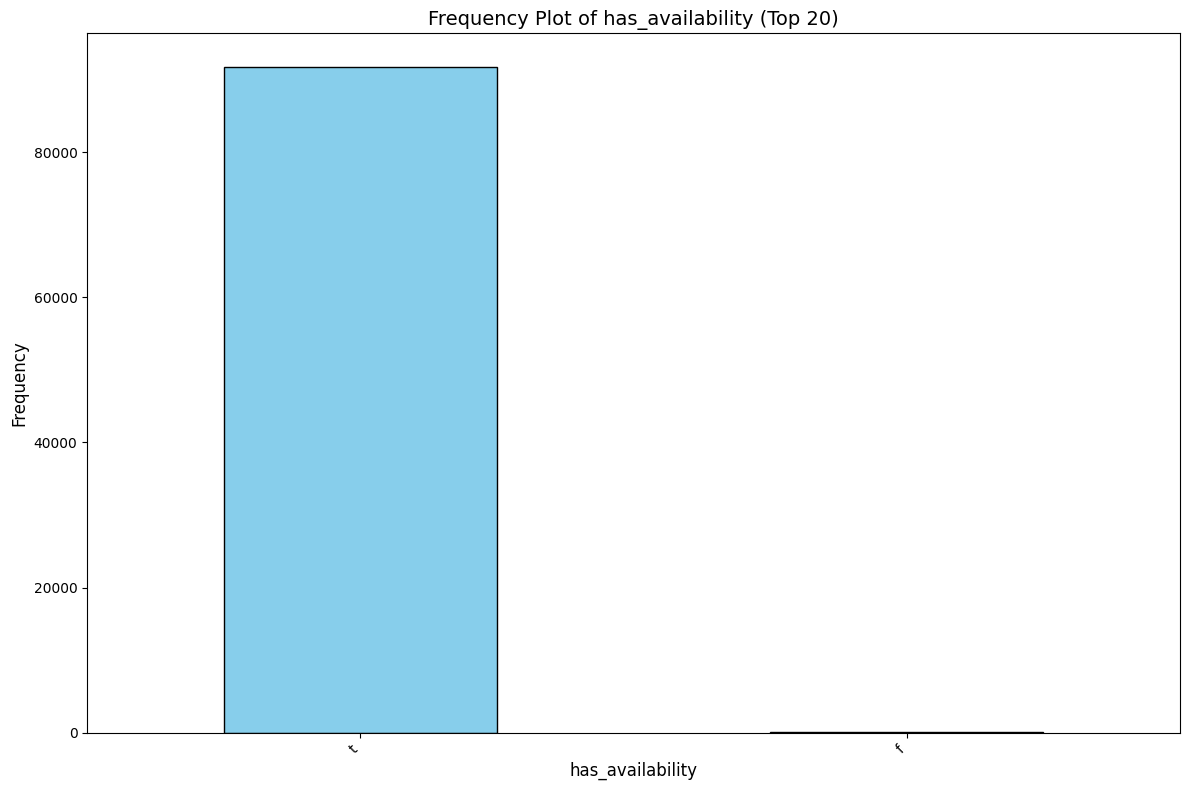

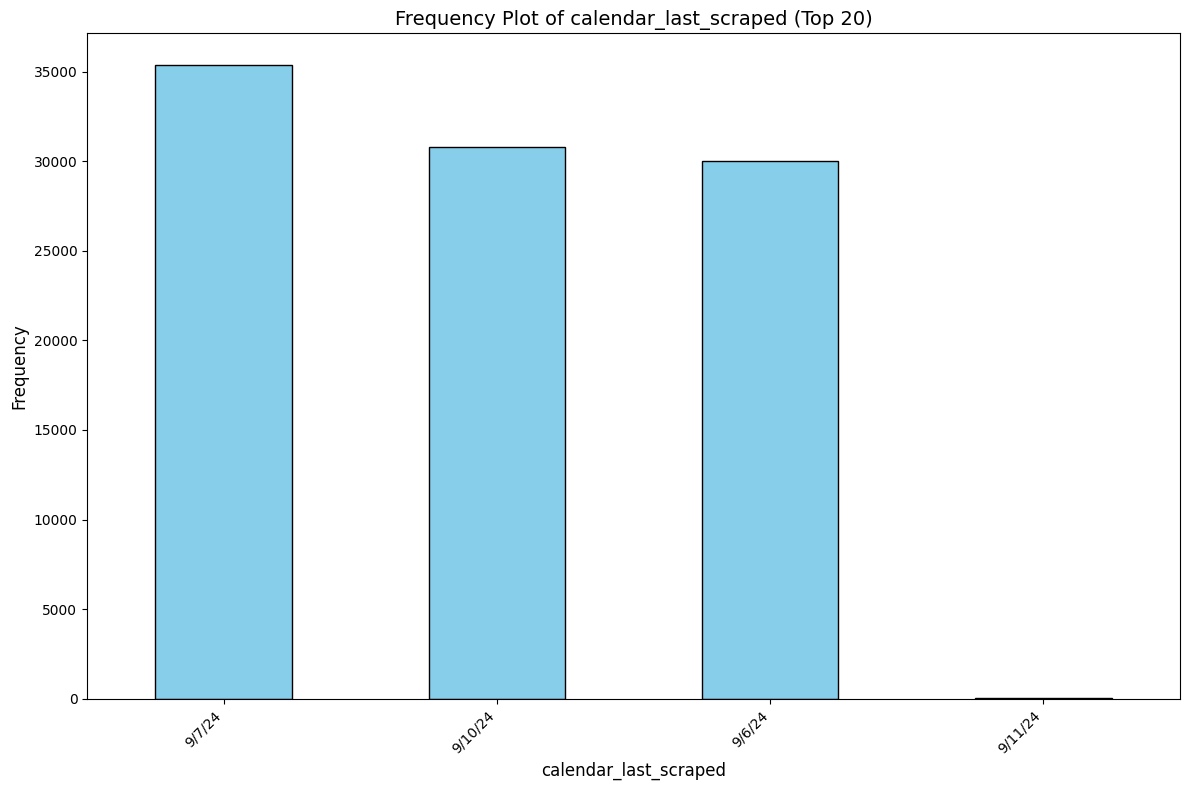

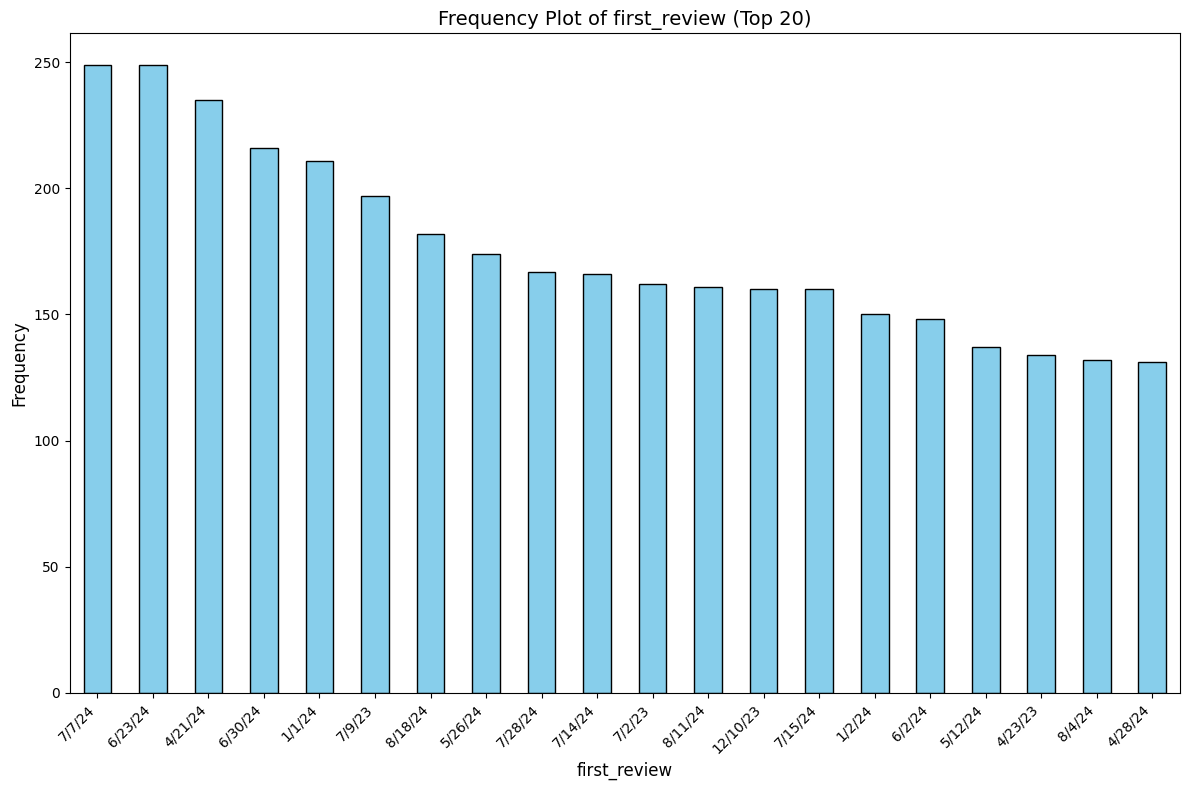

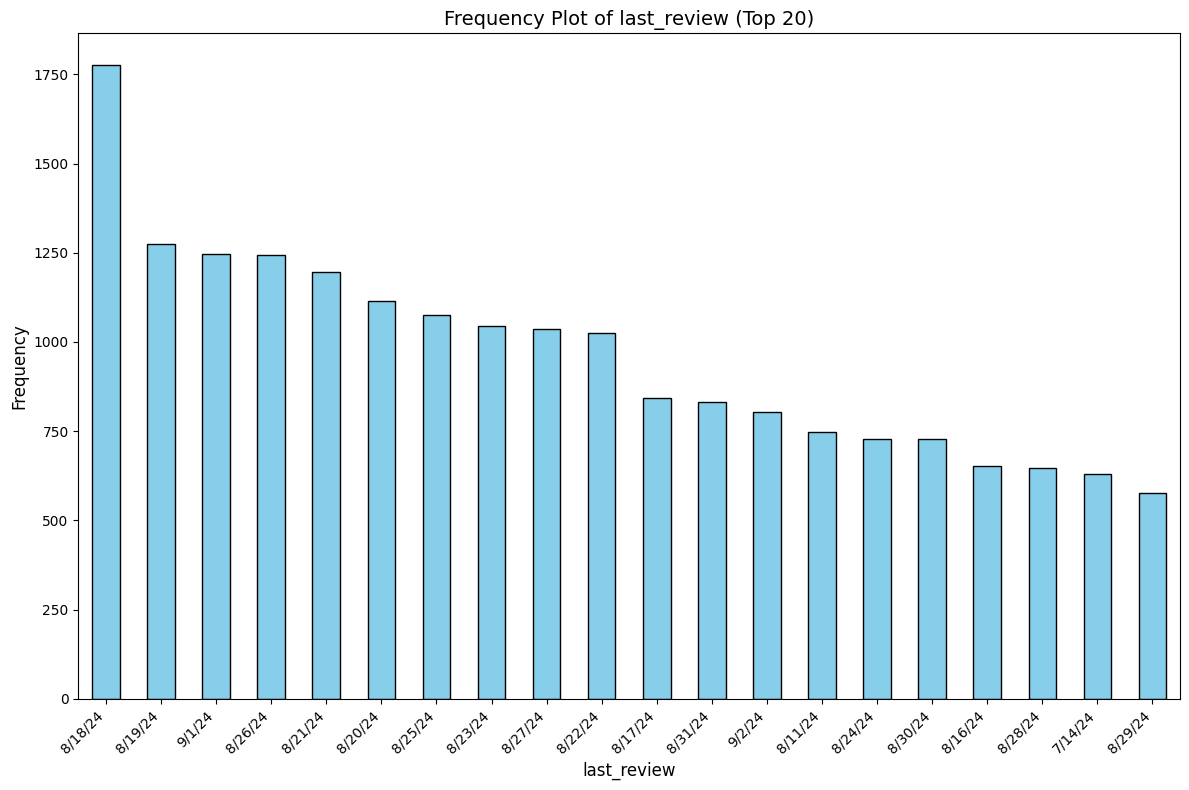

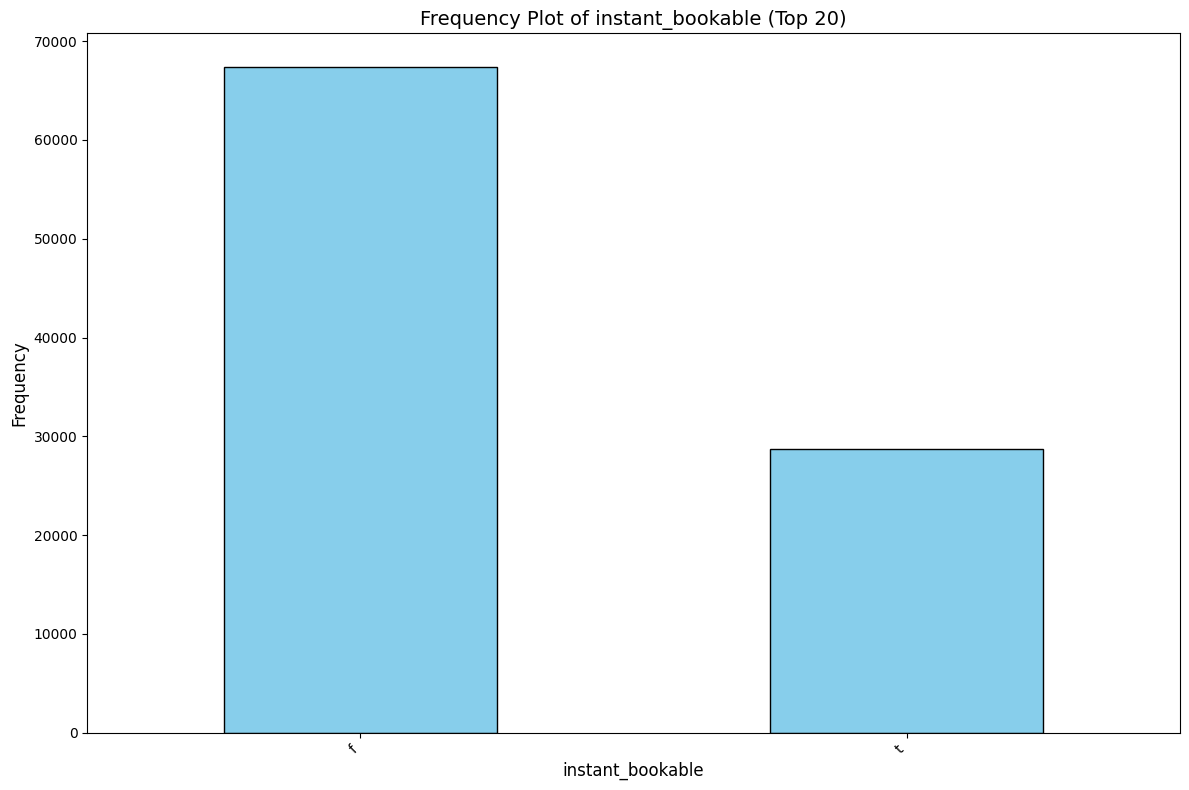

In [143]:
categorical_columns = airbnb_df.select_dtypes(include=['object', 'category']).columns
# Create frequency plots for each categorical column
for column in categorical_columns:
    if column not in ['description', 'neighborhood_overview','picture_url', 'host_about', 'amenities', 'host_thumbnail_url', 'host_picture_url' , 'host_url', 'listing_url', 'host_name', 'scrape_id']:
        # Limit the number of unique values displayed to 20 (for efficiency)
        top_values = airbnb_df[column].value_counts().nlargest(20)
        plt.figure(figsize=(12, 8))
        top_values.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Frequency Plot of {column} (Top 20)', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Explanations for Frequency Plots

- For this explanations we decided to focus on the most important boxplots for our specific target which is price.

Frequency plot for host response time:
- The majority of hosts respond "within an hour", dominating the chart with over 45,000 entries.
- A significantly smaller portion of hosts respond "within a few hours" (~10,000 entries) or "within a day" (~8,000 entries).
- Only a very small fraction of hosts respond "a few days or more" (~4,000 entries).
- This indicates mosts hosts are highly responsive.
- Slow response times may negatively impact booking rates and overall host performance metrics.

Frequency plot for host neighbourhood:
- The top 20 neighborhoods show a relatively even spread, with Shoreditch leading at ~1,200 entries.
- Other high-frequency neighborhoods include Hampstead, Pimlico, Tyburnia, and South Kensington, all exceeding 1,000 listings.
- The frequencies gradually decline across the remaining neighborhoods, with the lowest being LB of Waltham Forest.
- Shoreditch and South Kensington likely have high demand, given the concentration of listings.

Frequency plot for property type:
- "Entire rental unit" is by far the most common property type, with nearly 40,000 listings.
- The next most common options, "Private room in rental unit" and "Private room in home", have frequencies around 15,000 and 12,000, respectively.
- Other property types such as "Entire condo" and "Entire home" follow but at much lower levels (~10,000 entries).
- Property types like "Private room in serviced apartment" and "Shared room" have extremely low frequencies, almost negligible.


# Bivariate Analysis

In [144]:
numerical_df = airbnb_df.select_dtypes(include=['number'])

numerical_df = pd.DataFrame(numerical_df)
numerical_df.head()

id  host_id  latitude  longitude  accommodates  bathrooms  bedrooms  \
0  13913.0    54730  51.56861   -0.11270             1        1.0       1.0   
1  15400.0    60302  51.48780   -0.16813             2        1.0       1.0   
2  17402.0    67564  51.52195   -0.14094             6        2.0       3.0   
3  24328.0    41759  51.47072   -0.16266             4        1.5       1.0   
4  33332.0   144444  51.46410   -0.32498             2        1.0       1.0   

   beds  price  minimum_nights  ...  review_scores_cleanliness  \
0   1.0   59.0               1  ...                       4.74   
1   1.0  120.0               4  ...                       4.88   
2   3.0  493.0               3  ...                       4.72   
3   1.0  190.0               2  ...                       4.91   
4   1.0  140.0               2  ...                       4.56   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.77                         4.84                    4.72   
1                   4.88                         4.84                    4.93   
2                   4.72                         4.72                    4.89   
3                   4.90                         4.93                    4.59   
4                   4.56                         4.50                    4.67   

   review_scores_value  calculated_host_listings_count  \
0                 4.72                               3   
1                 4.75                               1   
2                 4.61                               6   
3                 4.65                               1   
4                 4.22                               2   

   calculated_host_listings_count_entire_homes  \
0                                            2   
1                                            1   
2                                            6   
3                                            1   
4                                            0   

   calculated_host_listings_count_private_rooms  \
0                                             1   
1                                             0   
2                                             0   
3                                             0   
4                                             2   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0               0.26  
1                                            0               0.54  
2                                            0               0.34  
3                                            0               0.56  
4                                            0               0.11  

[5 rows x 36 columns]

In [145]:
cols_to_drop = ['numerical_id', 'scrape_id', 'host_id', 'neighbourhood_group_cleansed', 'license','id','calendar_updated']
numerical_df = numerical_df.drop(columns=cols_to_drop, errors='ignore')
numerical_df = numerical_df.select_dtypes(include=['number'])
numerical_df = pd.DataFrame(numerical_df)
numerical_df.head()

latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
0  51.56861   -0.11270             1        1.0       1.0   1.0   59.0   
1  51.48780   -0.16813             2        1.0       1.0   1.0  120.0   
2  51.52195   -0.14094             6        2.0       3.0   3.0  493.0   
3  51.47072   -0.16266             4        1.5       1.0   1.0  190.0   
4  51.46410   -0.32498             2        1.0       1.0   1.0  140.0   

   minimum_nights  maximum_nights  minimum_minimum_nights  ...  \
0               1              29                     1.0  ...   
1               4              30                     4.0  ...   
2               3             365                     3.0  ...   
3               2            1125                     2.0  ...   
4               2              21                     2.0  ...   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.74                   4.77   
1                       4.88                   4.88   
2                       4.72                   4.72   
3                       4.91                   4.90   
4                       4.56                   4.56   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.84                    4.72                 4.72   
1                         4.84                    4.93                 4.75   
2                         4.72                    4.89                 4.61   
3                         4.93                    4.59                 4.65   
4                         4.50                    4.67                 4.22   

   calculated_host_listings_count  \
0                               3   
1                               1   
2                               6   
3                               1   
4                               2   

   calculated_host_listings_count_entire_homes  \
0                                            2   
1                                            1   
2                                            6   
3                                            1   
4                                            0   

   calculated_host_listings_count_private_rooms  \
0                                             1   
1                                             0   
2                                             0   
3                                             0   
4                                             2   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0               0.26  
1                                            0               0.54  
2                                            0               0.34  
3                                            0               0.56  
4                                            0               0.11  

[5 rows x 34 columns]

Top 5 correlations

- maximum_nights_avg_ntm, maximum_maximum_nights  0.999999
- calculated_host_listings_count_entire_homes calculated_host_listings_count    0.986943
- availability_90, availability_60 0.978917
- host_total_listings_count, host_listings_count 0.955175
- availability_30, availability_60  0.948243

Bottom 5 correlations:
- calculated_host_listings_count, review_scores_value  -0.166184
- review_scores_value, availability_30  -0.155833
- review_scores_value, availability_60  -0.153428
- review_scores_value, calculated_host_listings_count_entire_homes   -0.150927
- review_scores_accuracy, availability_30    -0.150611

In [146]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96182 entries, 0 to 96181
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   latitude                                      96182 non-null  float64
 1   longitude                                     96182 non-null  float64
 2   accommodates                                  96182 non-null  int64  
 3   bathrooms                                     63145 non-null  float64
 4   bedrooms                                      83530 non-null  float64
 5   beds                                          63041 non-null  float64
 6   price                                         63205 non-null  float64
 7   minimum_nights                                96182 non-null  int64  
 8   maximum_nights                                96182 non-null  int64  
 9   minimum_minimum_nights                        96181 non-null 

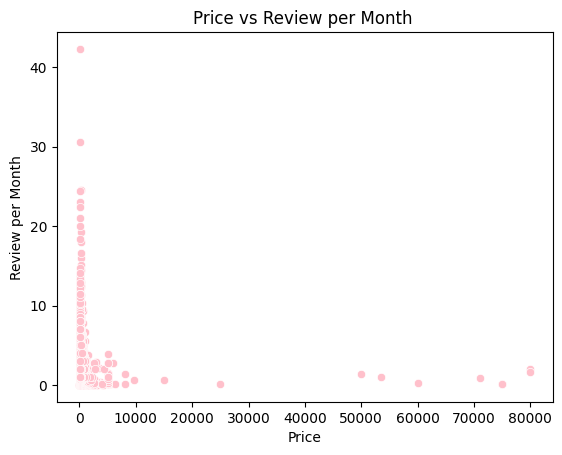

In [147]:
import seaborn as sns
sns.scatterplot(x='price', y='reviews_per_month', data=numerical_df, color='pink')
plt.xlabel('Price')
plt.ylabel('Review per Month')
plt.title('Price vs Review per Month ')
plt.show()

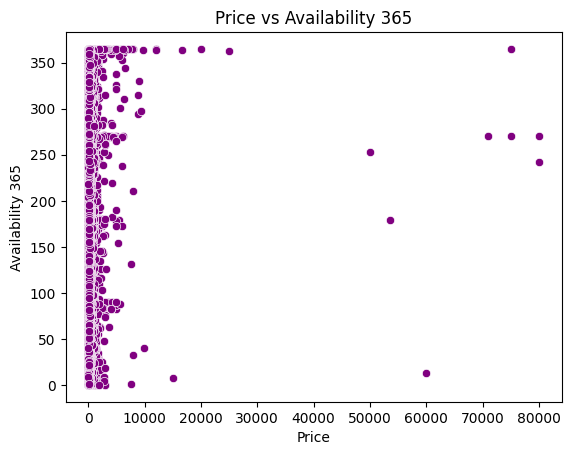

In [148]:
sns.scatterplot(x='price', y='availability_365', data=numerical_df, color='purple')
plt.xlabel('Price')
plt.ylabel('Availability 365')
plt.title('Price vs Availability 365')
plt.show()

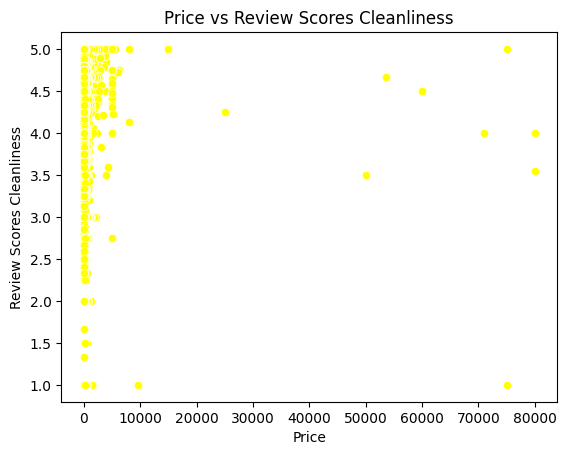

In [149]:

sns.scatterplot(x='price', y='review_scores_cleanliness', data=numerical_df, color='yellow')
plt.xlabel('Price')
plt.ylabel('Review Scores Cleanliness')
plt.title('Price vs Review Scores Cleanliness')
plt.show()

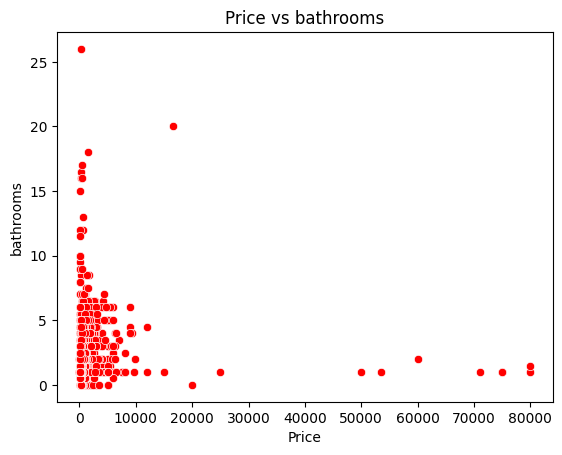

In [150]:
sns.scatterplot(x='price', y='bathrooms', data=numerical_df, color='red')
plt.xlabel('Price')
plt.ylabel('bathrooms')
plt.title('Price vs bathrooms')
plt.show()

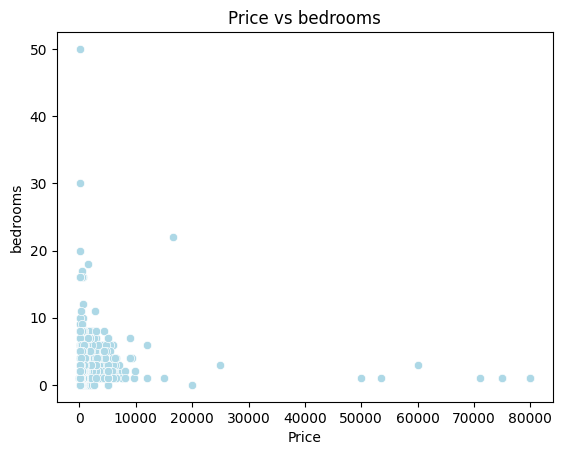

In [151]:
sns.scatterplot(x='price', y='bedrooms', data=numerical_df, color='lightblue')
plt.xlabel('Price')
plt.ylabel('bedrooms')
plt.title('Price vs bedrooms')
plt.show()

# Scatterplots explanations

- We decided to focus on price vs review per month & price vs availability because graphs outline the relationship between price and customer behavior, reviews, and the availability of listings, providing important insights into pricing strategies.

 1. Price vs Reviews per Month
 - Listings with more reviews in a month are usually priced lower and congregate below 10,000.
 - Listings prived over 40,000 receive very few reviews, suggesting a lower demand for the higher-priced items.


2. Price vs Availability
- The listings priced below 10,000 are mainly avaiable year-round, showing more availability.
- High priced listings exhibit limited availability, reflecting exclusivity or seasonal usage.





# Multivariate Analysis

In [152]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96182 entries, 0 to 96181
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   latitude                                      96182 non-null  float64
 1   longitude                                     96182 non-null  float64
 2   accommodates                                  96182 non-null  int64  
 3   bathrooms                                     63145 non-null  float64
 4   bedrooms                                      83530 non-null  float64
 5   beds                                          63041 non-null  float64
 6   price                                         63205 non-null  float64
 7   minimum_nights                                96182 non-null  int64  
 8   maximum_nights                                96182 non-null  int64  
 9   minimum_minimum_nights                        96181 non-null 

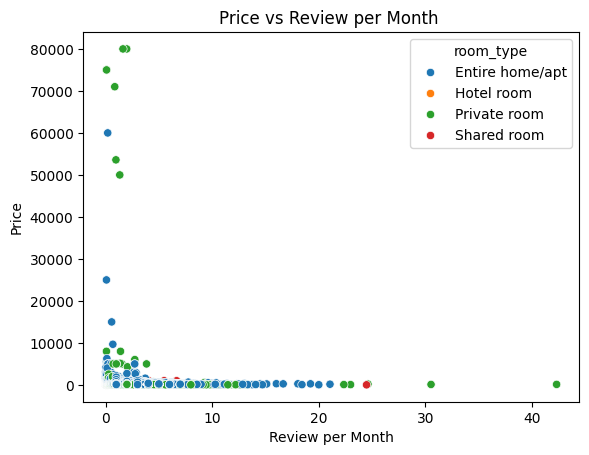

In [153]:
sns.scatterplot(x='reviews_per_month', y='price', hue= 'room_type', data=airbnb_df)
plt.xlabel('Review per Month')
plt.ylabel('Price')
plt.title('Price vs Review per Month ')
plt.show()

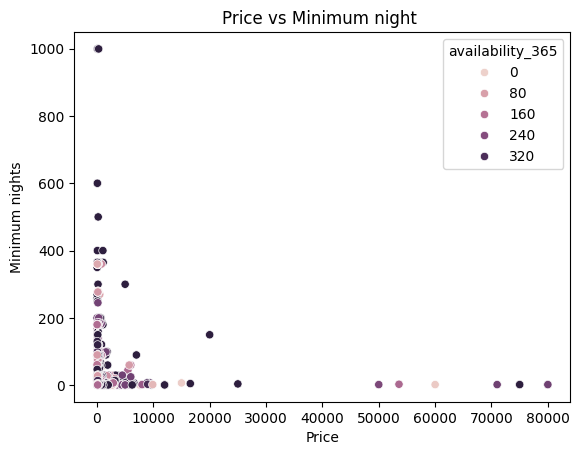

In [154]:
sns.scatterplot(x='price', y='minimum_nights',hue='availability_365', data=numerical_df)
plt.xlabel('Price')
plt.ylabel('Minimum nights')
plt.title('Price vs Minimum night ')
plt.show()

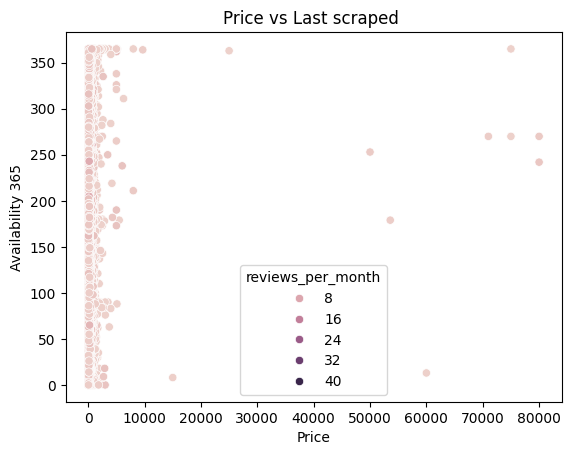

In [155]:
sns.scatterplot(x='price', y='availability_365',hue='reviews_per_month', data=numerical_df)
plt.xlabel('Price')
plt.ylabel('Availability 365')
plt.title('Price vs Last scraped ')
plt.show()

1. Price vs Reviews per Month
- Listings with lower prices, below 10,000 receive more reviews across room types, while entire homes/apartments are prominent; private rooms dominate at the high value.
- Affordable whole houses/apartments are the most in demand by customers, thereby driving engagement.

2. Price vs Minimum Nights
- Generally, lower-priced listings are below 10,000 and tend to have shorter minimum night stays. High-priced listings show more flexibility but are less frequent.
- Affordable properties offer shorter minimum night options, appealing to a wider audience.


# Modification


**This section outlines the initial steps to clean and modify the dataset, addressing inconsistencies, missing values, and irrelevant information.**

- Proper modifications ensure the dataset is structured and ready for analysis. Always document these changes to ensure reproducibility.
- Use visualization tools (e.g., histograms or scatterplots)during modifications to identify underlying patterns early.

In [156]:
numerical_df = numerical_df.dropna(subset=['price'])

In [157]:
numerical_df['price'].isnull().sum()

0

In [158]:
numerical_df = numerical_df.drop(columns=['beds','review_scores_value','host_listings_count','host_total_listings_count','maximum_maximum_nights','maximum_nights_avg_ntm','availability_60','availability_90','review_scores_rating','review _scores_cleanliness','review_scores_location','calculated_host_listings_count'], errors='ignore')
numerical_df.head()

latitude  longitude  accommodates  bathrooms  bedrooms  price  \
0  51.56861   -0.11270             1        1.0       1.0   59.0   
1  51.48780   -0.16813             2        1.0       1.0  120.0   
2  51.52195   -0.14094             6        2.0       3.0  493.0   
3  51.47072   -0.16266             4        1.5       1.0  190.0   
4  51.46410   -0.32498             2        1.0       1.0  140.0   

   minimum_nights  maximum_nights  minimum_minimum_nights  \
0               1              29                     1.0   
1               4              30                     4.0   
2               3             365                     3.0   
3               2            1125                     2.0   
4               2              21                     2.0   

   maximum_minimum_nights  ...  number_of_reviews_ltm  number_of_reviews_l30d  \
0                     1.0  ...                      4                       0   
1                     4.0  ...                      2                       0   
2                     3.0  ...                      2                       0   
3                     2.0  ...                      0                       0   
4                     2.0  ...                      0                       0   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.74                       4.74                   4.77   
1                    4.86                       4.88                   4.88   
2                    4.83                       4.72                   4.72   
3                    4.89                       4.91                   4.90   
4                    4.44                       4.56                   4.56   

   review_scores_communication  calculated_host_listings_count_entire_homes  \
0                         4.84                                            2   
1                         4.84                                            1   
2                         4.72                                            6   
3                         4.93                                            1   
4                         4.50                                            0   

   calculated_host_listings_count_private_rooms  \
0                                             1   
1                                             0   
2                                             0   
3                                             0   
4                                             2   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0               0.26  
1                                            0               0.54  
2                                            0               0.34  
3                                            0               0.56  
4                                            0               0.11  

[5 rows x 25 columns]

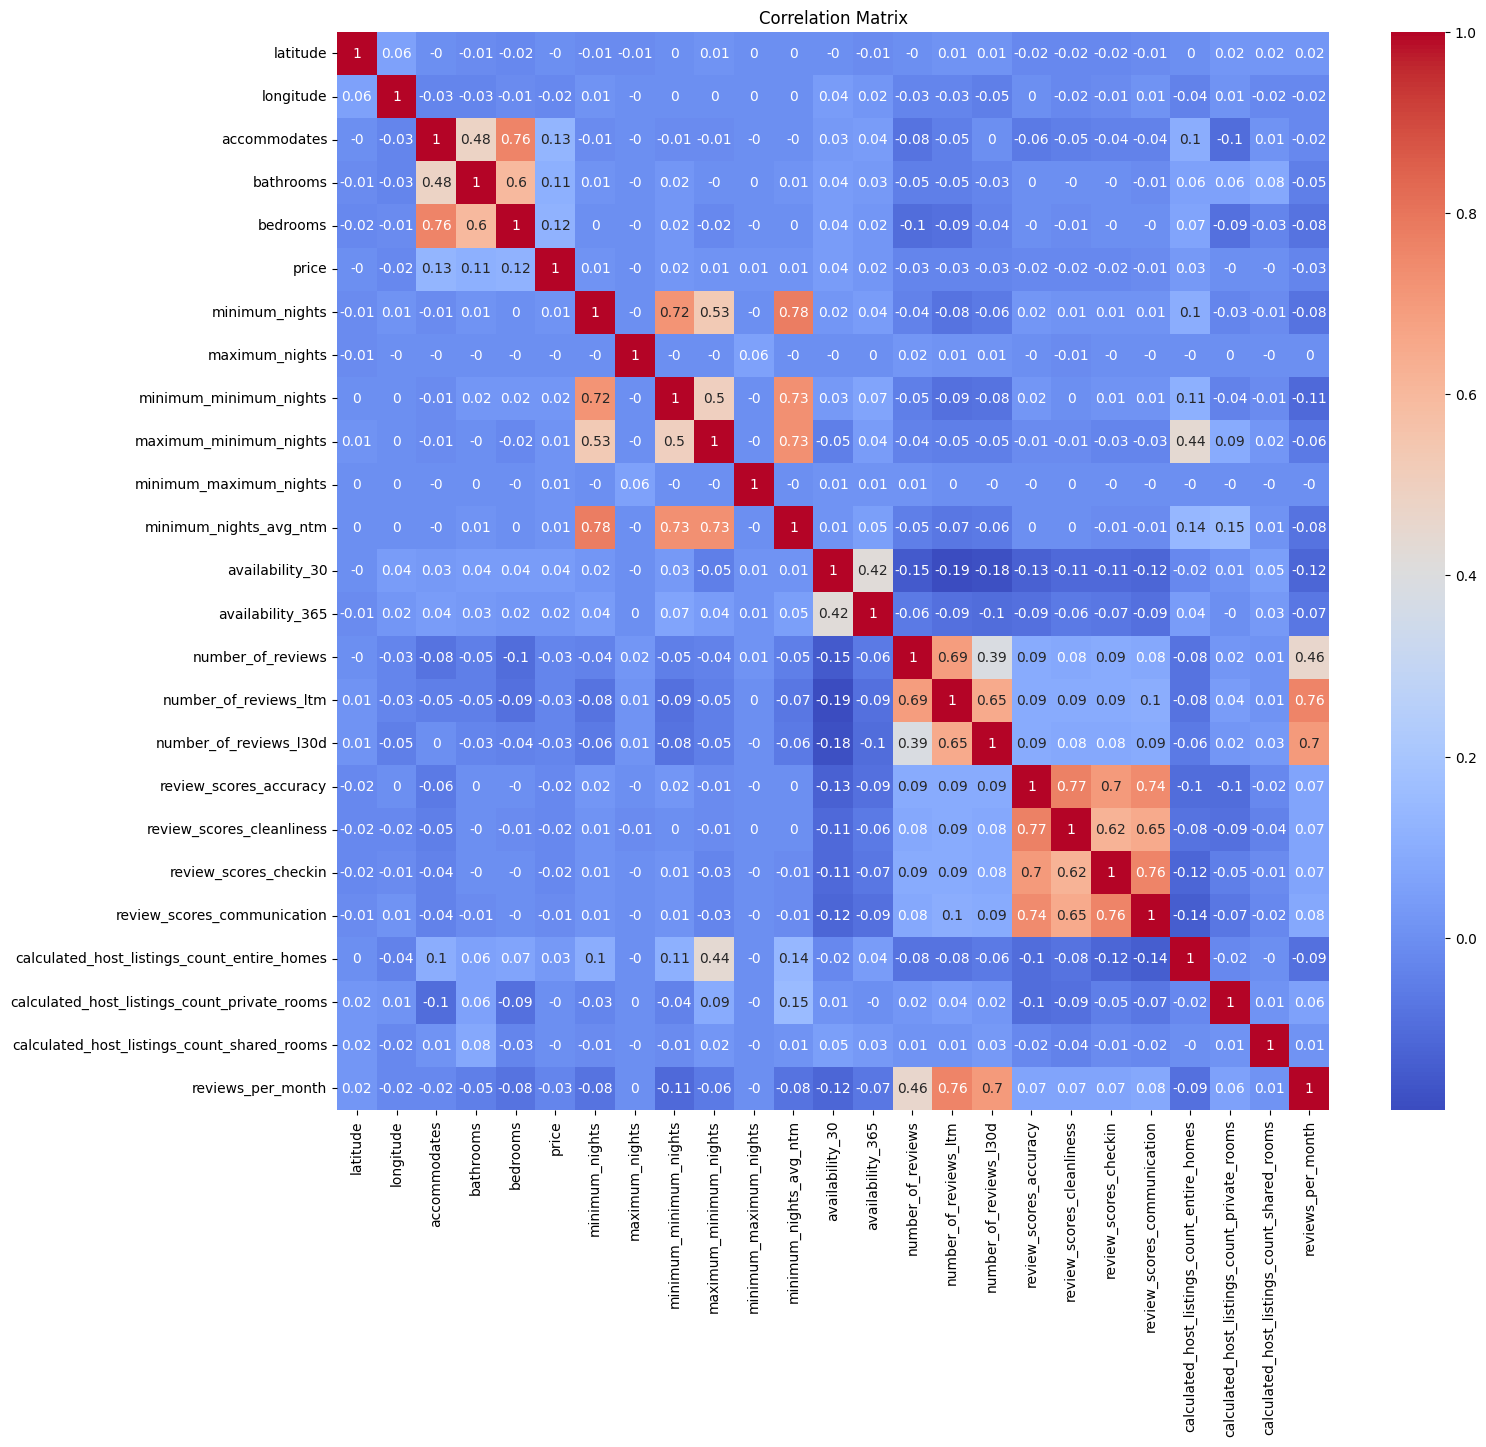

In [159]:
corr2 = numerical_df.corr().round(2)
plt.figure(figsize=(16, 14))
sns.heatmap(corr2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- No significant impact on price
- None of the variables in the dataset show a strong correlation with price.

- Strong Positive Correlation: Beds & Accommodates, Minimum_nights & Minimum_minimum_nights

- Moderate Correlation: Bathrooms & Accommodates

- Weak Correlations: latitude & longitude



## Missing Values

**Why It’s Done: Missing data can significantly affect the quality of analysis, so imputing or handling them is critical.**


- Use imputation methods like means, medians, or predictive models depending on the type of data and distribution.
- Document the missing data patterns (e.g., MAR, MCAR) for better justification of imputation methods.


In [160]:
airbnb_df = airbnb_df.drop(columns=['beds','review_scores_value','host_listings_count','host_total_listings_count','maximum_maximum_nights','maximum_nights_avg_ntm','availability_60','availability_90','review_scores_rating','review _scores_cleanliness','review_scores_location','calculated_host_listings_count'], errors='ignore')
numerical_df.head()

latitude  longitude  accommodates  bathrooms  bedrooms  price  \
0  51.56861   -0.11270             1        1.0       1.0   59.0   
1  51.48780   -0.16813             2        1.0       1.0  120.0   
2  51.52195   -0.14094             6        2.0       3.0  493.0   
3  51.47072   -0.16266             4        1.5       1.0  190.0   
4  51.46410   -0.32498             2        1.0       1.0  140.0   

   minimum_nights  maximum_nights  minimum_minimum_nights  \
0               1              29                     1.0   
1               4              30                     4.0   
2               3             365                     3.0   
3               2            1125                     2.0   
4               2              21                     2.0   

   maximum_minimum_nights  ...  number_of_reviews_ltm  number_of_reviews_l30d  \
0                     1.0  ...                      4                       0   
1                     4.0  ...                      2                       0   
2                     3.0  ...                      2                       0   
3                     2.0  ...                      0                       0   
4                     2.0  ...                      0                       0   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.74                       4.74                   4.77   
1                    4.86                       4.88                   4.88   
2                    4.83                       4.72                   4.72   
3                    4.89                       4.91                   4.90   
4                    4.44                       4.56                   4.56   

   review_scores_communication  calculated_host_listings_count_entire_homes  \
0                         4.84                                            2   
1                         4.84                                            1   
2                         4.72                                            6   
3                         4.93                                            1   
4                         4.50                                            0   

   calculated_host_listings_count_private_rooms  \
0                                             1   
1                                             0   
2                                             0   
3                                             0   
4                                             2   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0               0.26  
1                                            0               0.54  
2                                            0               0.34  
3                                            0               0.56  
4                                            0               0.11  

[5 rows x 25 columns]

In [161]:
airbnb_df_drop = airbnb_df.copy()

In [162]:
airbnb_df.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
instant_bookable                                    0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               24533
Length: 61, dtype: int64

In [163]:
airbnb_df['latitude'].isnull().sum()

0

In [164]:
airbnb_df['longitude'].isnull().sum()

0

In [165]:
airbnb_df['accommodates'].isnull().sum()

0

In [166]:
airbnb_df['bathrooms'].isnull().sum()

33037

In [167]:
airbnb_df['bedrooms'].isnull().sum()

12652

In [168]:
airbnb_df['price'].isnull().sum()

32977

In [169]:
airbnb_df['minimum_nights'].isnull().sum()

0

In [170]:
airbnb_df['maximum_nights'].isnull().sum()

0

In [171]:
airbnb_df['minimum_minimum_nights'].isnull().sum()

1

In [172]:
airbnb_df_drop = airbnb_df_drop.dropna(subset=['minimum_minimum_nights'])

In [173]:
airbnb_df['maximum_minimum_nights'].isnull().sum()

1

In [174]:
airbnb_df_drop = airbnb_df_drop.dropna(subset=['maximum_minimum_nights'])

In [175]:
airbnb_df['minimum_maximum_nights'].isnull().sum()

1

In [176]:
airbnb_df_drop = airbnb_df_drop.dropna(subset=['minimum_maximum_nights'])

In [177]:
airbnb_df['minimum_nights_avg_ntm'].isnull().sum()

1

In [178]:
airbnb_df_drop = airbnb_df_drop.dropna(subset=['minimum_nights_avg_ntm'])

In [179]:
airbnb_df['availability_30'].isnull().sum()

0

In [180]:
airbnb_df['availability_365'].isnull().sum()

0

In [181]:
airbnb_df['number_of_reviews'].isnull().sum()

0

In [182]:
airbnb_df['number_of_reviews_ltm'].isnull().sum()

0

In [183]:
airbnb_df['number_of_reviews_l30d'].isnull().sum()

0

In [184]:
airbnb_df['review_scores_accuracy'].isnull().sum()

24551

In [185]:
airbnb_df['review_scores_cleanliness'].isnull().sum()

24543

In [186]:
airbnb_df['review_scores_checkin'].isnull().sum()

24583

In [187]:
airbnb_df['review_scores_communication'].isnull().sum()

24557

In [188]:
airbnb_df['calculated_host_listings_count_entire_homes'].isnull().sum()

0

In [189]:
airbnb_df['calculated_host_listings_count_private_rooms'].isnull().sum()

0

In [190]:
airbnb_df['calculated_host_listings_count_shared_rooms'].isnull().sum()

0

In [191]:
airbnb_df['reviews_per_month'].isnull().sum()

24533

### Bathrooms Impute Mean

In [192]:
mean_bathrooms = airbnb_df['bathrooms'].mean()
print(mean_bathrooms)

1.359561327104284


In [193]:
airbnb_df_drop['bathrooms'] = airbnb_df_drop['bathrooms'].fillna(mean_bathrooms)

In [194]:
airbnb_df_drop['bathrooms'].isnull().sum()

0

### Bedroom Impute Mean

In [195]:
mean_bedrooms = airbnb_df['bedrooms'].mean()
print(mean_bedrooms)

1.6


In [196]:
airbnb_df_drop['bedrooms'] = airbnb_df_drop['bedrooms'].fillna(mean_bedrooms)

In [197]:
airbnb_df_drop['bedrooms'].isnull().sum()

0

### Drop Price Null values

In [198]:
airbnb_df_drop = airbnb_df_drop.dropna(subset=['price'])

In [199]:
airbnb_df_drop['price'].isnull().sum()

0

### Impute Review Scores Accuracy



In [200]:
mean_rscores_accuracy = airbnb_df['review_scores_accuracy'].mean()
print(mean_rscores_accuracy)

4.731000125643925


In [201]:
airbnb_df_drop['review_scores_accuracy'] = airbnb_df_drop['review_scores_accuracy'].fillna(mean_rscores_accuracy)

<ipython-input-201-5869fe02e969>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_df_drop['review_scores_accuracy'] = airbnb_df_drop['review_scores_accuracy'].fillna(mean_rscores_accuracy)


In [202]:
airbnb_df_drop['review_scores_accuracy'].isnull().sum()

0

### Impute Review Scores Cleanliness

In [203]:
mean_rscores_cleanliness = airbnb_df['review_scores_cleanliness'].mean()
print(mean_rscores_cleanliness)

4.651556554390765


In [204]:
airbnb_df_drop['review_scores_cleanliness'] = airbnb_df_drop['review_scores_cleanliness'].fillna(mean_rscores_cleanliness)

<ipython-input-204-e42f473e2cc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_df_drop['review_scores_cleanliness'] = airbnb_df_drop['review_scores_cleanliness'].fillna(mean_rscores_cleanliness)


In [205]:
airbnb_df_drop['review_scores_cleanliness'].isnull().sum()

0

### Impute Review Scores Checkin

In [206]:
mean_rscores_check = airbnb_df['review_scores_checkin'].mean()
print(mean_rscores_check)

4.792374334837079


In [207]:
airbnb_df_drop['review_scores_checkin'] = airbnb_df_drop['review_scores_checkin'].fillna(mean_rscores_check)

In [208]:
airbnb_df_drop['review_scores_checkin'].isnull().sum()

0

###  Impute Review Scores Communication

In [209]:
mean_rscores_commu = airbnb_df['review_scores_communication'].mean()
print(mean_rscores_commu)

4.81620034904014


In [210]:
airbnb_df_drop['review_scores_communication'] = airbnb_df_drop['review_scores_communication'].fillna(mean_rscores_commu)

In [211]:
airbnb_df_drop['review_scores_communication'].isnull().sum()

0

### Impute Reviews Per Month

In [212]:
mean_rmonth = airbnb_df['reviews_per_month'].mean()
print(mean_rmonth)

1.023870814665941


In [213]:
airbnb_df_drop['reviews_per_month'] = airbnb_df_drop['reviews_per_month'].fillna(mean_rmonth)

In [214]:
airbnb_df_drop['reviews_per_month'].isnull().sum()

0

## Outliers

**Outliers can distort analysis by introducing biases in trends and relationships.**


- Use robust methods to identify outliers (e.g., IQR, Z-scores).
- Investigate the causes of outliers; they might reveal unique but valid observations rather than errors.

In [215]:
columns_to_drop = ['id','scrape_id','host_id','','beds', 'review_scores_value', 'hostlsitings_count', 'host_total_listings_count',
                   'maximum_maximum_nights', 'maximum_nights_avg_ntm', 'availability_60',
                   'availability_90', 'review_scores_rating', 'review _scores_cleanliness',
                   'review_scores_location', 'calculated_host_listings_count']

airbnb_df_drop = airbnb_df_drop.drop(columns=columns_to_drop, errors='ignore')

In [216]:
airbnb_df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63205 entries, 0 to 96181
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   listing_url                                   63205 non-null  category
 1   last_scraped                                  63205 non-null  category
 2   source                                        63205 non-null  category
 3   name                                          63205 non-null  category
 4   description                                   61166 non-null  category
 5   neighborhood_overview                         28750 non-null  category
 6   picture_url                                   63195 non-null  category
 7   host_url                                      63205 non-null  category
 8   host_name                                     63205 non-null  category
 9   host_since                                    63205 non

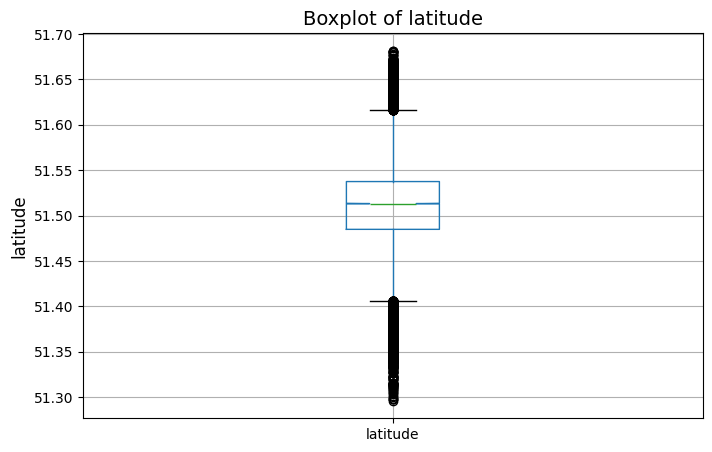

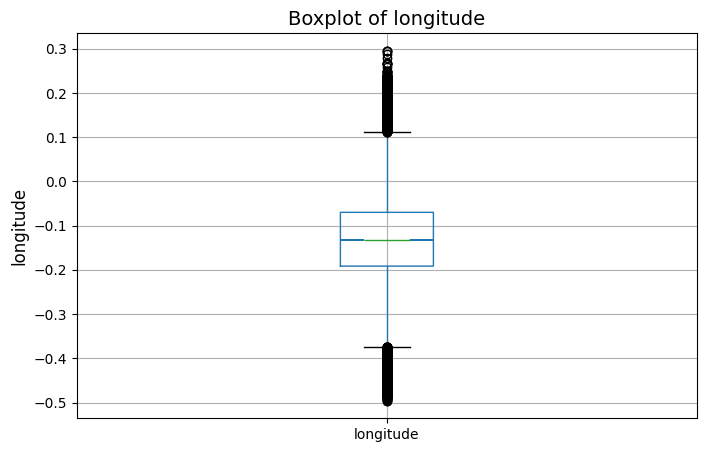

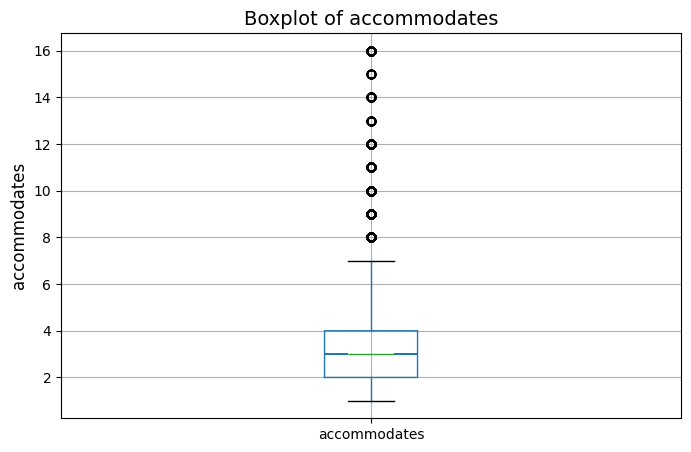

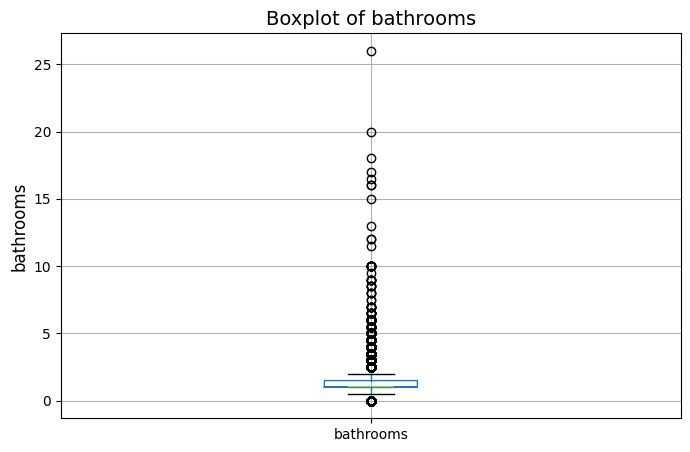

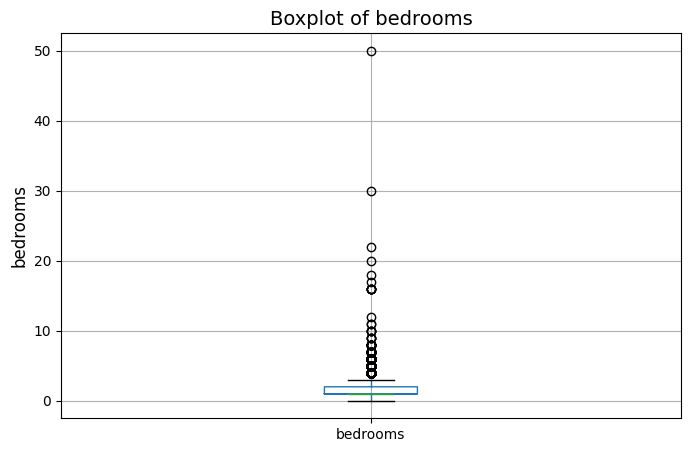

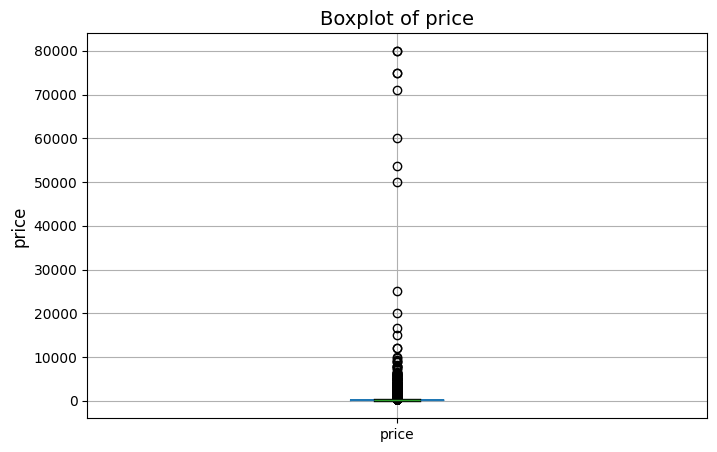

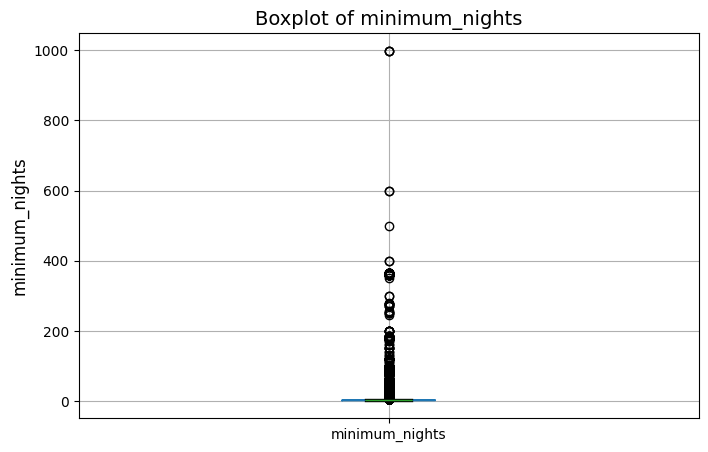

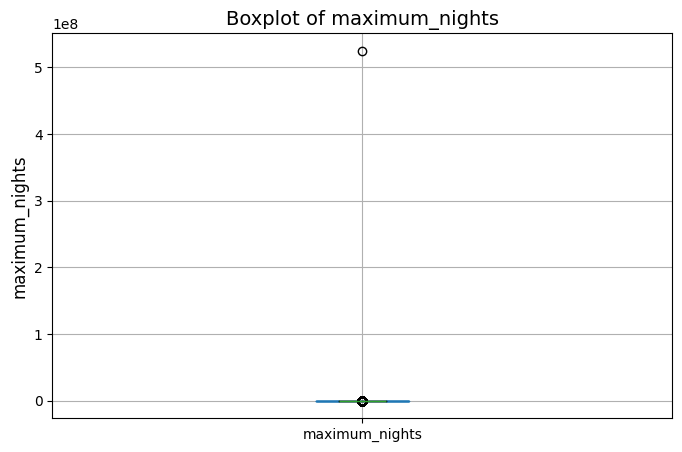

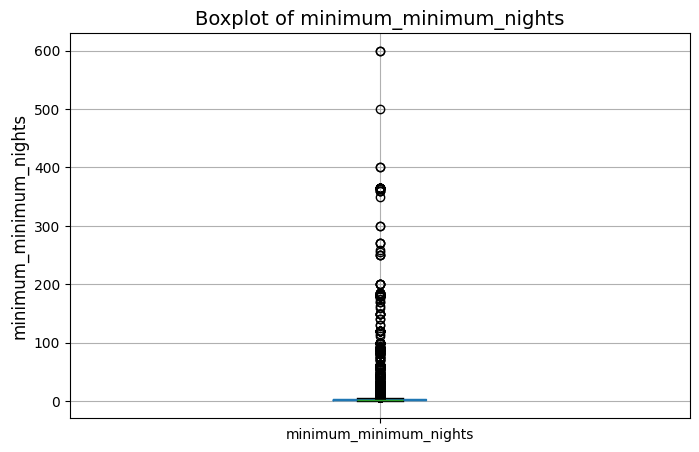

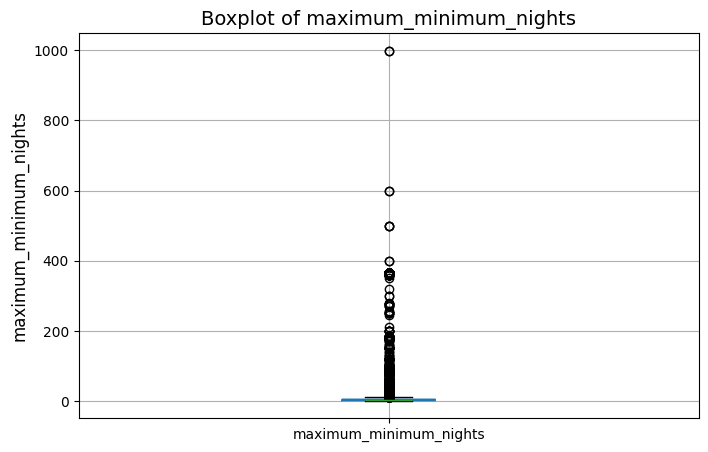

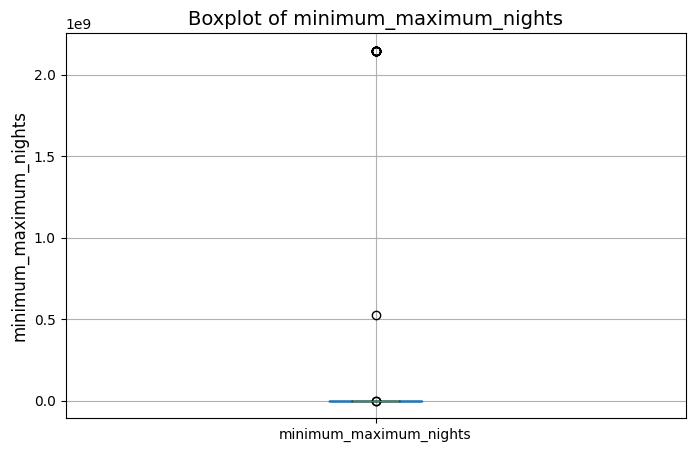

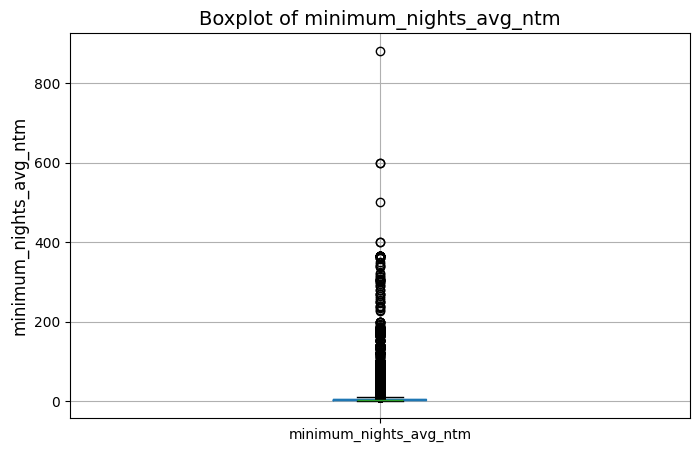

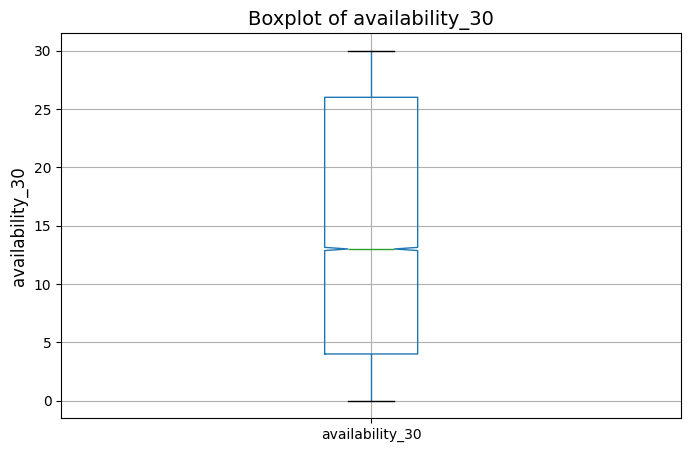

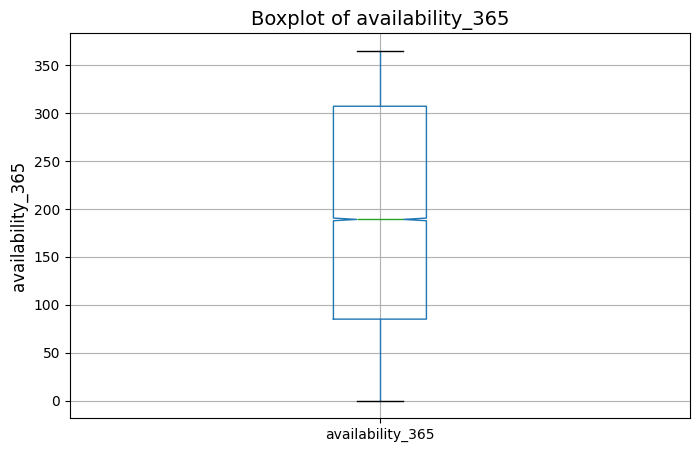

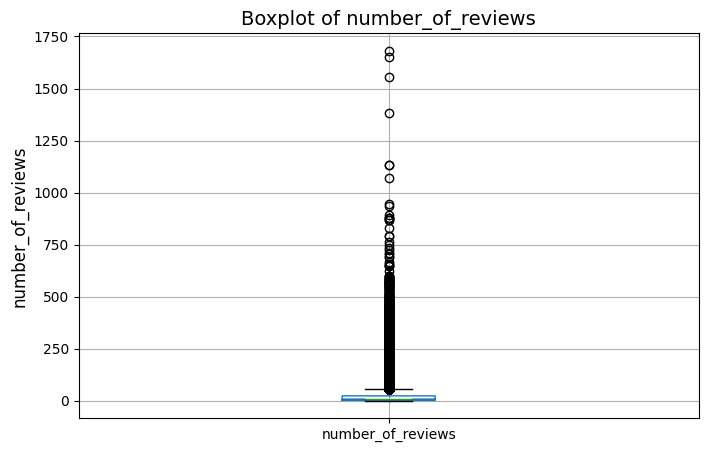

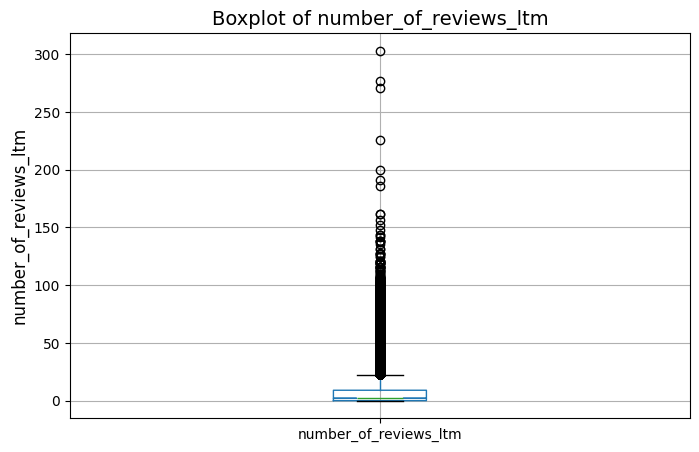

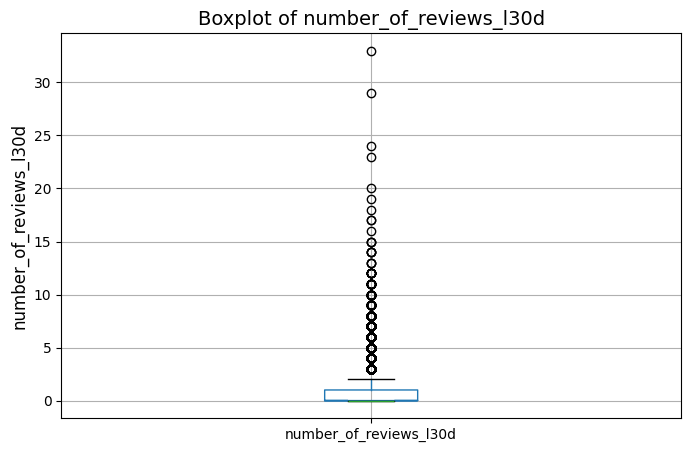

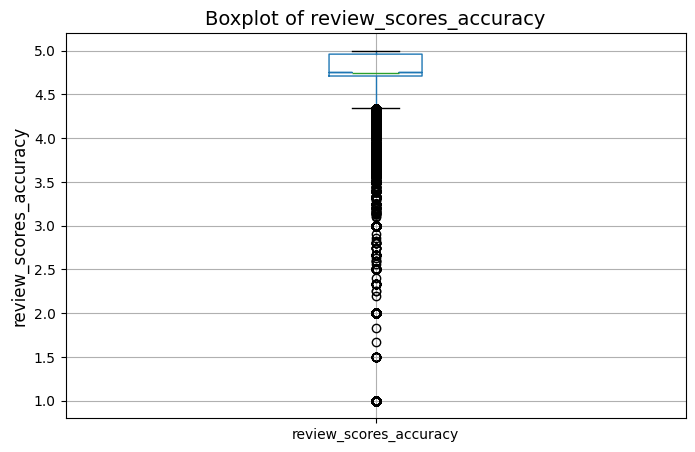

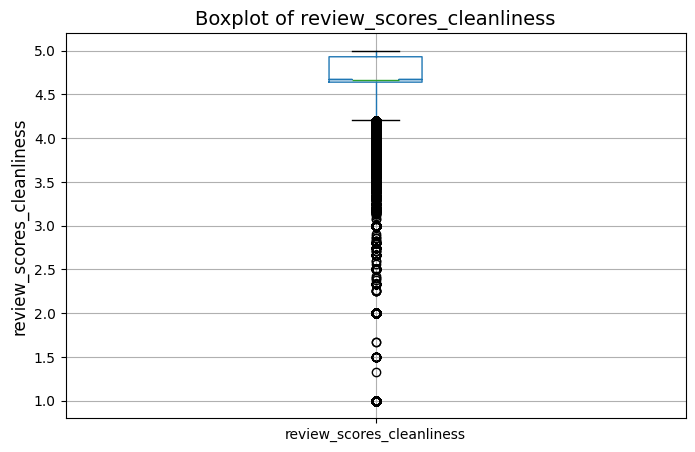

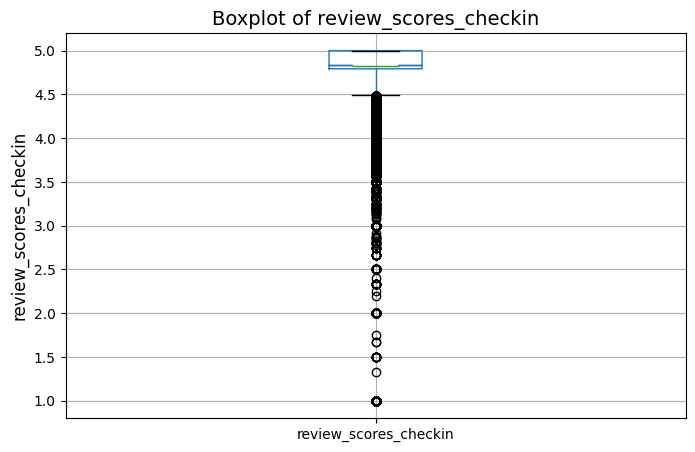

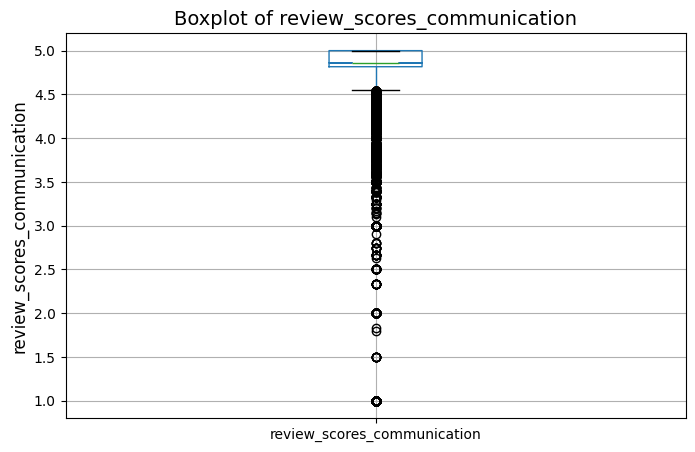

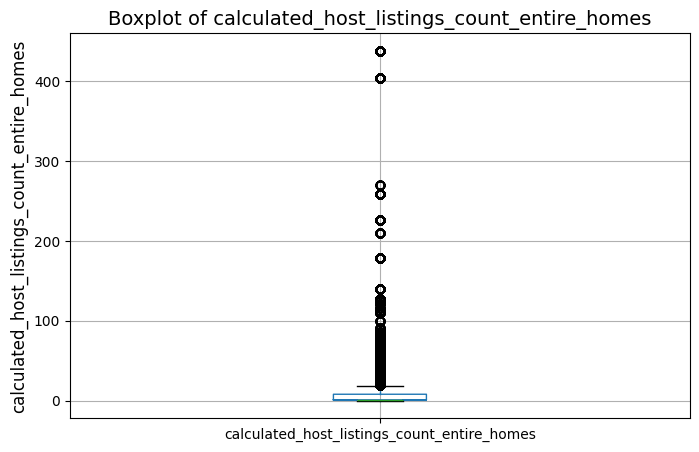

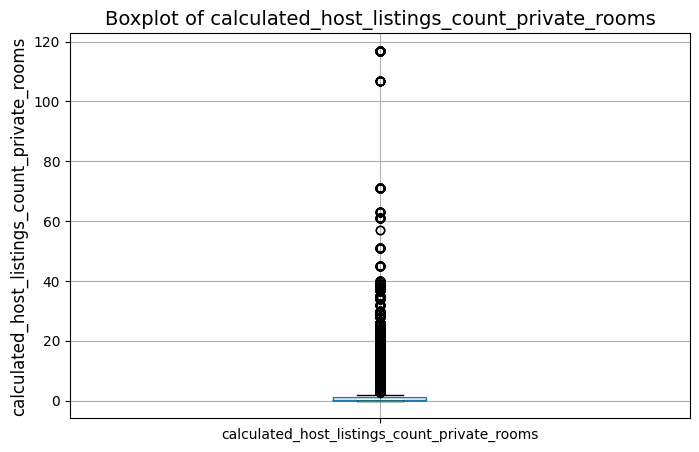

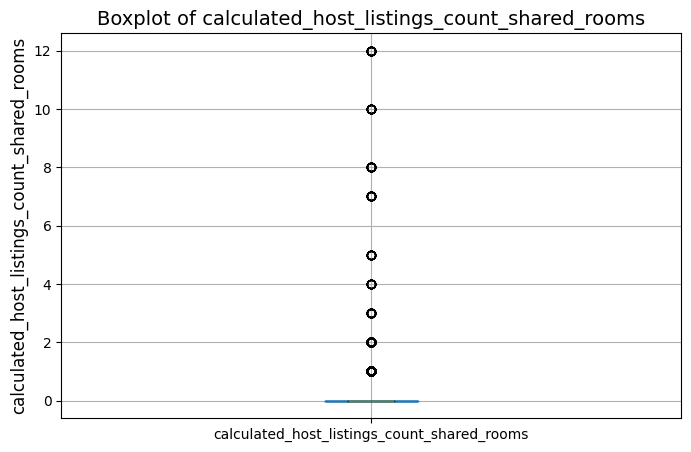

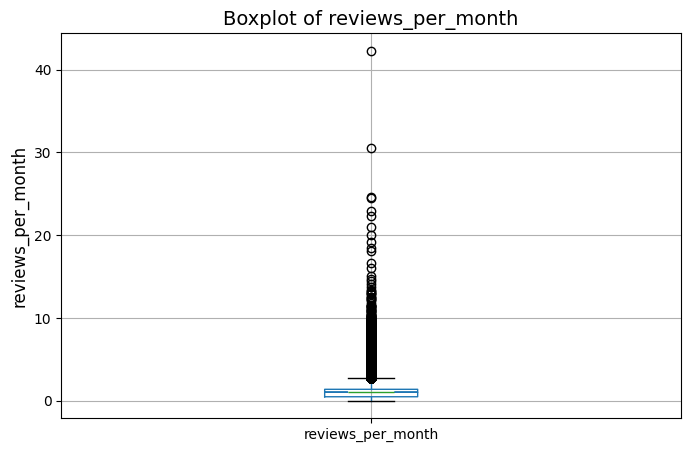

In [217]:
numeric_columns = airbnb_df_drop.select_dtypes(include=['number']).columns

# Create boxplots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    airbnb_df_drop.boxplot(column=column, grid=True, notch=True)
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.ylabel(column, fontsize=12)
    plt.show()

In [218]:
airbnb_df_drop.shape

(63205, 58)

In [219]:
# The amount of outliers per column
def count_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return len(outliers)

# Example usage :
numeric_columns = airbnb_df_drop.select_dtypes(include=['number']).columns
for col in numeric_columns:
    outlier_count = count_outliers(airbnb_df_drop, col)
    print(f"Column '{col}': {outlier_count} outliers")

Column 'latitude': 3018 outliers
Column 'longitude': 2413 outliers
Column 'accommodates': 3315 outliers
Column 'bathrooms': 5225 outliers
Column 'bedrooms': 3013 outliers
Column 'price': 4158 outliers
Column 'minimum_nights': 7472 outliers
Column 'maximum_nights': 13329 outliers
Column 'minimum_minimum_nights': 6304 outliers
Column 'maximum_minimum_nights': 6941 outliers
Column 'minimum_maximum_nights': 19 outliers
Column 'minimum_nights_avg_ntm': 6979 outliers
Column 'availability_30': 0 outliers
Column 'availability_365': 0 outliers
Column 'number_of_reviews': 7124 outliers
Column 'number_of_reviews_ltm': 6423 outliers
Column 'number_of_reviews_l30d': 5953 outliers
Column 'review_scores_accuracy': 5741 outliers
Column 'review_scores_cleanliness': 5729 outliers
Column 'review_scores_checkin': 5161 outliers
Column 'review_scores_communication': 5909 outliers
Column 'calculated_host_listings_count_entire_homes': 9759 outliers
Column 'calculated_host_listings_count_private_rooms': 10309 

In [220]:
airbnb_df_no_outliers = airbnb_df_drop[
     (airbnb_df_drop['accommodates'] <= 14) &
     (airbnb_df_drop['bathrooms'] <= 10) &
     (airbnb_df_drop['bedrooms'] <= 15) &
     (airbnb_df_drop['price'] <= 30000) &
     (airbnb_df_drop['minimum_nights'] <= 200) &
     (airbnb_df_drop['minimum_nights_avg_ntm'] <= 300) &
     (airbnb_df_drop['number_of_reviews'] <= 400) &
     (airbnb_df_drop['number_of_reviews_ltm'] <= 125) &
     (airbnb_df_drop['number_of_reviews_l30d'] <= 12) &
     (airbnb_df_drop['review_scores_accuracy'] >= 3.0) &
     (airbnb_df_drop['review_scores_cleanliness'] >= 2.25) &
     (airbnb_df_drop['review_scores_checkin'] >= 3) &
     (airbnb_df_drop['review_scores_communication'] >= 3) &
     (airbnb_df_drop['calculated_host_listings_count_entire_homes'] <= 130) &
     (airbnb_df_drop['calculated_host_listings_count_private_rooms'] <= 75) &
     (airbnb_df_drop['reviews_per_month'] <= 10)
    ]

In [221]:
original_count = len(airbnb_df_drop)
new_count = len(airbnb_df_no_outliers)
outliers_dropped = original_count - new_count
percentage_dropped = (outliers_dropped / original_count) * 100

print(f"Number of outliers dropped: {outliers_dropped}")
print(f"Percentage of outliers dropped: {percentage_dropped:.2f}%")

Number of outliers dropped: 3126
Percentage of outliers dropped: 4.95%


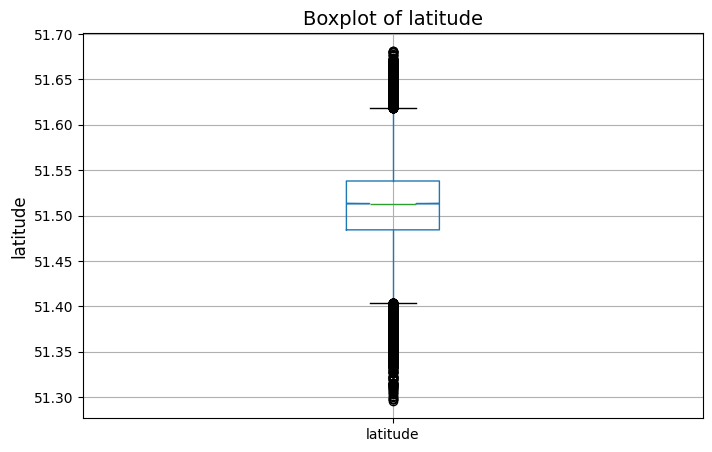

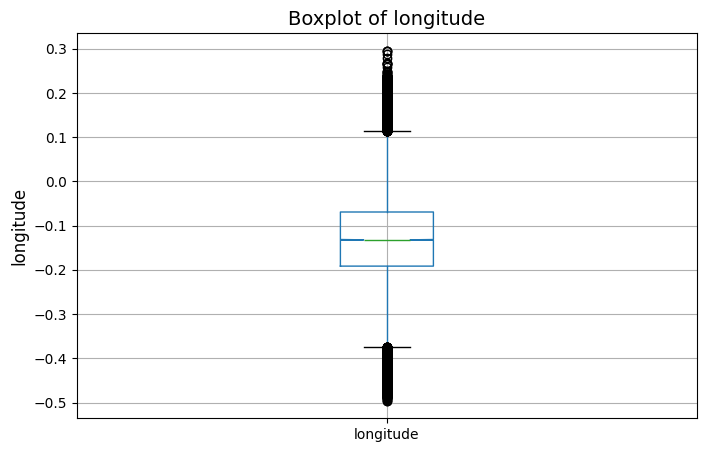

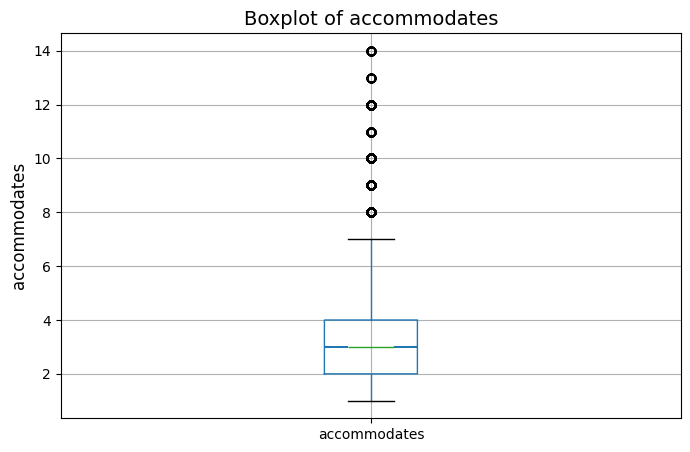

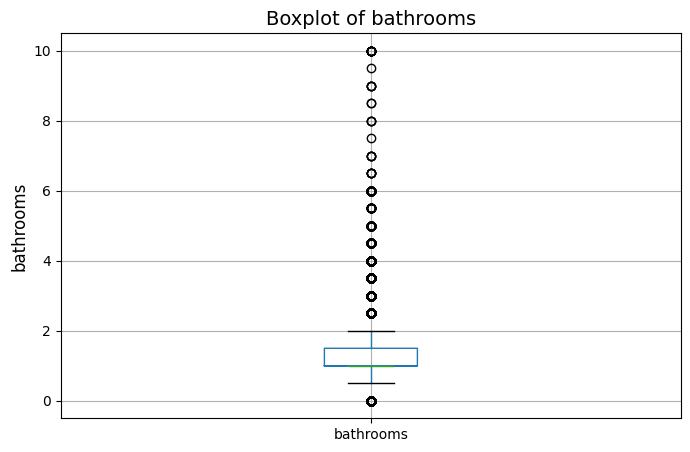

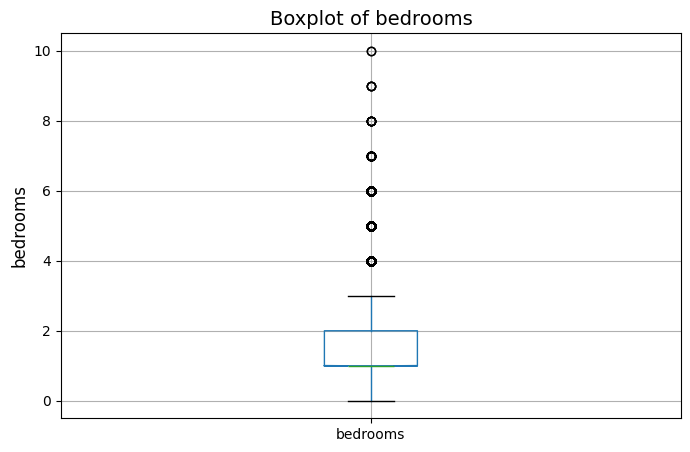

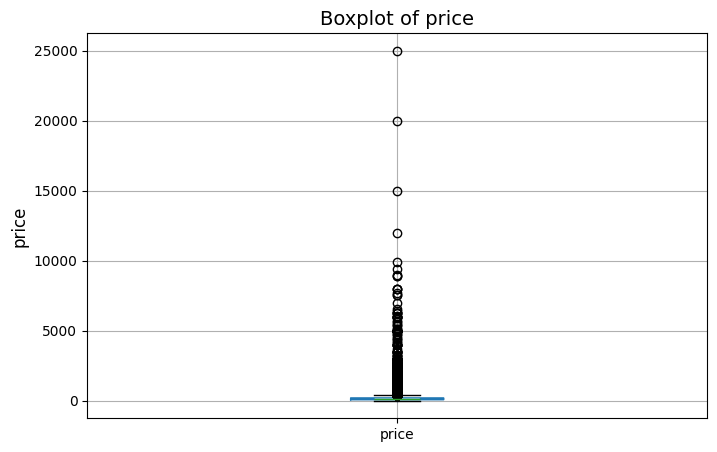

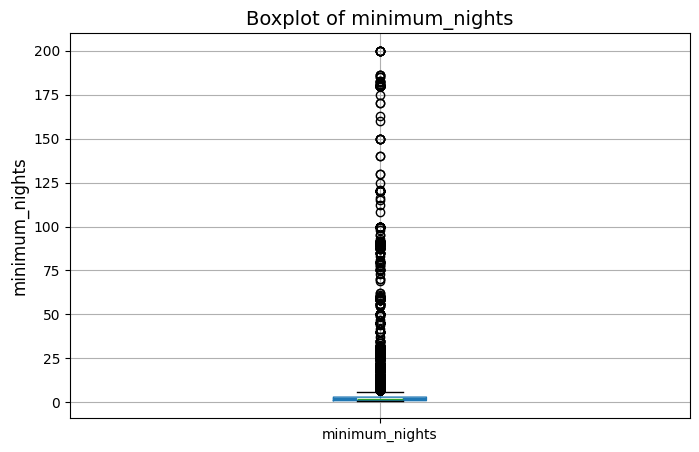

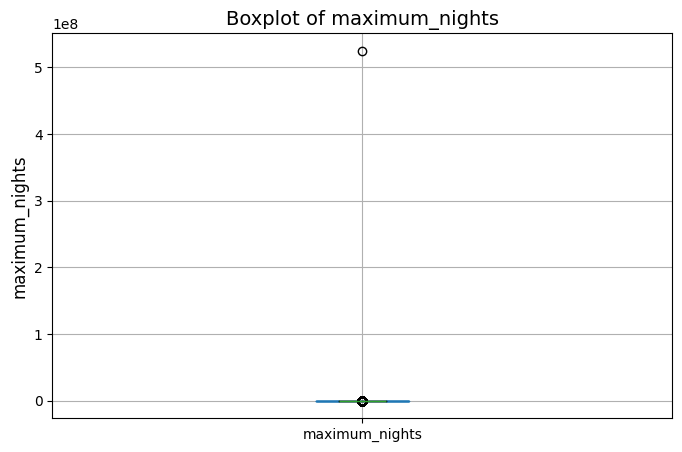

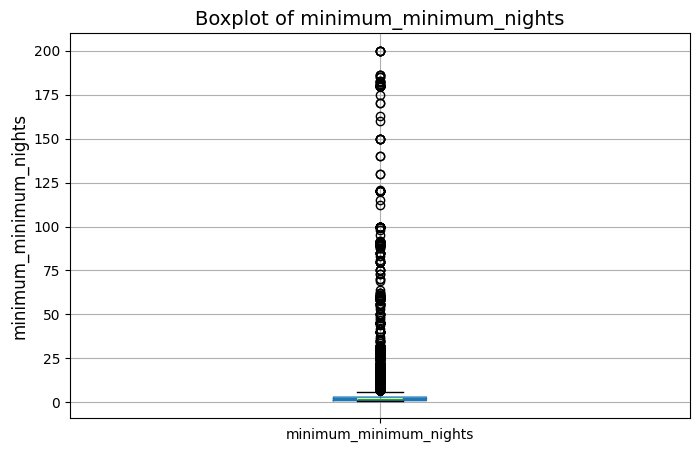

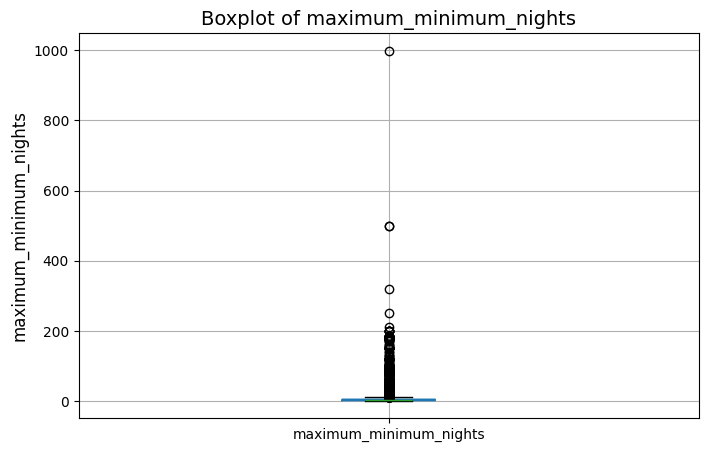

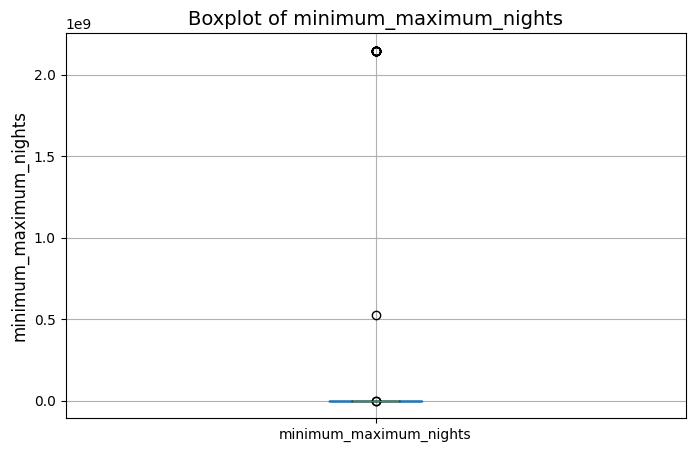

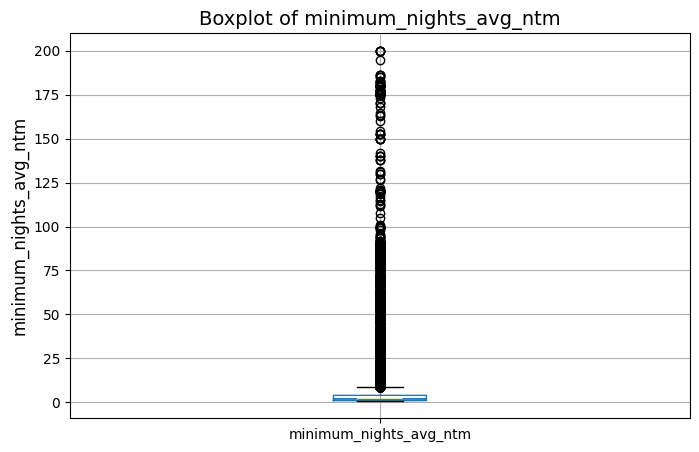

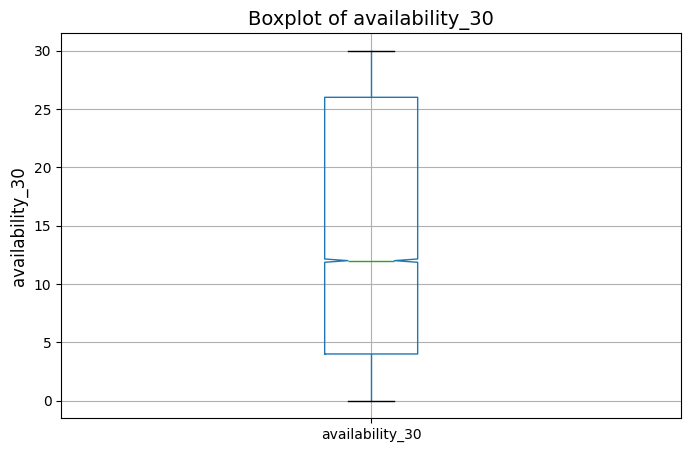

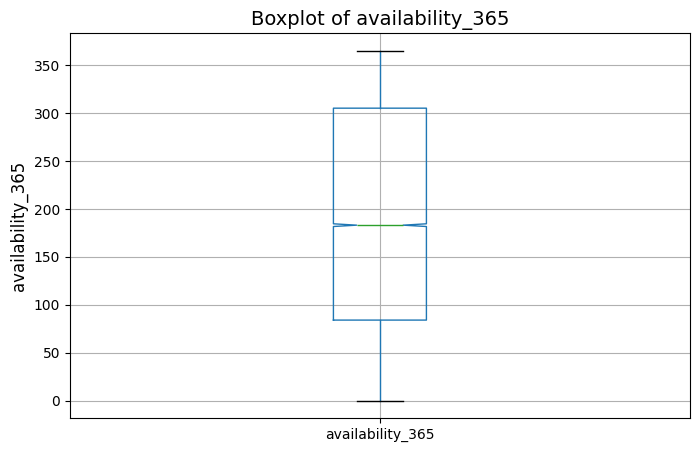

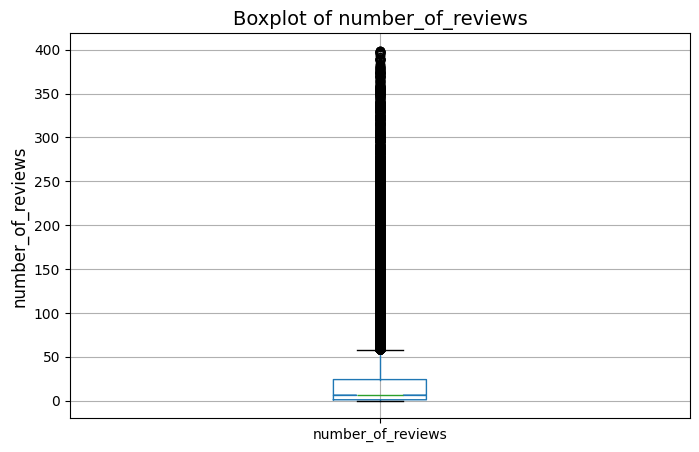

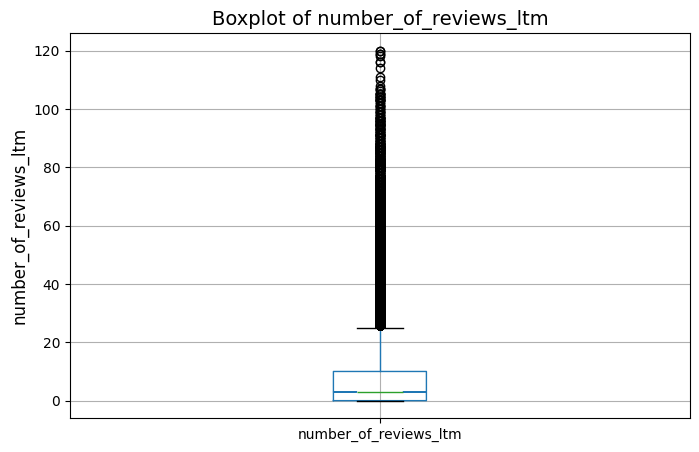

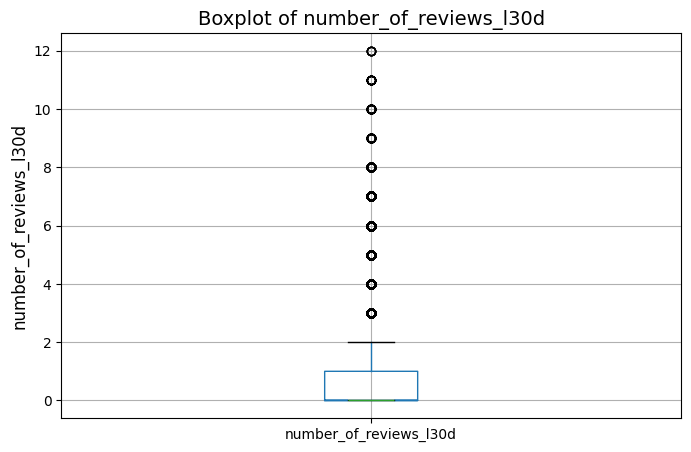

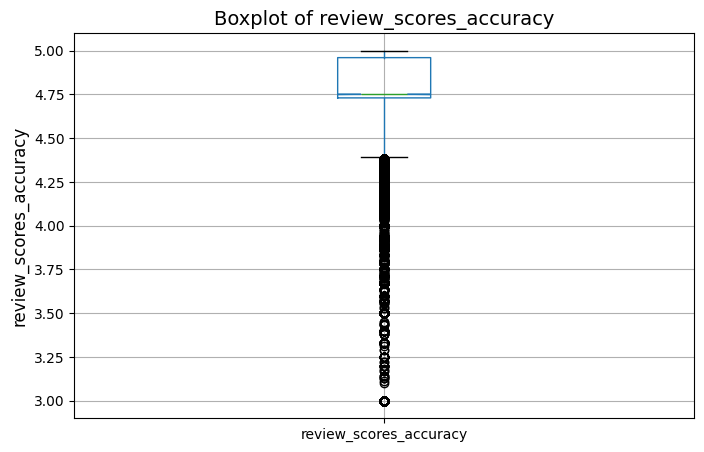

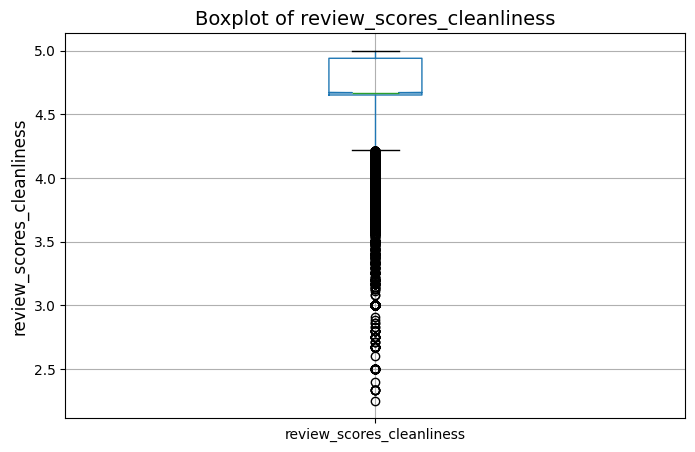

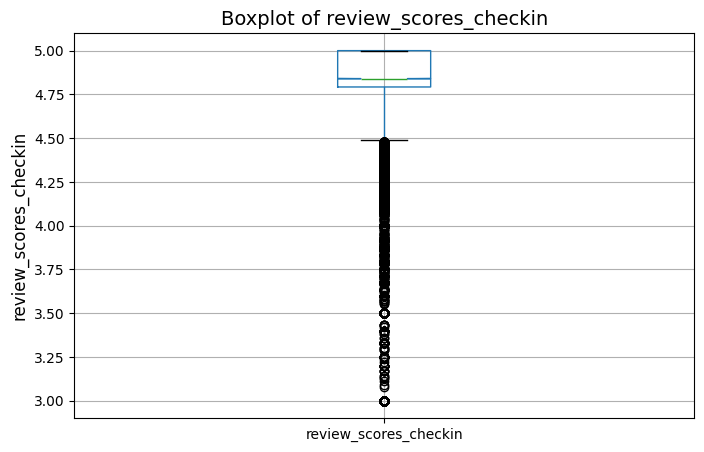

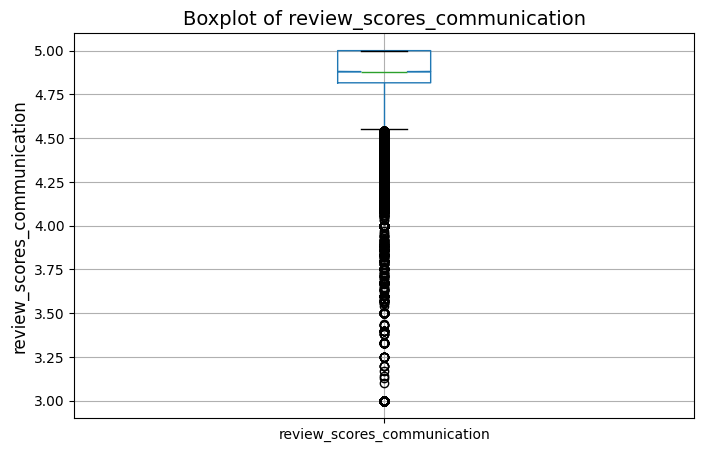

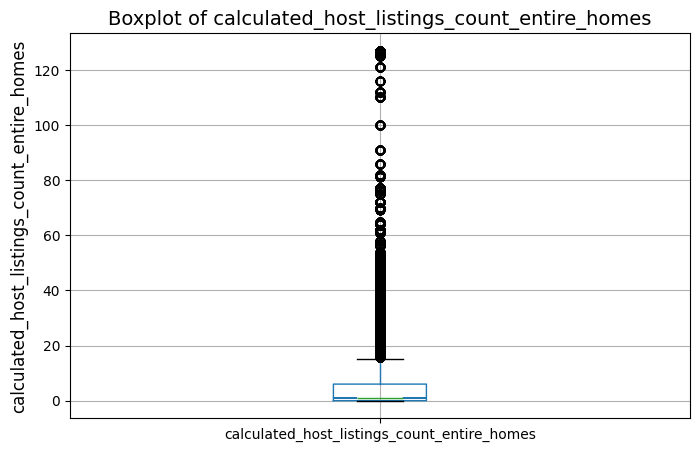

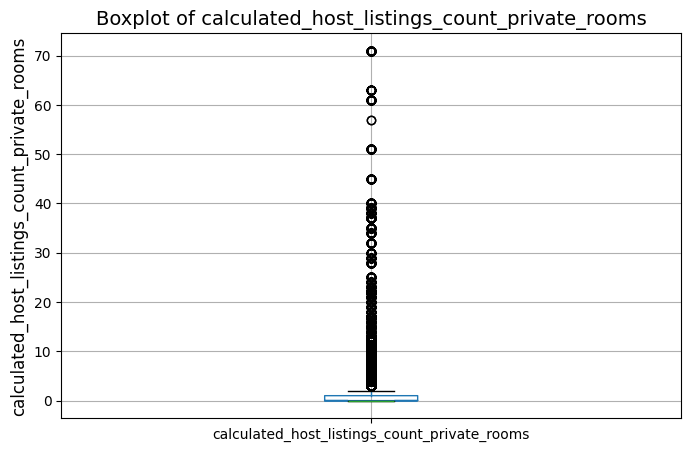

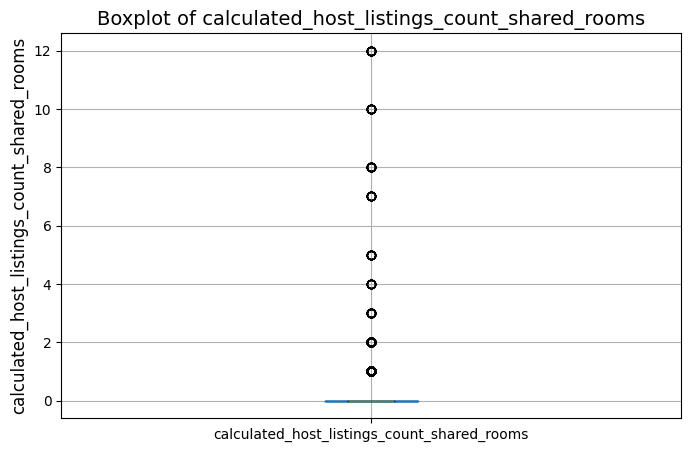

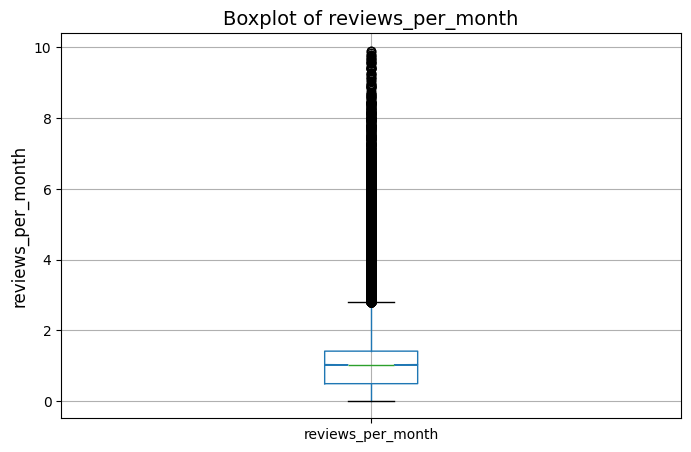

In [222]:
numeric_columns = airbnb_df_no_outliers.select_dtypes(include=['number']).columns
# Create boxplots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    airbnb_df_no_outliers.boxplot(column=column, grid=True, notch=True)
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.ylabel(column, fontsize=12)
    plt.show()

In [223]:
airbnb_df_no_outliers.shape

(60079, 58)

## Outliers improvement

**Adjusts or removes outliers to refine the dataset and improve data quality.**


- Evaluate whether removing outliers affects the generalizability of results.
- Where possible, treat outliers as a separate group for additional analysis rather than outright removal.

In [224]:
# Calculate the number of rows before and after outlier removal
rows_before = airbnb_df_drop.shape[0]
rows_after = airbnb_df_no_outliers.shape[0]

# Calculate the percentage of outliers removed
outlier_percentage = ((rows_before - rows_after) / rows_before) * 100

# Check if the percentage of outliers removed is less than 5%
if outlier_percentage < 5:
    print(f"The percentage of outliers removed ({outlier_percentage:.2f}%) is less than 5%.")
else:
    print(f"The percentage of outliers removed ({outlier_percentage:.2f}%) is greater than or equal to 5%.")

The percentage of outliers removed (4.95%) is less than 5%.


# Bivariate Analysis Without Outliers

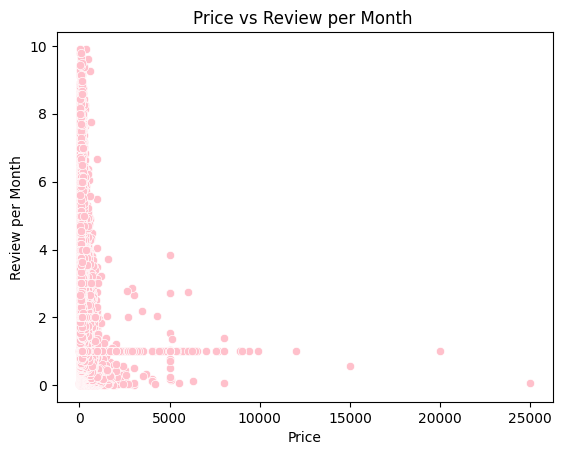

In [225]:
import seaborn as sns
sns.scatterplot(x='price', y='reviews_per_month', data=airbnb_df_no_outliers, color='pink')
plt.xlabel('Price')
plt.ylabel('Review per Month')
plt.title('Price vs Review per Month ')
plt.show()

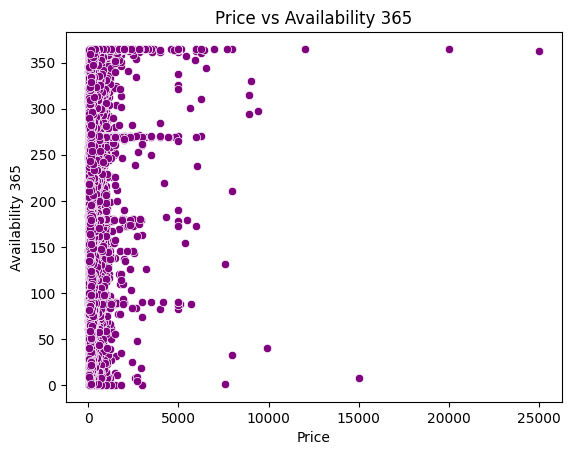

In [226]:
sns.scatterplot(x='price', y='availability_365', data=airbnb_df_no_outliers, color='purple')
plt.xlabel('Price')
plt.ylabel('Availability 365')
plt.title('Price vs Availability 365')
plt.show()

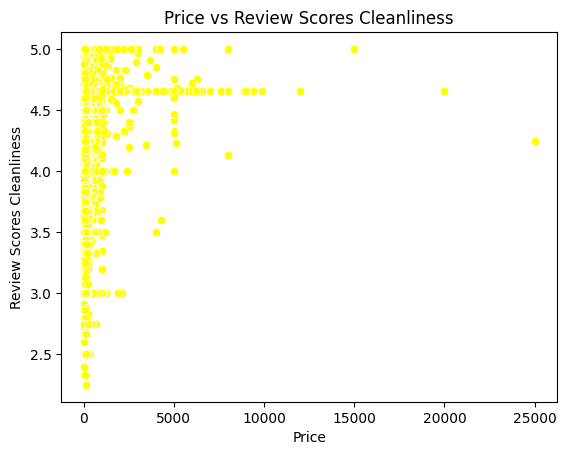

In [227]:
sns.scatterplot(x='price', y='review_scores_cleanliness', data=airbnb_df_no_outliers, color='yellow')
plt.xlabel('Price')
plt.ylabel('Review Scores Cleanliness')
plt.title('Price vs Review Scores Cleanliness')
plt.show()

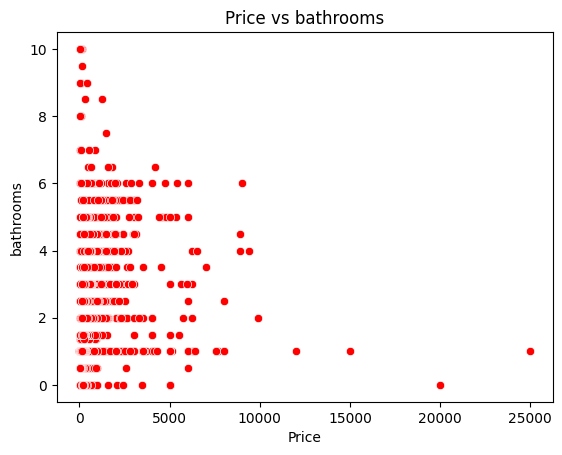

In [228]:
sns.scatterplot(x='price', y='bathrooms', data=airbnb_df_no_outliers, color='red')
plt.xlabel('Price')
plt.ylabel('bathrooms')
plt.title('Price vs bathrooms')
plt.show()

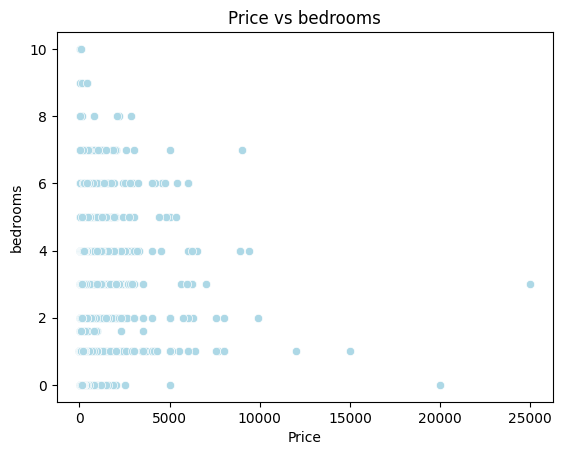

In [229]:
sns.scatterplot(x='price', y='bedrooms', data=airbnb_df_no_outliers, color='lightblue')
plt.xlabel('Price')
plt.ylabel('bedrooms')
plt.title('Price vs bedrooms')
plt.show()

# Analysis Without Outliers

1. Price vs Reviews per Month
- Listings with prices under 5,000 dominate and receive most reviews.
- Very few reviews occur for properties priced between 5,000 and 10,000.
- Removing outliers shows a clear trend: affordable listings are far more engaging and popular.

2. Price vs Availability
- Listings priced under 5,000 are available year-round (365 days) in most cases.
- Higher-priced properties show reduced availability, clustering between 0 and 200 days.
- Affordable listings are not only more available but also cater to a broader market, while high-priced ones are used seasonally or less frequently.

# Multivariate Analysis Without Outliers

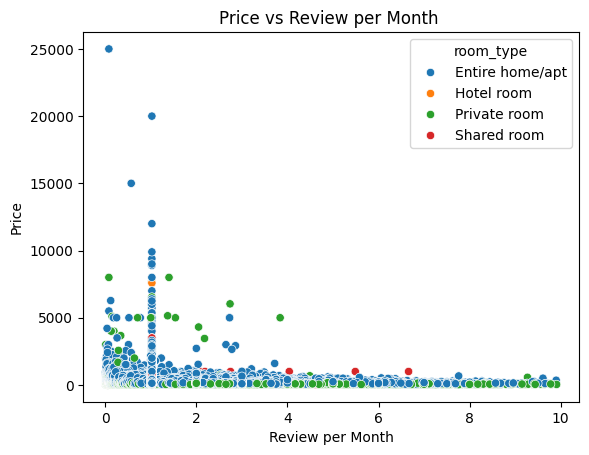

In [230]:
import seaborn as sns
sns.scatterplot(x='reviews_per_month', y='price', hue= 'room_type', data=airbnb_df_no_outliers)
plt.xlabel('Review per Month')
plt.ylabel('Price')
plt.title('Price vs Review per Month ')
plt.show()

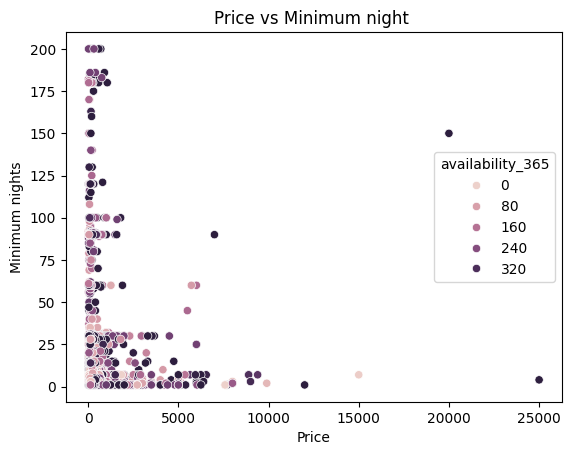

In [231]:
sns.scatterplot(x='price', y='minimum_nights',hue='availability_365', data=airbnb_df_no_outliers)
plt.xlabel('Price')
plt.ylabel('Minimum nights')
plt.title('Price vs Minimum night ')
plt.show()

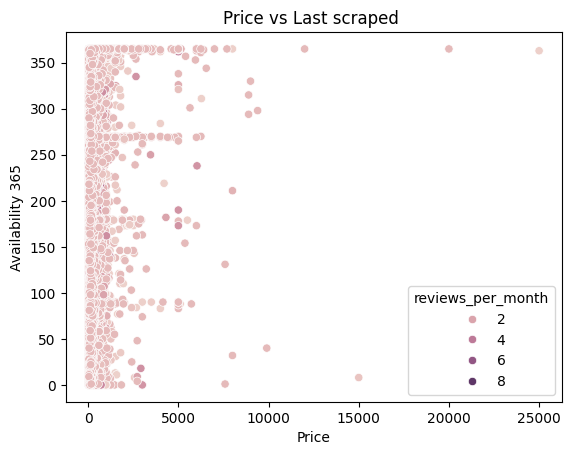

In [232]:
sns.scatterplot(x='price', y='availability_365',hue='reviews_per_month', data=airbnb_df_no_outliers)
plt.xlabel('Price')
plt.ylabel('Availability 365')
plt.title('Price vs Last scraped ')
plt.show()

#### Analysis Without Outliers

1. Price vs Reviews per Month
- Listings under 5,000 dominate across all room types, with most reviews clustering between 0-4 per month.
- Entire homes/apartments and private rooms receive the majority of reviews, while shared rooms remain the least reviewed.
- Removing outliers confirms affordable listings are more engaging, with entire homes and private rooms leading in customer interactions.

2. Price vs Minimum Nights
- Listings priced under 5,000 generally require fewer minimum nights (0-25), with most offering full-year availability (320 days).
- Higher-priced listings have more varied minimum stays, but their availability decreases significantly.
- Affordable properties cater to short-term stays and are available year-round, while higher-priced listings target longer, less frequent stays.

# Corr Without Outliers  

**Recomputes correlations after removing outliers for more reliable relationships.**


- Correlation analysis after outlier removal helps reveal true trends and relationships.
- Always compare the original and adjusted correlation results to identify the impact of outliers.

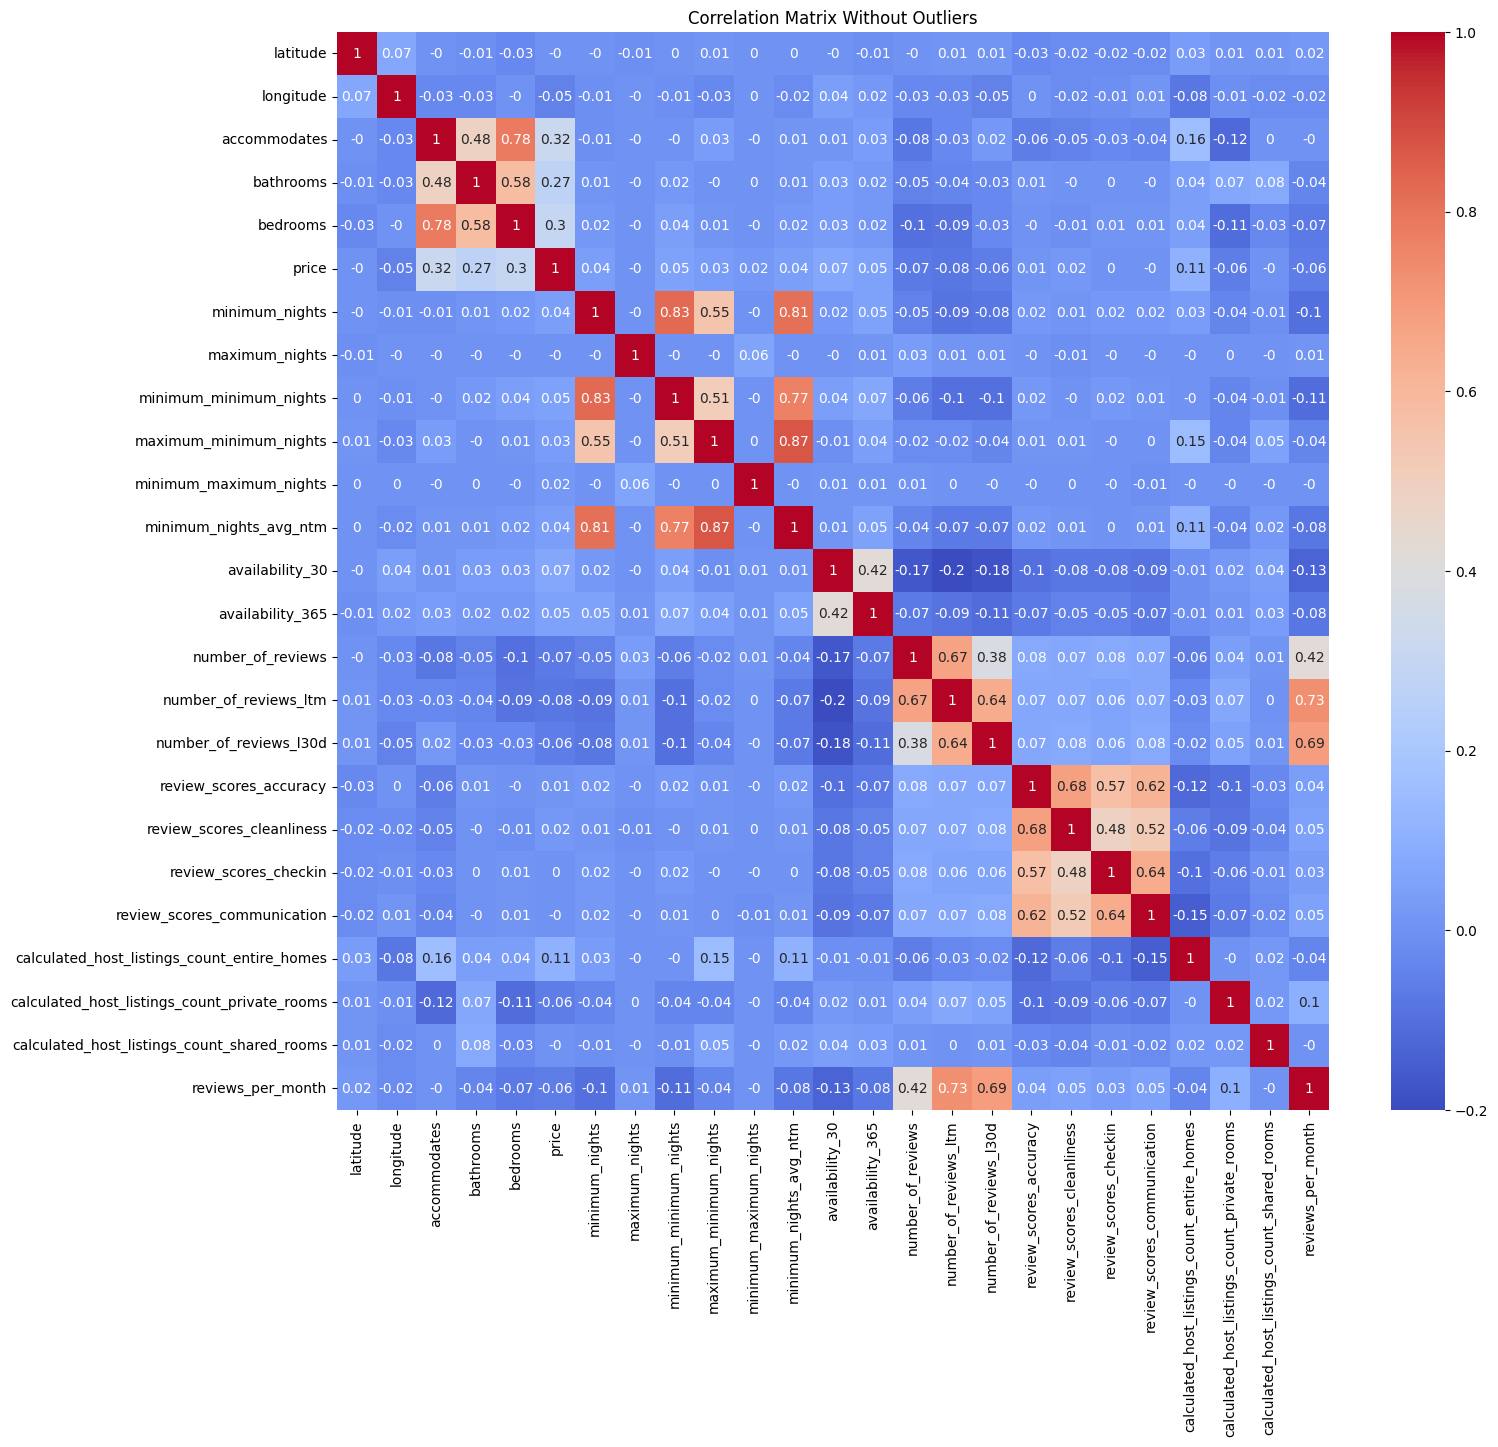

In [233]:
# Select only numeric features for correlation analysis
numeric_features = airbnb_df_no_outliers.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr3 = numeric_features.corr().round(2)

# Plotting the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr3, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Without Outliers')
plt.show()

# Transformation

**Final step to standardize, normalize, or reshape data for model readiness or better interpretation.**


- Transformations (e.g., scaling, log transformations) are crucial to ensure models work efficiently.
- Choose transformation methods based on specific needs (e.g., standardization for ML models or normalization for comparison across variables).


In [234]:
features = [
         'price',
        'minimum_nights',
        'number_of_reviews',
        'availability_365',
        'reviews_per_month',
        'review_scores_cleanliness',
        'bathrooms',
        'bedrooms',
        'accommodates',
        'maximum_nights',
        'calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms',
        'calculated_host_listings_count_shared_rooms',
        'minimum_minimum_nights',
        'maximum_minimum_nights',
        'minimum_maximum_nights',
        'minimum_nights_avg_ntm',
        'review_scores_accuracy',
        'review_scores_checkin',
        'review_scores_communication',
        'number_of_reviews_ltm',
        'number_of_reviews_l30d',
        'availability_30'

]
X = airbnb_df_no_outliers[features]

scaler = StandardScaler()

X_standardized = scaler.fit_transform(X)

airbnb_df_standardized = pd.DataFrame(X_standardized, columns=features)

print(airbnb_df_standardized.head())

      price  minimum_nights  number_of_reviews  availability_365  \
0 -0.402110       -0.292665           0.455872          1.425529   
1 -0.204766       -0.037911           1.606793          0.429189   
2  1.001940       -0.122829           0.721469          0.772466   
3  0.021694       -0.207747           1.562527          0.738976   
4 -0.140063       -0.207747          -0.097456          1.442274   

   reviews_per_month  review_scores_cleanliness  bathrooms  bedrooms  \
0          -0.820872                   0.170936  -0.518922 -0.548331   
1          -0.587744                   0.594986  -0.518922 -0.548331   
2          -0.754264                   0.110358   0.977008  1.585362   
3          -0.571092                   0.685854   0.229043 -0.548331   
4          -0.945761                  -0.374271  -0.518922 -0.548331   

   accommodates  maximum_nights  ...  minimum_minimum_nights  \
0     -1.161942       -0.004262  ...               -0.277511   
1     -0.674325       -0.00426

In [235]:
features = [
        'price',
        'minimum_nights',
        'number_of_reviews',
        'availability_365',
        'reviews_per_month',
        'review_scores_cleanliness',
        'bathrooms',
        'bedrooms',
        'accommodates',
        'maximum_nights',
        'calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms',
        'calculated_host_listings_count_shared_rooms',
        'minimum_minimum_nights',
        'maximum_minimum_nights',
        'minimum_maximum_nights',
        'minimum_nights_avg_ntm',
        'review_scores_accuracy',
        'review_scores_checkin',
        'review_scores_communication',
        'number_of_reviews_ltm',
        'number_of_reviews_l30d',
        'availability_30'
]
X = airbnb_df_no_outliers[features]

scaler = MinMaxScaler()

X_standardized = scaler.fit_transform(X)

airbnb_df_normalized = pd.DataFrame(X_standardized, columns=features)

print(airbnb_df_normalized.head())

      price  minimum_nights  number_of_reviews  availability_365  \
0  0.002320        0.000000           0.110276          0.994521   
1  0.004760        0.015075           0.240602          0.668493   
2  0.019681        0.010050           0.140351          0.780822   
3  0.007560        0.005025           0.235589          0.769863   
4  0.005560        0.005025           0.047619          1.000000   

   reviews_per_month  review_scores_cleanliness  bathrooms  bedrooms  \
0           0.025253                   0.905455       0.10       0.1   
1           0.053535                   0.956364       0.10       0.1   
2           0.033333                   0.898182       0.20       0.3   
3           0.055556                   0.967273       0.15       0.1   
4           0.010101                   0.840000       0.10       0.1   

   accommodates  maximum_nights  ...  minimum_minimum_nights  \
0      0.000000    5.334801e-08  ...                0.000000   
1      0.076923    5.525330e-0

# Models

**Features Used**

- price
- minimum_nights
- number_of_reviews
- availability_365
- reviews_per_month
- review_scores_cleanliness
- bathrooms
- bedrooms
- accommodates
- maximum_nights
- calculated_host_listings_count_entire_homes
- calculated_host_listings_count_private_rooms
- calculated_host_listings_count_shared_rooms
- minimum_minimum_nights
- maximum_minimum_nights
- minimum_maximum_nights
- minimum_nights_avg_ntm
- review_scores_accuracy
- review_scores_checkin
- review_scores_communication
- number_of_reviews_ltm
- number_of_reviews_l30d
- availability_30

In [236]:
# Model 1: Baseline Model normalized
def Baseline_model_normalized(X, y):
    # Prepare the data
    X = airbnb_df_normalized[['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights', 'calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms',
        'calculated_host_listings_count_shared_rooms']]
    y = airbnb_df_normalized['price']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print results
    print("Baseline Linear Regression Results:")
    print(f"Intercept: {model.intercept_}")
    print(f"Coefficients: {dict(zip(X.columns, model.coef_))}")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")

    # Residual analysis
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals)
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

    return model, X, y

Baseline Linear Regression Insights  

Purpose: Establishes fundamental relationships between variables and property performance

Key Investment Signals:  

Identifies core factors influencing rental income

Reveals initial correlations between property characteristics and potential revenue

Practical Application:  

Helps investors understand baseline property value drivers

Provides a starting point for investment decision-making

Highlights which initial features most strongly impact potential rental income

Baseline Linear Regression Results:
Intercept: -0.004154271462455238
Coefficients: {'reviews_per_month': -0.0032824721045525405, 'availability_365': 0.0016108069454184477, 'review_scores_cleanliness': 0.003645729272001748, 'bathrooms': 0.0273478658543162, 'bedrooms': 0.008368814726472485, 'minimum_nights': 0.006868575330630303, 'number_of_reviews': -0.002731508753366342, 'accommodates': 0.014529218316524576, 'maximum_nights': 0.001155514508697584, 'calculated_host_listings_count_entire_homes': 0.005657261187353713, 'calculated_host_listings_count_private_rooms': -0.004675347942558607, 'calculated_host_listings_count_shared_rooms': -0.005546872696584422}
R-squared: 0.15410581975555104
Mean Squared Error: 0.0001077662524113996


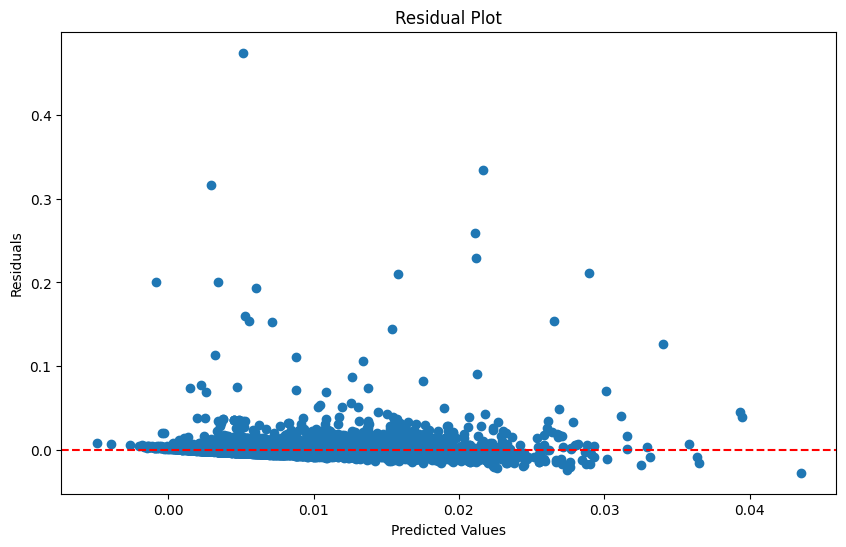

(LinearRegression(),
        reviews_per_month  availability_365  review_scores_cleanliness  \
 0               0.025253          0.994521                   0.905455   
 1               0.053535          0.668493                   0.956364   
 2               0.033333          0.780822                   0.898182   
 3               0.055556          0.769863                   0.967273   
 4               0.010101          1.000000                   0.840000   
 ...                  ...               ...                        ...   
 60074           0.102411          0.953425                   0.873293   
 60075           0.102411          0.901370                   0.873293   
 60076           0.102411          0.986301                   0.873293   
 60077           0.102411          0.060274                   0.873293   
 60078           0.102411          0.490411                   0.873293   
 
        bathrooms  bedrooms  minimum_nights  number_of_reviews  accommodates  \
 0       

In [237]:
# Define X and y before calling the function
X = airbnb_df_no_outliers[['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights', 'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms']]
y = airbnb_df_no_outliers['price']

# Now call the function with the defined variables
Baseline_model_normalized(X, y)

Baseline Linear Regression Results:
Intercept: -0.004154271462455238
Coefficients: {'reviews_per_month': -0.0032824721045525405, 'availability_365': 0.0016108069454184477, 'review_scores_cleanliness': 0.003645729272001748, 'bathrooms': 0.0273478658543162, 'bedrooms': 0.008368814726472485, 'minimum_nights': 0.006868575330630303, 'number_of_reviews': -0.002731508753366342, 'accommodates': 0.014529218316524576, 'maximum_nights': 0.001155514508697584, 'calculated_host_listings_count_entire_homes': 0.005657261187353713, 'calculated_host_listings_count_private_rooms': -0.004675347942558607, 'calculated_host_listings_count_shared_rooms': -0.005546872696584422}
R-squared: 0.15410581975555104
Mean Squared Error: 0.0001077662524113996


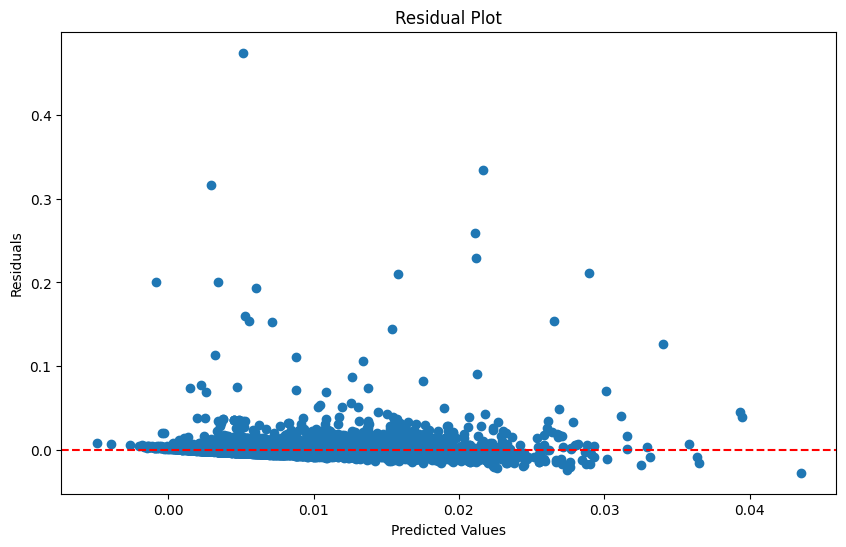

(LinearRegression(),
        reviews_per_month  availability_365  review_scores_cleanliness  \
 0               0.025253          0.994521                   0.905455   
 1               0.053535          0.668493                   0.956364   
 2               0.033333          0.780822                   0.898182   
 3               0.055556          0.769863                   0.967273   
 4               0.010101          1.000000                   0.840000   
 ...                  ...               ...                        ...   
 60074           0.102411          0.953425                   0.873293   
 60075           0.102411          0.901370                   0.873293   
 60076           0.102411          0.986301                   0.873293   
 60077           0.102411          0.060274                   0.873293   
 60078           0.102411          0.490411                   0.873293   
 
        bathrooms  bedrooms  minimum_nights  number_of_reviews  accommodates  \
 0       

In [238]:
Baseline_model_normalized(X, y)

In [239]:
# Model 2: P value Model normalized
def p_value_model_normalized(X, y):
    # Prepare the data with more features
    X = airbnb_df_normalized[['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights']]
    y = airbnb_df_normalized['price']

    # Add constant for statsmodels
    X = sm.add_constant(X)

    # Fit the model using statsmodels for p-value analysis
    model = sm.OLS(y, X).fit()

    # Print detailed summary
    print(model.summary())

    # Select significant features based on p-values
    significant_features = model.pvalues[model.pvalues < 0.05].index.tolist()

    # Rebuild model with significant features
    X_significant = X[significant_features]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_significant, y, test_size=0.2, random_state=42)

    # Fit new model
    improved_model = sm.OLS(y_train, X_train).fit()

    # Predictions
    y_pred = improved_model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = improved_model.rsquared

    print("\nP-value Improved Model:")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")

    return improved_model

P-value Based Model  

Statistical Significance:  

Focuses on statistically meaningful variables

Removes potentially noisy or irrelevant features

Investment Strategy:  

Provides a more precise model by eliminating less impactful variables

Reduces investment risk by concentrating on proven influential factors

Helps investors make data-driven decisions with higher confidence

In [240]:
p_value_model_normalized(X, y)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     1001.
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        04:23:35   Log-Likelihood:             1.8287e+05
No. Observations:               60079   AIC:                        -3.657e+05
Df Residuals:                   60069   BIC:                        -3.656e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [241]:
# Model 3: Coefficient Model normalized
def coefficient_model_normalized(X, y):
    # Focus on features with highest absolute coefficients
    X = airbnb_df_normalized[['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights']]
    y = airbnb_df_normalized['price']

    # Standardize features to compare coefficients
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Print coefficients
    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_
    }).sort_values('Coefficient', key=abs, ascending=False)

    print("Model Coefficients (Scaled Features):")
    print(coef_df)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nR-squared: {r2}")
    print(f"Mean Squared Error: {mse}")

    return model, coef_df

Coefficient-Based Model  

Feature Importance Analysis:  

Ranks features by their economic impact

Standardizes variables to compare relative importance

Investor Benefits:  

Identifies the most critical factors for property performance

Guides investment strategy by highlighting key value drivers

Helps prioritize property characteristics that maximize returns

In [242]:
coefficient_model_normalized(X, y)

Model Coefficients (Scaled Features):
                     Feature  Coefficient
7               accommodates     0.002617
3                  bathrooms     0.001743
4                   bedrooms     0.000651
1           availability_365     0.000496
0          reviews_per_month    -0.000462
2  review_scores_cleanliness     0.000448
5             minimum_nights     0.000444
6          number_of_reviews    -0.000348
8             maximum_nights     0.000005

R-squared: 0.14766232249007938
Mean Squared Error: 0.00010858714888868984


(LinearRegression(),
                      Feature  Coefficient
 7               accommodates     0.002617
 3                  bathrooms     0.001743
 4                   bedrooms     0.000651
 1           availability_365     0.000496
 0          reviews_per_month    -0.000462
 2  review_scores_cleanliness     0.000448
 5             minimum_nights     0.000444
 6          number_of_reviews    -0.000348
 8             maximum_nights     0.000005)

In [243]:
# Model 4: Transformation Model normalized
def transformation_model_normalized(X, y):
    X = airbnb_df_normalized[['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights']]
    y = airbnb_df_normalized['price']

    # Log transformation of target variable
    y_log = np.log1p(y)

    # Polynomial features
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y_log, test_size=0.2, random_state=42)

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Inverse log transformation
    y_pred_original = np.expm1(y_pred)
    y_test_original = np.expm1(y_test)

    # Evaluation
    r2 = r2_score(y_test_original, y_pred_original)
    mse = mean_squared_error(y_test_original, y_pred_original)

    return {
        'model': model,
        'r2': r2,
        'mse': mse,
        'transformation': 'Log and Polynomial'
    }

Transformation Model  

Advanced Analysis:  

Applies non-linear transformations to capture complex relationships

Uses polynomial features to detect nuanced patterns

Investment Insights:  

Reveals non-linear relationships in property valuation

Helps investors understand more complex market dynamics

Provides a more sophisticated view of potential returns

In [244]:
transformation_model_normalized(X, y)

{'model': LinearRegression(),
 'r2': 0.17377803907046385,
 'mse': 0.00010526002716278675,
 'transformation': 'Log and Polynomial'}

In [245]:
# Model 5: Outlier Treatment Model normalized
def outlier_treatment_model_normalized(X, y):

    X = airbnb_df_normalized[['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights']]
    y = airbnb_df_normalized['price']

    # Detect and remove outliers using IQR method
    def remove_outliers(df, column): # Pass df as argument
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Remove outliers from price
    df_no_outliers = remove_outliers(airbnb_df_normalized, 'price') # Use airbnb_df_normalized

    # Prepare data
    X = df_no_outliers[['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights']]
    y = df_no_outliers['price']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Outlier Treated Model Results:")
    print(f"Original Dataset Size: {len(airbnb_df_normalized)}") # Using original dataset for comparison
    print(f"Dataset Size After Outlier Removal: {len(df_no_outliers)}")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")

    return model

Outlier Treatment Model  

Risk Management:  

Removes extreme or unusual data points

Creates a more robust and representative model

Investor Protection:  

Reduces the impact of anomalous properties

Provides a more stable prediction of property performance

Helps avoid misleading investments based on exceptional cases

In [246]:
outlier_treatment_model_normalized(X, y)

Outlier Treated Model Results:
Original Dataset Size: 60079
Dataset Size After Outlier Removal: 56224
R-squared: 0.39483058668432014
Mean Squared Error: 7.194186693348368e-06


LinearRegression()

**Same five models using a Standardized DataFrame**

In [247]:
# Model 6: Baseline Model standardized
def Baseline_model_standardized(X, y):
    # Prepare the data
    X = airbnb_df_standardized[['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights']]
    y = airbnb_df_standardized['price']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print results
    print("Baseline Linear Regression Results:")
    print(f"Intercept: {model.intercept_}")
    print(f"Coefficients: {dict(zip(X.columns, model.coef_))}")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")

    # Residual analysis
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals)
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

    return model, X, y

Baseline Linear Regression Results:
Intercept: 0.0023334668549520004
Coefficients: {'reviews_per_month': -0.03737195135987107, 'availability_365': 0.0400864685617866, 'review_scores_cleanliness': 0.03621056008362209, 'bathrooms': 0.14098269675817654, 'bedrooms': 0.05262370651376186, 'minimum_nights': 0.03593805071027112, 'number_of_reviews': -0.028170038887574737, 'accommodates': 0.21165306830558606, 'maximum_nights': 0.0004109936770050383}
R-squared: 0.1476623224900795
Mean Squared Error: 0.7102469153180629


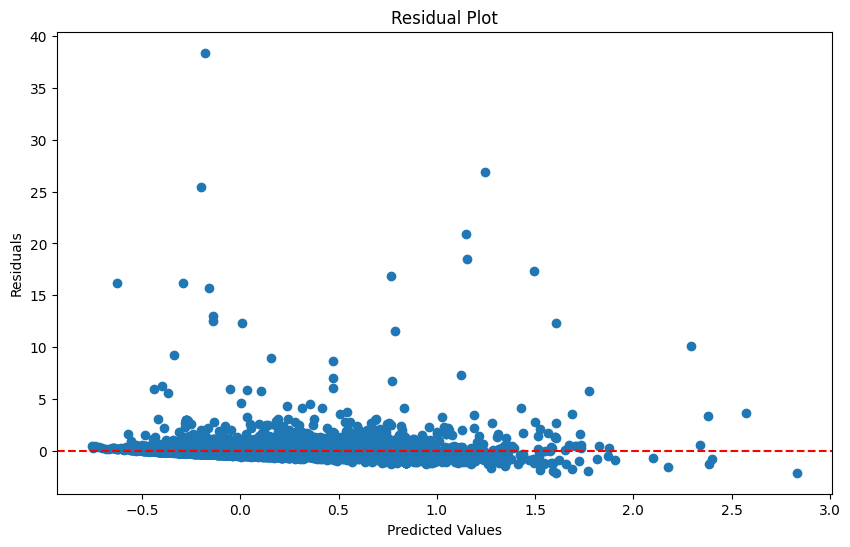

(LinearRegression(),
        reviews_per_month  availability_365  review_scores_cleanliness  \
 0              -0.820872          1.425529                   0.170936   
 1              -0.587744          0.429189                   0.594986   
 2              -0.754264          0.772466                   0.110358   
 3              -0.571092          0.738976                   0.685854   
 4              -0.945761          1.442274                  -0.374271   
 ...                  ...               ...                        ...   
 60074          -0.184874          1.299940                  -0.096953   
 60075          -0.184874          1.140861                  -0.096953   
 60076          -0.184874          1.400411                  -0.096953   
 60077          -0.184874         -1.429530                  -0.096953   
 60078          -0.184874         -0.115030                  -0.096953   
 
        bathrooms  bedrooms  minimum_nights  number_of_reviews  accommodates  \
 0      -

In [248]:
Baseline_model_standardized(X, y)

In [249]:
# Model 7: P value Model standardized
def p_value_model_standardized(X, y):
    # Prepare the data with more features
    X = airbnb_df_standardized[['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights']]
    y = airbnb_df_standardized['price']

    # Add constant for statsmodels
    X = sm.add_constant(X)

    # Fit the model using statsmodels for p-value analysis
    model = sm.OLS(y, X).fit()

    # Print detailed summary
    print(model.summary())

    # Select significant features based on p-values
    significant_features = model.pvalues[model.pvalues < 0.05].index.tolist()

    # Rebuild model with significant features
    X_significant = X[significant_features]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_significant, y, test_size=0.2, random_state=42)

    # Fit new model
    improved_model = sm.OLS(y_train, X_train).fit()

    # Predictions
    y_pred = improved_model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = improved_model.rsquared

    print("\nP-value Improved Model:")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")

    return improved_model

In [250]:
p_value_model_standardized(X, y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     1001.
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        04:23:36   Log-Likelihood:                -81052.
No. Observations:               60079   AIC:                         1.621e+05
Df Residuals:                   60069   BIC:                         1.622e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [251]:
# Model 8: Coefficient Model standardized
def coefficient_model_standardized(X, y):
    # Focus on features with highest absolute coefficients
    X = airbnb_df_standardized[['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights']]
    y = airbnb_df_standardized['price']

    # Standardize features to compare coefficients
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Print coefficients
    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_
    }).sort_values('Coefficient', key=abs, ascending=False)

    print("Model Coefficients (Scaled Features):")
    print(coef_df)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nR-squared: {r2}")
    print(f"Mean Squared Error: {mse}")

    return model, coef_df

In [252]:
coefficient_model_standardized(X, y)

Model Coefficients (Scaled Features):
                     Feature  Coefficient
7               accommodates     0.211653
3                  bathrooms     0.140983
4                   bedrooms     0.052624
1           availability_365     0.040086
0          reviews_per_month    -0.037372
2  review_scores_cleanliness     0.036211
5             minimum_nights     0.035938
6          number_of_reviews    -0.028170
8             maximum_nights     0.000411

R-squared: 0.14766232249007927
Mean Squared Error: 0.710246915318063


(LinearRegression(),
                      Feature  Coefficient
 7               accommodates     0.211653
 3                  bathrooms     0.140983
 4                   bedrooms     0.052624
 1           availability_365     0.040086
 0          reviews_per_month    -0.037372
 2  review_scores_cleanliness     0.036211
 5             minimum_nights     0.035938
 6          number_of_reviews    -0.028170
 8             maximum_nights     0.000411)

In [253]:
# Model 9: Transformation Model standardized
def transformation_model_standardized(X, y):
    X = airbnb_df_standardized[['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights']]
    y = airbnb_df_standardized['price']

    # Log transformation of target variable
    y_log = np.log1p(y)

    # Polynomial features
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y_log, test_size=0.2, random_state=42)

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Inverse log transformation
    y_pred_original = np.expm1(y_pred)
    y_test_original = np.expm1(y_test)

    # Evaluation
    r2 = r2_score(y_test_original, y_pred_original)
    mse = mean_squared_error(y_test_original, y_pred_original)

    return {
        'model': model,
        'r2': r2,
        'mse': mse,
        'transformation': 'Log and Polynomial'
    }

In [254]:
transformation_model_standardized(X, y)

{'model': LinearRegression(),
 'r2': 0.16154603118230015,
 'mse': 0.6986777197609305,
 'transformation': 'Log and Polynomial'}

In [255]:
# Model 10: Outlier Treatment Model standardized
def outlier_treatment_model_standardized(X, y):

    X = airbnb_df_standardized[['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights']]
    y = airbnb_df_standardized['price']

    # Detect and remove outliers using IQR method
    def remove_outliers(df, column): # Pass df as argument
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Remove outliers from price
    df_no_outliers = remove_outliers(airbnb_df_normalized, 'price') # Use airbnb_df_normalized

    # Prepare data
    X = df_no_outliers[['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights']]
    y = df_no_outliers['price']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Outlier Treated Model Results:")
    print(f"Original Dataset Size: {len(airbnb_df_normalized)}") # Using original dataset for comparison
    print(f"Dataset Size After Outlier Removal: {len(df_no_outliers)}")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")

    return model

In [256]:
outlier_treatment_model_standardized(X, y)

Outlier Treated Model Results:
Original Dataset Size: 60079
Dataset Size After Outlier Removal: 56224
R-squared: 0.39483058668432014
Mean Squared Error: 7.194186693348368e-06


LinearRegression()

In [257]:
# Model 11: P-values and Coefficients Combined Model
def pvalues_coefficients_model(X, y):
    # Prepare features
    X = airbnb_df_normalized[['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights']]
    y = airbnb_df_normalized['price']

    # Add constant for statsmodels
    X_with_constant = sm.add_constant(X)

    # Perform OLS to get p-values
    ols_model = sm.OLS(y, X_with_constant).fit()

    # Get p-values and coefficients
    p_values = ols_model.pvalues
    coefficients = ols_model.params

    # Select features with significant p-values and strong coefficients
    significant_threshold = 0.05
    coefficient_threshold = coefficients.abs().median()

    selected_features = [
        col for col in X.columns
        if (p_values[col] < significant_threshold and
            abs(coefficients[col]) > coefficient_threshold)
    ]

    # Prepare selected features
    X_selected = X[selected_features]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Fit linear regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred = lr_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("P-values and Coefficients Combined Model:")
    print("Selected Features:", selected_features)
    print("Feature Coefficients:")
    for feature, coef in zip(selected_features, lr_model.coef_):
        print(f"{feature}: {coef}")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")

    return lr_model

Model 11: P-values and Coefficients Combined Model

Combines statistical significance (p-values) with coefficient strength

Selects features that are both statistically significant and have strong predictive power

Helps identify the most important predictors of Airbnb property prices

In [258]:
pvalues_coefficients_model(X, y)

P-values and Coefficients Combined Model:
Selected Features: ['reviews_per_month', 'bathrooms', 'bedrooms', 'minimum_nights', 'accommodates']
Feature Coefficients:
reviews_per_month: -0.0050867663791768145
bathrooms: 0.026172738997551136
bedrooms: 0.00740132741351246
minimum_nights: 0.007979305199329895
accommodates: 0.01646476214969197
R-squared: 0.1439897478117591
Mean Squared Error: 0.00010905503201051154


LinearRegression()

In [259]:
# Model 12: Transformation and Outlier Treatment Combined Model
def transformation_outlier_model(X, y):
    # Prepare features
    X = airbnb_df_normalized[['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights', 'calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms',
        'calculated_host_listings_count_shared_rooms', 'minimum_minimum_nights',
        'maximum_minimum_nights',
        'minimum_maximum_nights',
        'minimum_nights_avg_ntm', 'review_scores_accuracy',
        'review_scores_checkin',
        'review_scores_communication',
        'number_of_reviews_ltm',
        'number_of_reviews_l30d',
        'availability_30']]
    y = airbnb_df_normalized['price']

    # Winsorization function for outlier treatment
    def winsorize(series, quantile=0.05):
        lower = series.quantile(quantile)
        upper = series.quantile(1 - quantile)
        return series.clip(lower=lower, upper=upper)

    # Apply log transformation and winsorization
    X_transformed = X.copy()
    X_transformed['bedrooms'] = np.log1p(winsorize(X_transformed['bedrooms']))
    X_transformed['availability_365'] = np.log1p(winsorize(X_transformed['availability_365']))
    X_transformed['review_scores_cleanliness'] = np.log1p(winsorize(X_transformed['review_scores_cleanliness']))
    X_transformed['bathrooms'] = np.log1p(winsorize(X_transformed['bathrooms']))
    X_transformed['reviews_per_month'] = np.log1p(winsorize(X_transformed['reviews_per_month']))
    X_transformed['minimum_nights'] = np.log1p(winsorize(X_transformed['minimum_nights']))
    X_transformed['number_of_reviews'] = np.log1p(winsorize(X_transformed['number_of_reviews']))
    X_transformed['accommodates'] = np.log1p(winsorize(X_transformed['accommodates']))
    X_transformed['maximum_nights'] = np.log1p(winsorize(X_transformed['maximum_nights']))
    X_transformed['calculated_host_listings_count_entire_homes'] = np.log1p(winsorize(X_transformed['calculated_host_listings_count_entire_homes']))
    X_transformed['calculated_host_listings_count_private_rooms'] = np.log1p(winsorize(X_transformed['calculated_host_listings_count_private_rooms']))
    X_transformed['calculated_host_listings_count_shared_rooms'] = np.log1p(winsorize(X_transformed['calculated_host_listings_count_shared_rooms']))
    X_transformed['minimum_minimum_nights'] = np.log1p(winsorize(X_transformed['minimum_minimum_nights']))
    X_transformed['maximum_minimum_nights'] = np.log1p(winsorize(X_transformed['maximum_minimum_nights']))
    X_transformed['minimum_maximum_nights'] = np.log1p(winsorize(X_transformed['minimum_maximum_nights']))
    X_transformed['minimum_nights_avg_ntm'] = np.log1p(winsorize(X_transformed['minimum_nights_avg_ntm']))
    X_transformed['review_scores_accuracy'] = np.log1p(winsorize(X_transformed['review_scores_accuracy']))
    X_transformed['review_scores_checkin'] = np.log1p(winsorize(X_transformed['review_scores_checkin']))
    X_transformed['review_scores_communication'] = np.log1p(winsorize(X_transformed['review_scores_communication']))
    X_transformed['number_of_reviews_ltm'] = np.log1p(winsorize(X_transformed['number_of_reviews_ltm']))
    X_transformed['number_of_reviews_l30d'] = np.log1p(winsorize(X_transformed['number_of_reviews_l30d']))
    X_transformed['availability_30'] = np.log1p(winsorize(X_transformed['availability_30']))


    # Log transform target variable with winsorization
    y_transformed = np.log1p(winsorize(y))

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)

    # Fit linear regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Predictions (inverse transform)
    y_pred = np.expm1(lr_model.predict(X_test))
    y_actual = np.expm1(y_test)

    # Evaluation
    mse = mean_squared_error(y_actual, y_pred)
    r2 = r2_score(y_actual, y_pred)

    print("Transformation and Outlier Treatment Combined Model:")
    print("Features:", X.columns.tolist())
    print("Feature Coefficients:")
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(f"{feature}: {coef}")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")

    return lr_model

Model 12: Transformation and Outlier Treatment Combined Model

Applies log transformation to handle non-linear relationships

Uses Winsorization to manage outliers

Provides a robust approach to dealing with data variability

In [260]:
transformation_outlier_model(X, y)

Transformation and Outlier Treatment Combined Model:
Features: ['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'minimum_nights_avg_ntm', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_communication', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_30']
Feature Coefficients:
reviews_per_month: -0.0014130367440152913
availability_365: 0.0005072950031515464
review_scores_cleanliness: 0.006676688801835649
bathrooms: 0.018276011801841168
bedrooms: 0.009520435289698882
minimum_nights: -0.0030799201926540506
number_of_reviews: -0.0006917374347095845
accommodates: 0.015207085259767793
maximum_nights: 171.11115591901307
calc

LinearRegression()

In [261]:
# Model 13: Coefficients and Transformation Combined Model
def coefficients_transformation_hybrid_model(X, y):
    # Prepare features
    X = airbnb_df_normalized[['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights']]
    y = airbnb_df_normalized['price']

    # Log transform potentially skewed features
    X_transformed = X.copy()
    X_transformed['review_scores_cleanliness'] = np.log1p(X_transformed['review_scores_cleanliness'])
    X_transformed['reviews_per_month'] = np.log1p(X_transformed['reviews_per_month'])
    X_transformed['bathrooms'] = np.log1p(X_transformed['bathrooms'])
    X_transformed['bedrooms'] = np.log1p(X_transformed['bedrooms'])
    X_transformed['availability_365'] = np.log1p(X_transformed['availability_365'])
    X_transformed['minimum_nights'] = np.log1p(X_transformed['minimum_nights'])
    X_transformed['number_of_reviews'] = np.log1p(X_transformed['number_of_reviews'])
    X_transformed['accommodates'] = np.log1p(X_transformed['accommodates'])
    X_transformed['maximum_nights'] = np.log1p(X_transformed['maximum_nights'])

    # Log transform target variable
    y_transformed = np.log1p(y)

    # Standardize features to compare coefficients
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_transformed)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_transformed, test_size=0.2, random_state=42)

    # Fit linear regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Predictions (inverse transform)
    y_pred = np.expm1(lr_model.predict(X_test))
    y_actual = np.expm1(y_test)

    # Evaluation
    mse = mean_squared_error(y_actual, y_pred)
    r2 = r2_score(y_actual, y_pred)

    # Create coefficient dataframe
    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': lr_model.coef_
    }).sort_values('Coefficient', key=abs, ascending=False)

    print("Coefficients and Transformation Hybrid Model:")
    print("Coefficient Ranking:")
    print(coef_df)
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")

    return lr_model

Model 13: Coefficients and Transformation Hybrid Model

Combines log transformation with feature standardization

Allows for comparing feature importance on a standardized scale

Helps understand feature impact while managing data distribution

In [262]:
coefficients_transformation_hybrid_model(X, y)

Coefficients and Transformation Hybrid Model:
Coefficient Ranking:
                     Feature  Coefficient
7               accommodates     0.002580
3                  bathrooms     0.001682
4                   bedrooms     0.000609
1           availability_365     0.000461
0          reviews_per_month    -0.000456
2  review_scores_cleanliness     0.000452
5             minimum_nights     0.000402
6          number_of_reviews    -0.000355
8             maximum_nights     0.000006
R-squared: 0.14789864008723286
Mean Squared Error: 0.00010855704221291541


LinearRegression()

In [263]:
# Model 14: P-values and Outlier Treatment Combined Model
def pvalues_outlier_treatment_model(X, y):
    # Prepare features
    X = airbnb_df_normalized[['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights']]
    y = airbnb_df_normalized['price']

    # Winsorization function for outlier treatment
    def winsorize(series, quantile=0.05):
        lower = series.quantile(quantile)
        upper = series.quantile(1 - quantile)
        return series.clip(lower=lower, upper=upper)

    # Winsorize features and target
    X_treated = X.apply(winsorize)
    y_treated = winsorize(y)

    # Add constant for statsmodels
    X_with_constant = sm.add_constant(X_treated)

    # Perform OLS to get p-values
    ols_model = sm.OLS(y_treated, X_with_constant).fit()

    # Select significant features
    significant_features = ols_model.pvalues[ols_model.pvalues < 0.05].index.tolist()
    significant_features = [feat for feat in significant_features if feat != 'const']

    # Prepare selected features
    X_selected = X_treated[significant_features]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_treated, test_size=0.2, random_state=42)

    # Fit linear regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred = lr_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("P-values and Outlier Treatment Model:")
    print("Significant Features:", significant_features)
    print("Feature Coefficients:")
    for feature, coef in zip(significant_features, lr_model.coef_):
        print(f"{feature}: {coef}")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")

    return lr_model

Model 14: P-values and Outlier Treatment Model

Uses statistical significance to select features

Applies Winsorization to handle extreme values

Provides a statistically sound approach to feature selection and data cleaning

In [264]:
pvalues_outlier_treatment_model(X, y)

P-values and Outlier Treatment Model:
Significant Features: ['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights']
Feature Coefficients:
reviews_per_month: -0.003403690646580771
availability_365: 0.0005630849238523238
review_scores_cleanliness: 0.00424366680316152
bathrooms: 0.013786625514481354
bedrooms: 0.0075335086747928
minimum_nights: 0.01221301332083578
number_of_reviews: -0.0030681600880807175
accommodates: 0.0152697134018165
maximum_nights: 245.7538334927561
R-squared: 0.46860997667255855
Mean Squared Error: 1.0937133620697698e-05


LinearRegression()

In [265]:
# Model 15: P-values and Transformation Combined Model
def pvalues_transformation_model(X, y):
    # Prepare features
    X = airbnb_df_normalized[['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights']]
    y = airbnb_df_normalized['price']

    # Log transform features
    X_transformed = X.copy()
    X_transformed['bathrooms'] = np.log1p(X_transformed['bathrooms'])
    X_transformed['bedrooms'] = np.log1p(X_transformed['bedrooms'])
    X_transformed['availability_365'] = np.log1p(X_transformed['availability_365'])
    X_transformed['reviews_per_month'] = np.log1p(X_transformed['reviews_per_month'])
    X_transformed['review_scores_cleanliness'] = np.log1p(X_transformed['review_scores_cleanliness'])
    X_transformed['minimum_nights'] = np.log1p(X_transformed['minimum_nights'])
    X_transformed['number_of_reviews'] = np.log1p(X_transformed['number_of_reviews'])
    X_transformed['accommodates'] = np.log1p(X_transformed['accommodates'])
    X_transformed['maximum_nights'] = np.log1p(X_transformed['maximum_nights'])

    # Log transform target variable
    y_transformed = np.log1p(y)

    # Add constant for statsmodels
    X_with_constant = sm.add_constant(X_transformed)

    # Perform OLS to get p-values
    ols_model = sm.OLS(y_transformed, X_with_constant).fit()

    # Select significant features
    significant_features = ols_model.pvalues[ols_model.pvalues < 0.05].index.tolist()
    significant_features = [feat for feat in significant_features if feat != 'const']

    # Prepare selected features
    X_selected = X_transformed[significant_features]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_transformed, test_size=0.2, random_state=42)

    # Fit linear regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Predictions (inverse transform)
    y_pred = np.expm1(lr_model.predict(X_test))
    y_actual = np.expm1(y_test)

    # Evaluation
    mse = mean_squared_error(y_actual, y_pred)
    r2 = r2_score(y_actual, y_pred)

    print("P-values and Transformation Model:")
    print("Significant Features:", significant_features)
    print("Feature Coefficients:")
    for feature, coef in zip(significant_features, lr_model.coef_):
        print(f"{feature}: {coef}")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")

    return lr_model

Model 15: P-values and Transformation Model

Combines statistical significance with log transformation

Selects significant features after applying non-linear transformations

Helps capture complex relationships in the data

In [266]:
pvalues_transformation_model(X, y)

P-values and Transformation Model:
Significant Features: ['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates']
Feature Coefficients:
reviews_per_month: -0.004676470317899771
availability_365: 0.0020843644634059915
review_scores_cleanliness: 0.006488301908517612
bathrooms: 0.03059611389607577
bedrooms: 0.007904602534842849
minimum_nights: 0.008498689264610483
number_of_reviews: -0.0038811904502916604
accommodates: 0.02064152541464888
R-squared: 0.14789846984861543
Mean Squared Error: 0.0001085570639011812


LinearRegression()

In [267]:
# Model 16: Coefficients and Outlier Treatment Combined Model
def coefficients_outlier_treatment_model(X, y):
    # Prepare features
    X = airbnb_df_normalized[['reviews_per_month', 'availability_365', 'review_scores_cleanliness', 'bathrooms', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'accommodates', 'maximum_nights']]
    y = airbnb_df_normalized['price']

    # Winsorization function for outlier treatment
    def winsorize(series, quantile=0.05):
        lower = series.quantile(quantile)
        upper = series.quantile(1 - quantile)
        return series.clip(lower=lower, upper=upper)

    # Winsorize features and target
    X_treated = X.copy()
    for column in X_treated.columns:
        X_treated[column] = winsorize(X_treated[column])
    y_treated = winsorize(y)

    # Standardize features to compare coefficients
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_treated)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_treated, test_size=0.2, random_state=42)

    # Fit linear regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Create coefficient dataframe
    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': lr_model.coef_
    }).sort_values('Coefficient', key=abs, ascending=False)

    # Predictions and evaluation
    y_pred = lr_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Detailed output
    print("\nCoefficients and Outlier Treatment Model:")
    print("\nFeature Coefficient Ranking:")
    print(coef_df)

    print("\nModel Performance:")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")

    # Visualize coefficient importance
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.bar(coef_df['Feature'], coef_df['Coefficient'].abs())
    plt.title('Feature Coefficient Importance (Absolute Values)')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return lr_model, coef_df

Model 16: Coefficients and Outlier Treatment Model


Outlier treatment using Winsorization

Feature Standardization

Linear Regression for Feature Importance

Feature Importance Ranking


Coefficients and Outlier Treatment Model:

Feature Coefficient Ranking:
                     Feature  Coefficient
7               accommodates     0.002078
3                  bathrooms     0.000683
4                   bedrooms     0.000538
2  review_scores_cleanliness     0.000416
0          reviews_per_month    -0.000331
6          number_of_reviews    -0.000224
5             minimum_nights     0.000194
1           availability_365     0.000183
8             maximum_nights     0.000175

Model Performance:
R-squared: 0.46860997667255855
Mean Squared Error: 1.0937133620697698e-05


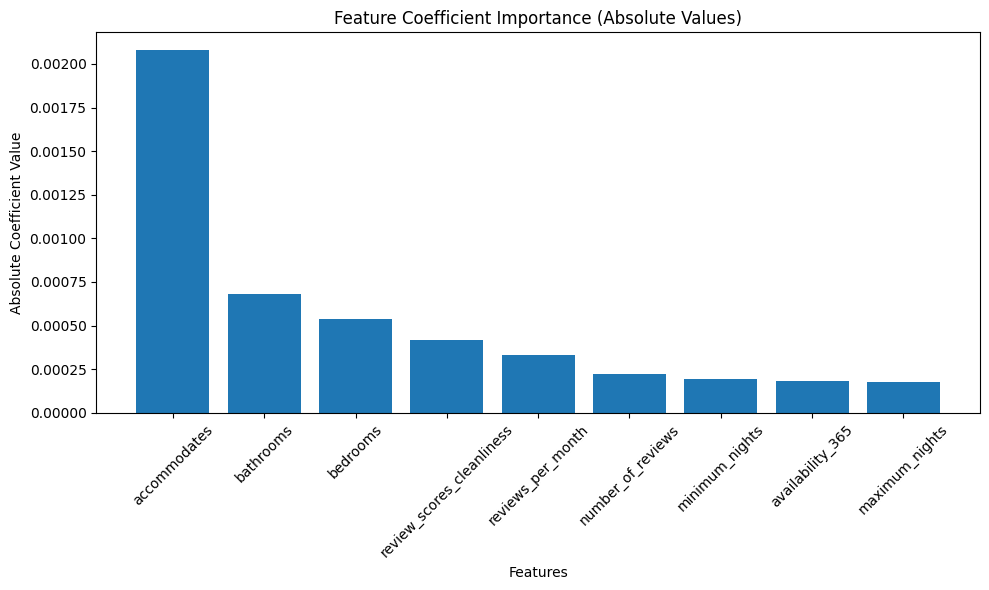

(LinearRegression(),
                      Feature  Coefficient
 7               accommodates     0.002078
 3                  bathrooms     0.000683
 4                   bedrooms     0.000538
 2  review_scores_cleanliness     0.000416
 0          reviews_per_month    -0.000331
 6          number_of_reviews    -0.000224
 5             minimum_nights     0.000194
 1           availability_365     0.000183
 8             maximum_nights     0.000175)

In [268]:
coefficients_outlier_treatment_model(X, y)

# Insights

- Majority of the listings in london are priced under 5,000 meaning that it's affordible and available for multiple consumers.

- Some of the listings are much higher compared to the rest which are probably more luxurious.

- Competitive pricing is important because there are multiple listings which are in a low price range.

- The most common property type is the entire rental units.

- The listings with the highest prices usually have more bedrooms and bathrooms.

- There is a relationship between the number of beds and the accommodation capacity and it focuses on providing sleeping arrangements for the guests.

- The listings with lower prices have the most reviews.

- The listings that are more affordable are usually more available throughout the year however, the high priced listings are used less or in specific seasons only.

- Factors such as cleanliness, accuracy, and communication are highly rated by the customers and are important for customer satisfaction.

- The majority of the hosts reply within an hour, showing the importance of communication between them and the guest.

- The most popular neighborhoods are Shoreditch and South Kensignton. These neighborhoods have the highest concentration of listings.

- The location of the listing significantly influences its price and demand.

- This dataset contains outliers in multiple features.

- Once the outliers were removed, the trends and relationships were more clear and ready to be used to run further tests.

- Model 12 : Transformation and Outlier Treatment Combined Model is the most accurate model as it handles outliers effectively, the skewness, and the nonlinear relationships.

- It produces a relatively high R-squared and a low MSE which indicates better predictive performance.

- In the case of interpretability, the P-values and Coefficients Combined Model is best because of how it balances statistical importance and feature impact as it maintains simplicity.


# Recommendations

For a new real estate investor who wants to purchase property in London and list it on Airbnb, we recommend they...

- **1) Focus on Affordable Accommodations:** The investor is more likely to have a higher return on investment if they were to invest in smaller properties which are budget-friendly.

- **2) Prioritize Location and Amenities:** The investor should look into the neighborhoods with the highest concentration of listings and areas near tourist attractions. Having the essential amenities such as Wi-Fi, W/D, and decent kitchen equipment is important for attracting more guests.

- **3) Maintain High Availability:** The more available the listing is, the better the return on investment. The investor should implement flexible minimum night requirements and should keep the property available all year round.

- **4) Ensure Excellent Customer Service:** The investor should maintain high review scores as they are crucial for attracting guests. As long as the investor prioritizes a smooth check-in/out process, communication, and a comfortable environment, they will maintain excellent customer service.

- **5) Room Type Considerations:** The investor should consider different types of listings such as homes, apartments, and private rooms. These seections are popular and seem to raise the most demand.

- **6) Data-Driven Pricing Strategy:** Investors should implement pricing strategies that are backed by different market trends, seasonality, and competitor pricing. Investors can use previous data to come up with fair and profitable strategies.

- **7) Understand Booking Patterns:** Investors must know when they can expect to have a high frequency of guests throughout the year to best accurately set the pricing of their properties and ensure a high occupancy rate during the peak seasons.

- **8) Focus on clean and well-maintained properties:** Guests tend to prioritize a clean and well kept place so its crucial that investors make sure the property is well-maintained and looked after regularly.

# Conclusion

This analysis demonstrates a thorough approach to data preprocessing and transformation, laying the groundwork for accurately predicting the price based on the location. By addressing key challenges such as missing values, outliers, and inconsistencies, the dataset becomes more reliable and meaningful for statistical and predictive analyses. Each step in the process—from modifying missing values to handling outliers and transforming the data—was designed to enhance its quality and usability.

The comprehensive data cleaning and transformation process in this analysis significantly enhances the quality and reliability of the dataset, enabling an informed approach to predicting the price based on the location. If the analysis confirms that location strongly predicts price, it supports the hypothesis that geographic positioning is a crucial factor in determining property value, emphasizing the need for pricing strategies to prioritize location. On the other hand, if location has a weaker predictive impact, it suggests that other variables, such as property type, reviews, or amenities, may play a more substantial role in influencing pricing decisions.

In [269]:


!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 78.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6ad412832cf8cc9356ea53a0476b5c07728e69d38ff0dbcfdb9c651f69064099
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport
profileB = ProfileReport(airbnb_df_no_outliers, title="Airbnb No Outliers Report")
profileB

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]